<a href="https://colab.research.google.com/github/iremellz/mortgage_default_model/blob/main/Mortgage_Default_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## Uploading Datasets



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving column_names.csv to column_names.csv


In [ ]:
fileObject = open("column_names.csv", "r")
columns = fileObject.read()
column_names=columns.split('\n')
column_names[:-1]

['loan_id',
 'act_period',
 'channel',
 'orig_rate',
 'orig_upb',
 'orig_term',
 'orig_date',
 'first_pay',
 'loan_age',
 'rem_months',
 'matr_dt',
 'oltv',
 'ocltv',
 'num_bo',
 'dti',
 'cscore_b',
 'cscore_c',
 'first_flag',
 'purpose',
 'prop',
 'no_units',
 'occ_stat',
 'state',
 'msa',
 'zip',
 'mi_pct',
 'dlq_status',
 'zero_bal_code',
 'zb_dte',
 'mi_type',
 'homeready_program_indicator',
 'relocation_mortgage_indicator',
 'high_balance_loan_indicator',
 'target',
 'last_period',
 'calc_age',
 'age_dif',
 'calc_rem_months',
 'cscore_min',
 'orig_val',
 'Vintage',
 'Prepay',
 'Default']

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1XekjJ-nLbS7MAWCvKgorztClFGUv5dOJ'
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])


Mounted at /content/gdrive


In [ ]:
df_orig = pd.read_csv('model_data.csv', sep= '|', header=None, names=column_names[:-1], low_memory=False)
df_orig.reset_index(drop=True, inplace=True)
df_orig = df_orig.iloc[1: , :]
df_orig.head()

loan_id  act_period channel orig_rate  orig_upb orig_term   orig_date  \
1  523899932680  2010-04-20       C      4.75  239000.0     360.0  2009-01-20   
2  239106981350  2009-06-20       C      5.25   80000.0     180.0  2002-10-20   
3  667907597231  2018-05-20       R     2.875  210000.0     180.0  2012-12-20   
4  940076896427  2012-05-20       B     6.875  134000.0     360.0  2002-09-20   
5  849058792149  2005-04-20       C     5.625  113000.0     180.0  2002-08-20   

    first_pay loan_age rem_months  ... target last_period calc_age age_dif  \
1  2009-03-20     14.0      346.0  ...      A         NaN       15     1.0   
2  2003-01-20     81.0       99.0  ...      P  2009-06-20       81     NaN   
3  2013-02-20     64.0      116.0  ...      A         NaN       65     1.0   
4  2002-11-20    116.0      244.0  ...      P  2012-05-20      116     NaN   
5  2002-10-20     31.0      149.0  ...      A         NaN       33     2.0   

  calc_rem_months cscore_min            orig_val Vintage Prepay Default  
1             346      778.0   412068.9655172414    2009      0       0  
2              99      776.0  129032.25806451614    2002      1       0  
3             116      707.0   344262.2950819672    2012      0       0  
4             244      710.0  138144.32989690723    2002      1       0  
5             149      792.0  182258.06451612903    2002      0       0  

[5 rows x 43 columns]

In [ ]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557640 entries, 1 to 557640
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   loan_id                        557640 non-null  object
 1   act_period                     557640 non-null  object
 2   channel                        557640 non-null  object
 3   orig_rate                      557640 non-null  object
 4   orig_upb                       557640 non-null  object
 5   orig_term                      557640 non-null  object
 6   orig_date                      557640 non-null  object
 7   first_pay                      557640 non-null  object
 8   loan_age                       557640 non-null  object
 9   rem_months                     557640 non-null  object
 10  matr_dt                        379231 non-null  object
 11  oltv                           557640 non-null  object
 12  ocltv                          557640 non-nu

In [ ]:
df_def = df_orig[df_orig['Default']=='1']
df_ndef = df_orig[df_orig['Default']=='0']
len(df_def),len(df_ndef)

(157732, 399908)

In [ ]:
df_ndef = df_ndef.sample(frac=0.5, axis=0, random_state=0)
len(df_def),len(df_ndef)

(157732, 199954)

In [ ]:
df_bal = pd.concat([df_def,df_ndef],axis=0)
df_bal.Default.value_counts()

0    199954
1    157732
Name: Default, dtype: int64

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving combined.csv to combined.csv


In [ ]:
df_n= pd.read_csv('combined.csv', sep=",")
df_n.reset_index(drop=True, inplace=True)
df_n = df_n.iloc[1: , :]
df_n.head()


<ipython-input-11-6c0e68733b6a>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_n= pd.read_csv('combined.csv', sep=",")


Unnamed: 0.1 Month_Year  Zip value  Unnamed: 0  12M Change  36M Change  \
1           123    2000-04  996   8.4    237939.0   -0.006199    0.084468   
2           124    2000-05  996   8.5    237940.0   -0.013986    0.077125   
3           125    2000-06  996   8.6    237941.0   -0.021659    0.069873   
4           126    2000-07  996   4.8    237942.0   -0.013518    0.073298   
5           127    2000-08  996   5.7    237943.0   -0.005316    0.076713   

   60M Change _merge  
1    0.174308   both  
2    0.172421   both  
3    0.170537   both  
4    0.159291   both  
5    0.148358   both

In [ ]:
df_n['value'].isna().sum()

0

In [ ]:
#df_model['unemp'] = df_model['unemp'].astype(float)
df_n['value'] = pd.to_numeric(df_n['value'],errors='coerce')

In [ ]:
df_n=df_n.drop(['Unnamed: 0', 'Unnamed: 0.1', '_merge'], axis=1)

In [ ]:
df_n.rename(columns={'Zip':'zip'}, inplace=True)

In [ ]:
df_n['zip'] = df_n['zip'].astype(object)

In [ ]:
df_bal['Date'] = pd.to_datetime(df_bal['orig_date'])

In [ ]:
df_bal['Month_Year'] = df_bal['Date'].dt.to_period('M')

In [ ]:
df_bal['Month_Year']=df_bal['Month_Year'].astype(str)

In [ ]:
df_n.zip=df_n.zip.astype(str)

In [ ]:
df_bal.zip=df_bal.zip.astype(str)

In [ ]:
df_bal['Month_Year']=df_bal['Month_Year'].astype(str)

In [ ]:
df_n['Month_Year']=df_n['Month_Year'].astype(str)

## Merging

In [ ]:
df2=df_bal.merge(df_n, how='left',on=['Month_Year','zip'],indicator=True)

In [ ]:
df2.head()

loan_id  act_period channel orig_rate  orig_upb orig_term   orig_date  \
0  000098877378  2021-04-20       C     3.875  387000.0     360.0  2019-12-20   
1  676470473495  2018-05-20       C     6.125  138000.0     360.0  2008-11-20   
2  454566884436  2012-11-20       C      6.75  151000.0     360.0  2007-08-20   
3  120142086453  2021-12-20       C     4.125  304000.0     360.0  2013-07-20   
4  409620791247  2011-07-20       C     5.625  103000.0     360.0  2005-07-20   

    first_pay loan_age rem_months  ... Vintage Prepay Default       Date  \
0  2020-02-20     15.0      345.0  ...    2019      0       1 2019-12-20   
1  2009-01-20    113.0      456.0  ...    2008      0       1 2008-11-20   
2  2007-10-20     62.0      298.0  ...    2007      0       1 2007-08-20   
3  2013-09-20    100.0      260.0  ...    2013      0       1 2013-07-20   
4  2005-09-20     71.0      301.0  ...    2005      0       1 2005-07-20   

  Month_Year value 12M Change 36M Change 60M Change     _merge  
0    2019-12   2.6   0.042532   0.221116   0.557525       both  
1    2008-11   5.2  -0.012375   0.056401   0.168351       both  
2    2007-08   3.4  -0.004522   0.529270   0.878522       both  
3    2013-07   NaN        NaN        NaN        NaN  left_only  
4    2005-07   6.9   0.062542   0.152820   0.219315       both  

[5 rows x 50 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357686 entries, 0 to 357685
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   loan_id                        357686 non-null  object        
 1   act_period                     357686 non-null  object        
 2   channel                        357686 non-null  object        
 3   orig_rate                      357686 non-null  object        
 4   orig_upb                       357686 non-null  object        
 5   orig_term                      357686 non-null  object        
 6   orig_date                      357686 non-null  object        
 7   first_pay                      357686 non-null  object        
 8   loan_age                       357686 non-null  object        
 9   rem_months                     357686 non-null  object        
 10  matr_dt                        264854 non-null  object        
 11  

In [ ]:
df_yed=df2

In [ ]:
df2=df_yed

In [ ]:
 df2=df2.loc[df2['_merge']=='both']

In [ ]:
df2

loan_id  act_period channel orig_rate  orig_upb orig_term  \
0       000098877378  2021-04-20       C     3.875  387000.0     360.0   
1       676470473495  2018-05-20       C     6.125  138000.0     360.0   
2       454566884436  2012-11-20       C      6.75  151000.0     360.0   
4       409620791247  2011-07-20       C     5.625  103000.0     360.0   
5       736342864722  2009-06-20       R       6.5   36000.0     360.0   
...              ...         ...     ...       ...       ...       ...   
357679  600802435374  2017-08-20       R     4.125  424000.0     360.0   
357681  210400176407  2020-08-20       B      5.25  383000.0     360.0   
357683  219487413279  2017-01-20       R     3.375  106000.0     360.0   
357684  998430807012  2008-08-20       B      6.75   89000.0     360.0   
357685  106811896340  2016-03-20       R      4.25   94000.0     360.0   

         orig_date   first_pay loan_age rem_months  ... Vintage Prepay  \
0       2019-12-20  2020-02-20     15.0      345.0  ...    2019      0   
1       2008-11-20  2009-01-20    113.0      456.0  ...    2008      0   
2       2007-08-20  2007-10-20     62.0      298.0  ...    2007      0   
4       2005-07-20  2005-09-20     71.0      301.0  ...    2005      0   
5       2003-03-20  2003-05-20     74.0      286.0  ...    2003      0   
...            ...         ...      ...        ...  ...     ...    ...   
357679  2017-06-20  2017-08-20      1.0      359.0  ...    2017      0   
357681  2019-01-20  2019-03-20     19.0      341.0  ...    2019      1   
357683  2012-11-20  2013-01-20     51.0      309.0  ...    2012      1   
357684  2002-06-20  2002-08-20     73.0      287.0  ...    2002      0   
357685  2015-07-20  2015-09-20      7.0      353.0  ...    2015      0   

       Default       Date Month_Year value 12M Change 36M Change 60M Change  \
0            1 2019-12-20    2019-12   2.6   0.042532   0.221116   0.557525   
1            1 2008-11-20    2008-11   5.2  -0.012375   0.056401   0.168351   
2            1 2007-08-20    2007-08   3.4  -0.004522   0.529270   0.878522   
4            1 2005-07-20    2005-07   6.9   0.062542   0.152820   0.219315   
5            1 2003-03-20    2003-03   7.2   0.061177   0.207029   0.352972   
...        ...        ...        ...   ...        ...        ...        ...   
357679       0 2017-06-20    2017-06   4.9   0.028509   0.093157   0.180435   
357681       0 2019-01-20    2019-01   4.2   0.042091   0.144769   0.241037   
357683       0 2012-11-20    2012-11  10.7   0.039470  -0.077096  -0.424544   
357684       0 2002-06-20    2002-06   6.9   0.055863   0.368502   0.648175   
357685       0 2015-07-20    2015-07   5.1   0.015509   0.077817   0.055455   

       _merge  
0        both  
1        both  
2        both  
4        both  
5        both  
...       ...  
357679   both  
357681   both  
357683   both  
357684   both  
357685   both  

[317202 rows x 50 columns]

In [ ]:
df2=df2.drop('_merge',axis=1)

In [ ]:
df2= df2.drop(['dlq_status', 'rem_months', 'matr_dt','act_period', 'last_period', 'calc_age', 'age_dif', 'calc_rem_months', 'Default', 'Prepay','zero_bal_code','zb_dte'], axis=1)


In [ ]:
df2.head()

loan_id channel orig_rate  orig_upb orig_term   orig_date   first_pay  \
0  000098877378       C     3.875  387000.0     360.0  2019-12-20  2020-02-20   
1  676470473495       C     6.125  138000.0     360.0  2008-11-20  2009-01-20   
2  454566884436       C      6.75  151000.0     360.0  2007-08-20  2007-10-20   
4  409620791247       C     5.625  103000.0     360.0  2005-07-20  2005-09-20   
5  736342864722       R       6.5   36000.0     360.0  2003-03-20  2003-05-20   

  loan_age  oltv ocltv  ... target cscore_min            orig_val Vintage  \
0     15.0  90.0  90.0  ...      D      791.0            430000.0    2019   
1    113.0  80.0  80.0  ...      D      591.0            172500.0    2008   
2     62.0  90.0  90.0  ...      D      723.0  167777.77777777778    2007   
4     71.0  93.0  93.0  ...      D      684.0  110752.68817204301    2005   
5     74.0  87.0  87.0  ...      D      656.0   41379.31034482759    2003   

        Date Month_Year value 12M Change 36M Change 60M Change  
0 2019-12-20    2019-12   2.6   0.042532   0.221116   0.557525  
1 2008-11-20    2008-11   5.2  -0.012375   0.056401   0.168351  
2 2007-08-20    2007-08   3.4  -0.004522   0.529270   0.878522  
4 2005-07-20    2005-07   6.9   0.062542   0.152820   0.219315  
5 2003-03-20    2003-03   7.2   0.061177   0.207029   0.352972  

[5 rows x 37 columns]

In [ ]:
print(df2.isnull().sum()*100/len(df2))

loan_id                           0.000000
channel                           0.000000
orig_rate                         0.000000
orig_upb                          0.000000
orig_term                         0.000000
orig_date                         0.000000
first_pay                         0.000000
loan_age                          0.000000
oltv                              0.000000
ocltv                             0.000000
num_bo                            0.014502
dti                               0.000000
cscore_b                          0.000000
cscore_c                          0.000000
first_flag                        0.052333
purpose                           0.000000
prop                              0.000000
no_units                          0.000000
occ_stat                          0.000000
state                             0.000000
msa                               0.000000
zip                               0.000000
mi_pct                            0.000000
mi_type    

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317202 entries, 0 to 357685
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   loan_id                        317202 non-null  object        
 1   channel                        317202 non-null  object        
 2   orig_rate                      317202 non-null  object        
 3   orig_upb                       317202 non-null  object        
 4   orig_term                      317202 non-null  object        
 5   orig_date                      317202 non-null  object        
 6   first_pay                      317202 non-null  object        
 7   loan_age                       317202 non-null  object        
 8   oltv                           317202 non-null  object        
 9   ocltv                          317202 non-null  object        
 10  num_bo                         317156 non-null  object        
 11  

In [ ]:
df2.drop('Date', axis=1,inplace=True)

In [ ]:
cat_cols_type = ['Month_Year', 'channel', 'num_bo','first_flag','purpose','prop','no_units', 'occ_stat','state',
'msa','mi_type','homeready_program_indicator','relocation_mortgage_indicator','high_balance_loan_indicator','Vintage']


In [ ]:
num_cols_type = ['value','12M Change','36M Change', '60M Change','loan_age', 'mi_pct','orig_rate','orig_upb','orig_term','oltv','ocltv',
                 'dti','cscore_b','cscore_c','cscore_min','orig_val']

In [ ]:
#df2['value'] = df2['value'].str.extract(pat='(\d+)', expand=False)

In [ ]:
for num in num_cols_type:
  df2[num]=df2[num].astype(float)

In [ ]:
df2['loan_id']=df2['loan_id'].astype(int)

# Imputing Missing Values

In [ ]:
df2['homeready_program_indicator'].unique()

array(['N', nan, 'Y'], dtype=object)

In [ ]:
df2['homeready_program_indicator'].value_counts()

N    39336
Y     3143
Name: homeready_program_indicator, dtype: int64

In [ ]:
df2['homeready_program_indicator'].fillna(df2['homeready_program_indicator'].mode()[0], inplace=True)

In [ ]:
df2['homeready_program_indicator'].value_counts()

N    314059
Y      3143
Name: homeready_program_indicator, dtype: int64

In [ ]:
df2['homeready_program_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df2['mi_type'].value_counts()

1.0    70217
2.0     5761
3.0       40
Name: mi_type, dtype: int64

In [ ]:
df2['mi_type'].unique()

array(['1.0', nan, '2.0', '3.0'], dtype=object)

In [ ]:
from locale import normalize
df2['mi_type'].value_counts(normalize=True)

1.0    0.923689
2.0    0.075785
3.0    0.000526
Name: mi_type, dtype: float64

In [ ]:
df2['mi_type'] = df2['mi_type'].fillna(0) #imputed with 0 means no mortgage insurance for those

In [ ]:
df2['mi_type'].value_counts()

0      241184
1.0     70217
2.0      5761
3.0        40
Name: mi_type, dtype: int64

In [ ]:
df2['first_flag'].fillna(df2['first_flag'].mode()[0], inplace = True)
df2['num_bo'].fillna(df2['num_bo'].mode()[0], inplace = True)

In [ ]:
print(df2.isnull().sum()*100/len(df2))

loan_id                          0.000000
channel                          0.000000
orig_rate                        0.000000
orig_upb                         0.000000
orig_term                        0.000000
orig_date                        0.000000
first_pay                        0.000000
loan_age                         0.000000
oltv                             0.000000
ocltv                            0.000000
num_bo                           0.000000
dti                              0.000000
cscore_b                         0.000000
cscore_c                         0.000000
first_flag                       0.000000
purpose                          0.000000
prop                             0.000000
no_units                         0.000000
occ_stat                         0.000000
state                            0.000000
msa                              0.000000
zip                              0.000000
mi_pct                           0.000000
mi_type                          0

In [ ]:
df3=df2

In [ ]:
(df3['ocltv']== df3['oltv']).value_counts()

True     296053
False     21149
dtype: int64

In [ ]:
df3['num_bo'].value_counts()

1.0    162685
2.0    152977
3.0      1209
4.0       326
6.0         3
7.0         1
5.0         1
Name: num_bo, dtype: int64

# Setting the Target Values

In [ ]:
df3['Target']= df3.apply(lambda x : 1 if x['target']=='D' else 0,axis=1)

In [ ]:
df3['Target'].value_counts()

0    180035
1    137167
Name: Target, dtype: int64

In [ ]:
df3.drop(columns=['target'], inplace=True)

## Seperation of the Categorical and Numerical Features and changing the Data Types

In [ ]:
cat_cols = ['Month_Year','channel', 'num_bo','first_flag','purpose','prop','no_units', 'occ_stat','state',
'msa','mi_type','homeready_program_indicator','relocation_mortgage_indicator','high_balance_loan_indicator','Vintage']


In [ ]:
num_cols = ['value','12M Change','36M Change', '60M Change','loan_age', 'mi_pct','orig_rate','orig_upb','orig_term','oltv','ocltv','dti','cscore_b','cscore_c','cscore_min','orig_val','Target',]


In [ ]:
df4 = df3.copy()
for col in num_cols:
  df4[col] = df4[col].astype("float64")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317202 entries, 0 to 357685
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_id                        317202 non-null  int64  
 1   channel                        317202 non-null  object 
 2   orig_rate                      317202 non-null  float64
 3   orig_upb                       317202 non-null  float64
 4   orig_term                      317202 non-null  float64
 5   orig_date                      317202 non-null  object 
 6   first_pay                      317202 non-null  object 
 7   loan_age                       317202 non-null  float64
 8   oltv                           317202 non-null  float64
 9   ocltv                          317202 non-null  float64
 10  num_bo                         317202 non-null  object 
 11  dti                            317202 non-null  float64
 12  cscore_b                      

In [ ]:
df4['Target'] = df4['Target'].astype("int")
df4['loan_id'] = df4['loan_id'].astype("int")

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317202 entries, 0 to 357685
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_id                        317202 non-null  int64  
 1   channel                        317202 non-null  object 
 2   orig_rate                      317202 non-null  float64
 3   orig_upb                       317202 non-null  float64
 4   orig_term                      317202 non-null  float64
 5   orig_date                      317202 non-null  object 
 6   first_pay                      317202 non-null  object 
 7   loan_age                       317202 non-null  float64
 8   oltv                           317202 non-null  float64
 9   ocltv                          317202 non-null  float64
 10  num_bo                         317202 non-null  object 
 11  dti                            317202 non-null  float64
 12  cscore_b                      

**Skewness Test**

Skewness of value is nan


<Figure size 432x288 with 0 Axes>

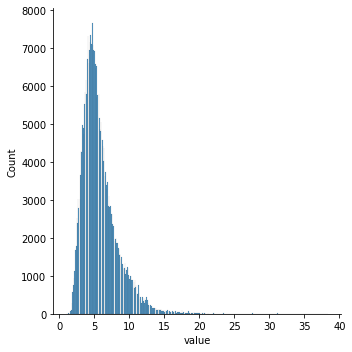

Skewness of 12M Change is 0.3194665080196424


<Figure size 432x288 with 0 Axes>

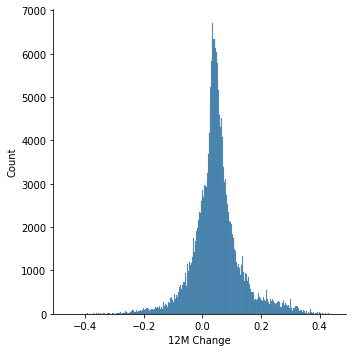

Skewness of 36M Change is 0.6188100773459573


<Figure size 432x288 with 0 Axes>

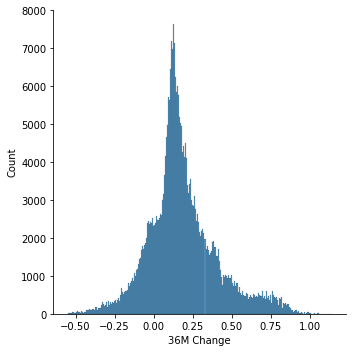

Skewness of 60M Change is 0.6582565731052359


<Figure size 432x288 with 0 Axes>

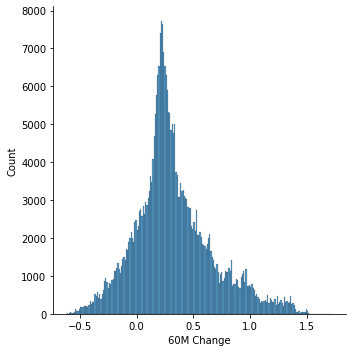

Skewness of loan_age is 0.9840908074451152


<Figure size 432x288 with 0 Axes>

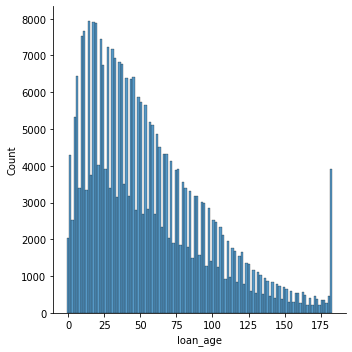

Skewness of mi_pct is -2.2313838481522934


<Figure size 432x288 with 0 Axes>

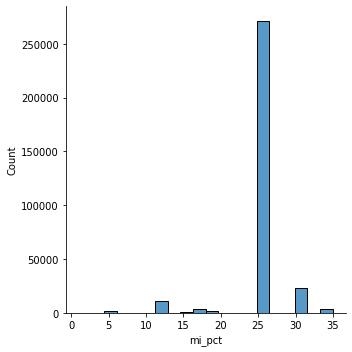

Skewness of orig_rate is -0.1675813981045549


<Figure size 432x288 with 0 Axes>

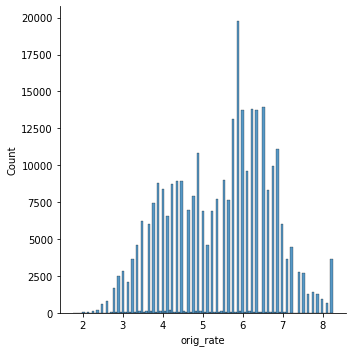

Skewness of orig_upb is 0.9811951396429306


<Figure size 432x288 with 0 Axes>

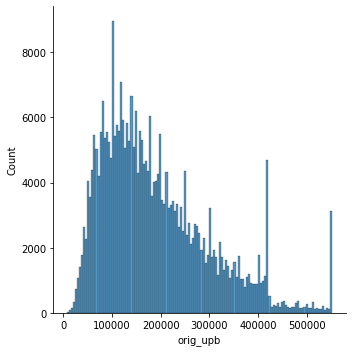

Skewness of orig_term is -1.4889942580652222


<Figure size 432x288 with 0 Axes>

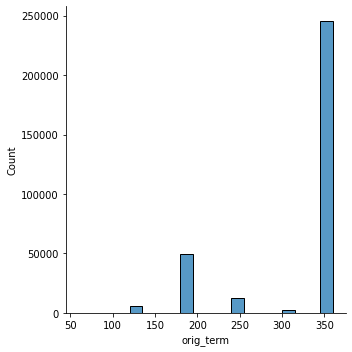

Skewness of oltv is -0.9797981515127433


<Figure size 432x288 with 0 Axes>

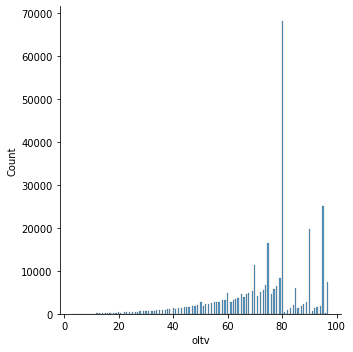

Skewness of ocltv is -0.9868354922421084


<Figure size 432x288 with 0 Axes>

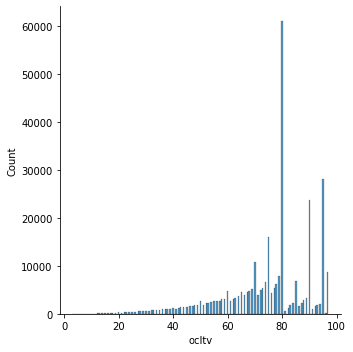

Skewness of dti is -0.0796075034990312


<Figure size 432x288 with 0 Axes>

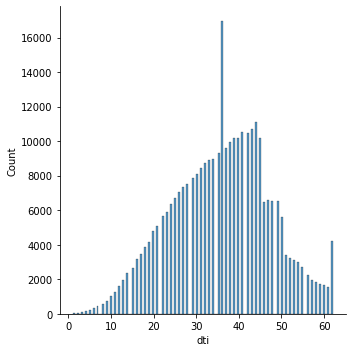

Skewness of cscore_b is -0.46287276560907187


<Figure size 432x288 with 0 Axes>

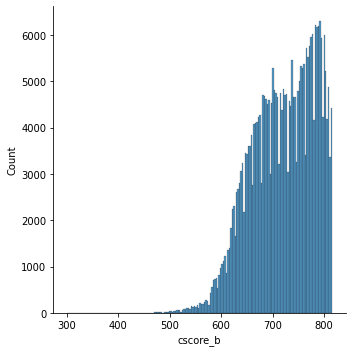

Skewness of cscore_c is -0.47982474796025176


<Figure size 432x288 with 0 Axes>

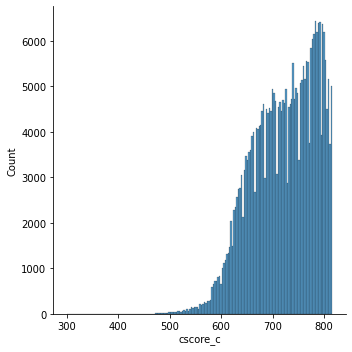

Skewness of cscore_min is -0.41933637190905276


<Figure size 432x288 with 0 Axes>

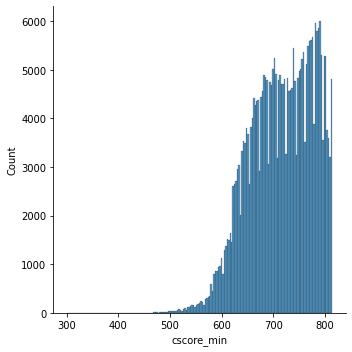

Skewness of orig_val is 1.5196958106900647


<Figure size 432x288 with 0 Axes>

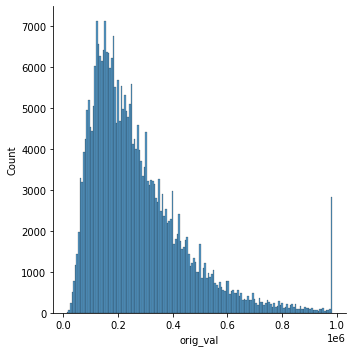

Skewness of Target is 0.2727909325125783


<Figure size 432x288 with 0 Axes>

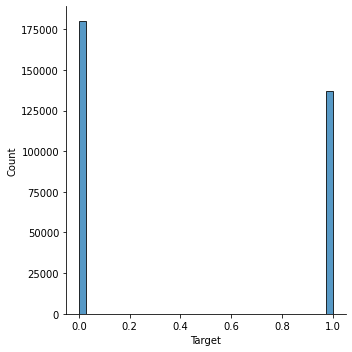

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, skew, kurtosis
for col in num_cols:

    print(f'Skewness of {col} is {skew(df4[col])}')

    plt.figure()
    sns.displot(df4[col])
    plt.show()


In [ ]:
import math
df4['orig_val']= np.cbrt(df4['orig_val'])

In [ ]:
skew(df4['orig_val'])

0.41126611889978687

## Dropping the correlated features

In [ ]:
df5 = df4.drop(['orig_val','cscore_b','cscore_c','msa'], axis=1)
df5.head()

loan_id channel  orig_rate  orig_upb  orig_term   orig_date  \
0      98877378       C      3.875  387000.0      360.0  2019-12-20   
1  676470473495       C      6.125  138000.0      360.0  2008-11-20   
2  454566884436       C      6.750  151000.0      360.0  2007-08-20   
4  409620791247       C      5.625  103000.0      360.0  2005-07-20   
5  736342864722       R      6.500   36000.0      360.0  2003-03-20   

    first_pay  loan_age  oltv  ocltv  ... relocation_mortgage_indicator  \
0  2020-02-20      15.0  90.0   90.0  ...                             N   
1  2009-01-20     113.0  80.0   80.0  ...                             N   
2  2007-10-20      62.0  90.0   90.0  ...                             N   
4  2005-09-20      71.0  93.0   93.0  ...                             N   
5  2003-05-20      74.0  87.0   87.0  ...                             N   

   high_balance_loan_indicator cscore_min Vintage Month_Year value 12M Change  \
0                            N      791.0    2019    2019-12   2.6   0.042532   
1                            N      591.0    2008    2008-11   5.2  -0.012375   
2                            N      723.0    2007    2007-08   3.4  -0.004522   
4                            N      684.0    2005    2005-07   6.9   0.062542   
5                            N      656.0    2003    2003-03   7.2   0.061177   

  36M Change 60M Change  Target  
0   0.221116   0.557525       1  
1   0.056401   0.168351       1  
2   0.529270   0.878522       1  
4   0.152820   0.219315       1  
5   0.207029   0.352972       1  

[5 rows x 32 columns]

In [ ]:
df5['new_ltv']=df5['oltv']-df5['ocltv']

In [ ]:
#new_ltv=oclt-oltv

In [ ]:
df5.head(5)

loan_id channel  orig_rate  orig_upb  orig_term   orig_date  \
0      98877378       C      3.875  387000.0      360.0  2019-12-20   
1  676470473495       C      6.125  138000.0      360.0  2008-11-20   
2  454566884436       C      6.750  151000.0      360.0  2007-08-20   
4  409620791247       C      5.625  103000.0      360.0  2005-07-20   
5  736342864722       R      6.500   36000.0      360.0  2003-03-20   

    first_pay  loan_age  oltv  ocltv  ... high_balance_loan_indicator  \
0  2020-02-20      15.0  90.0   90.0  ...                           N   
1  2009-01-20     113.0  80.0   80.0  ...                           N   
2  2007-10-20      62.0  90.0   90.0  ...                           N   
4  2005-09-20      71.0  93.0   93.0  ...                           N   
5  2003-05-20      74.0  87.0   87.0  ...                           N   

   cscore_min Vintage Month_Year value 12M Change 36M Change 60M Change  \
0       791.0    2019    2019-12   2.6   0.042532   0.221116   0.557525   
1       591.0    2008    2008-11   5.2  -0.012375   0.056401   0.168351   
2       723.0    2007    2007-08   3.4  -0.004522   0.529270   0.878522   
4       684.0    2005    2005-07   6.9   0.062542   0.152820   0.219315   
5       656.0    2003    2003-03   7.2   0.061177   0.207029   0.352972   

  Target  new_ltv  
0      1      0.0  
1      1      0.0  
2      1      0.0  
4      1      0.0  
5      1      0.0  

[5 rows x 33 columns]

In [ ]:
df5 = df5.drop(['ocltv','oltv'], axis=1)

### Setting new values for the outliers

In [ ]:
def cap_floor(df5, x_val):
  q_l = df5[x_val].quantile(0.01)
  q_h = df5[x_val].quantile(0.99)

  df5.loc[df5[x_val]<= q_l, x_val] = q_l
  df5.loc[df5[x_val]>= q_h, x_val] = q_h

In [ ]:
df5.value=pd.to_numeric(df5.value)

In [ ]:
cat_cols3 = ['channel', 'num_bo','first_flag','purpose','prop','no_units', 'occ_stat','state','mi_type','homeready_program_indicator','relocation_mortgage_indicator','high_balance_loan_indicator']

num_cols3 = ['12M Change','36M Change', '60M Change','value','loan_age', 'mi_pct', 'orig_rate','orig_upb','orig_term','new_ltv','dti','cscore_min']    #New num_cols after dropped ones

In [ ]:
for i in (num_cols3):

  cap_floor(df5, i)

In [ ]:
df5.shape

(317202, 31)

In [ ]:
df5=df5.dropna()

## Analyzing Skewness after Setting New Values for Outliers




In [ ]:
for i in num_cols3:
  print(i,skew(df5[i]))

12M Change 0.41917442497544916
36M Change 0.6341462283723964
60M Change 0.6555768958621301
value 1.1345009788754137
loan_age 0.9852802843426449
mi_pct -1.9433020129255807
orig_rate -0.15359740517363538
orig_upb 0.9753262445019885
orig_term -1.4875538186145645
new_ltv -4.397407417112588
dti -0.04780657991577796
cscore_min -0.3266872052773992


In [ ]:
# Data smoothing through square root function on the orig_upb feature to eliminate skewness.
df5['orig_upb']= np.sqrt(df5['orig_upb'])

In [ ]:
df5['loan_age']= np.sqrt(df5['loan_age'])

In [ ]:
df5['value']= np.cbrt(df5['value'])

In [ ]:
for i in ['new_ltv']:
  df5[i] = np.square(df5[i])

In [ ]:
df5['mi_pct']= np.square(df5['mi_pct'])

In [ ]:
#df5['orig_term'] = np.power(df5['orig_term'],4)

In [ ]:
for i in num_cols3:
  print(i,skew(df5[i]))

12M Change 0.41917442497544916
36M Change 0.6341462283723964
60M Change 0.6555768958621301
value 0.4726557115929393
loan_age 0.16581670974955687
mi_pct -0.406294467890259
orig_rate -0.15359740517363538
orig_upb 0.3836460846551306
orig_term -1.4875538186145645
new_ltv 5.441484682816113
dti -0.04780657991577796
cscore_min -0.3266872052773992


In [ ]:
df5['orig_term'].value_counts().sort_index()

120.0      6139
121.0         8
123.0         1
125.0         1
127.0         1
          ...  
356.0        34
357.0         8
358.0        14
359.0         8
360.0    244892
Name: orig_term, Length: 152, dtype: int64

In [ ]:
df5['orig_term_cat'] = pd.cut(df5['orig_term'], bins=[119, 180, 240, 300, 360, np.inf], labels=[0, 1, 2, 3, 4])

In [ ]:
df5['orig_term_cat'].value_counts()

3    245992
0     56404
1     12620
2      2141
4         0
Name: orig_term_cat, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

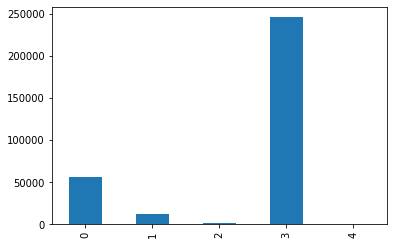

In [ ]:
df5['orig_term_cat'].value_counts().sort_index().plot.bar()
plt.show()

In [ ]:
df5 = df5.drop(columns=['orig_term','loan_id'])

### Setting the Data Types

In [ ]:
df5 = df5.copy()
for col in cat_cols3:
  df5[col] = df5[col].astype(str)

#**Applying the Machine Learning Models**


## Splitting Data Using Vintage
The data is splitted into training and test set in terms of the Vintage. If the Vintage is more then 2014 then the data data is included in training set otherwise in test set.



In [ ]:
df5.head()

channel  orig_rate    orig_upb   orig_date   first_pay   loan_age num_bo  \
0       C      3.875  622.093241  2019-12-20  2020-02-20   3.872983    1.0   
1       C      6.125  371.483512  2008-11-20  2009-01-20  10.630146    1.0   
2       C      6.750  388.587185  2007-08-20  2007-10-20   7.874008    2.0   
4       C      5.625  320.936131  2005-07-20  2005-09-20   8.426150    1.0   
5       R      6.500  189.736660  2003-03-20  2003-05-20   8.602325    1.0   

    dti first_flag purpose  ... cscore_min Vintage Month_Year     value  \
0  37.0          Y       P  ...      791.0    2019    2019-12  1.375069   
1  46.0          Y       P  ...      591.0    2008    2008-11  1.732478   
2  39.0          N       C  ...      723.0    2007    2007-08  1.503695   
4  58.0          N       R  ...      684.0    2005    2005-07  1.903778   
5  22.0          N       R  ...      656.0    2003    2003-03  1.930979   

  12M Change  36M Change 60M Change Target new_ltv orig_term_cat  
0   0.042532    0.221116   0.557525      1     0.0             3  
1  -0.012375    0.056401   0.168351      1     0.0             3  
2  -0.004522    0.529270   0.878522      1     0.0             3  
4   0.062542    0.152820   0.219315      1     0.0             3  
5   0.061177    0.207029   0.352972      1     0.0             3  

[5 rows x 30 columns]

In [ ]:
df5=df5.drop(['zip','Month_Year', 'state','first_pay'], axis=1)

In [ ]:
df5=df5.dropna()

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317157 entries, 0 to 357685
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   channel                        317157 non-null  object  
 1   orig_rate                      317157 non-null  float64 
 2   orig_upb                       317157 non-null  float64 
 3   orig_date                      317157 non-null  object  
 4   loan_age                       317157 non-null  float64 
 5   num_bo                         317157 non-null  object  
 6   dti                            317157 non-null  float64 
 7   first_flag                     317157 non-null  object  
 8   purpose                        317157 non-null  object  
 9   prop                           317157 non-null  object  
 10  no_units                       317157 non-null  object  
 11  occ_stat                       317157 non-null  object  
 12  mi_pct          

In [ ]:
df5.head()

channel  orig_rate    orig_upb   orig_date   loan_age num_bo   dti  \
0       C      3.875  622.093241  2019-12-20   3.872983    1.0  37.0   
1       C      6.125  371.483512  2008-11-20  10.630146    1.0  46.0   
2       C      6.750  388.587185  2007-08-20   7.874008    2.0  39.0   
4       C      5.625  320.936131  2005-07-20   8.426150    1.0  58.0   
5       R      6.500  189.736660  2003-03-20   8.602325    1.0  22.0   

  first_flag purpose prop  ... high_balance_loan_indicator cscore_min  \
0          Y       P   PU  ...                           N      791.0   
1          Y       P   PU  ...                           N      591.0   
2          N       C   SF  ...                           N      723.0   
4          N       R   SF  ...                           N      684.0   
5          N       R   CO  ...                           N      656.0   

   Vintage     value 12M Change 36M Change 60M Change  Target new_ltv  \
0     2019  1.375069   0.042532   0.221116   0.557525       1     0.0   
1     2008  1.732478  -0.012375   0.056401   0.168351       1     0.0   
2     2007  1.503695  -0.004522   0.529270   0.878522       1     0.0   
4     2005  1.903778   0.062542   0.152820   0.219315       1     0.0   
5     2003  1.930979   0.061177   0.207029   0.352972       1     0.0   

   orig_term_cat  
0              3  
1              3  
2              3  
4              3  
5              3  

[5 rows x 26 columns]

In [ ]:
(df5['Vintage']>= '2014').value_counts()

False    246611
True      70546
Name: Vintage, dtype: int64

In [ ]:
df5=df5.drop(['orig_date'], axis=1)

## Transforming the Data

## Using the Column Transformer and Scaling`

In [ ]:
dfe=df5

In [ ]:
df5=dfe

In [ ]:
df5.head()

channel  orig_rate    orig_upb   loan_age num_bo   dti first_flag purpose  \
0       C      3.875  622.093241   3.872983    1.0  37.0          Y       P   
1       C      6.125  371.483512  10.630146    1.0  46.0          Y       P   
2       C      6.750  388.587185   7.874008    2.0  39.0          N       C   
4       C      5.625  320.936131   8.426150    1.0  58.0          N       R   
5       R      6.500  189.736660   8.602325    1.0  22.0          N       R   

  prop no_units  ... high_balance_loan_indicator  cscore_min Vintage  \
0   PU      1.0  ...                           N       791.0    2019   
1   PU      1.0  ...                           N       591.0    2008   
2   SF      1.0  ...                           N       723.0    2007   
4   SF      1.0  ...                           N       684.0    2005   
5   CO      1.0  ...                           N       656.0    2003   

      value 12M Change 36M Change  60M Change Target  new_ltv  orig_term_cat  
0  1.375069   0.042532   0.221116    0.557525      1      0.0              3  
1  1.732478  -0.012375   0.056401    0.168351      1      0.0              3  
2  1.503695  -0.004522   0.529270    0.878522      1      0.0              3  
4  1.903778   0.062542   0.152820    0.219315      1      0.0              3  
5  1.930979   0.061177   0.207029    0.352972      1      0.0              3  

[5 rows x 25 columns]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
cat_transformer = OneHotEncoder(sparse=False)
num_transformer = MinMaxScaler()


In [ ]:
cat_cols3 = ['orig_term_cat','channel','num_bo','first_flag','purpose','prop','no_units', 'occ_stat','mi_type','homeready_program_indicator','relocation_mortgage_indicator','high_balance_loan_indicator']

num_cols3 = ['12M Change','36M Change', '60M Change','value','loan_age', 'mi_pct', 'orig_rate','orig_upb','new_ltv','dti','cscore_min']    #New num_cols after dropped ones
passthrough_feats=['Vintage','Target']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(sparse=False), cat_cols3),
                  ('num',  MinMaxScaler(), num_cols3)
    ],
        remainder='passthrough')

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [ ]:
df5 =pipeline.fit_transform(df5)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df5.shape

(317157, 55)

In [ ]:
preprocessor.named_transformers_["cat"].get_feature_names_out()

array(['orig_term_cat_0', 'orig_term_cat_1', 'orig_term_cat_2',
       'orig_term_cat_3', 'channel_B', 'channel_C', 'channel_R',
       'num_bo_1.0', 'num_bo_2.0', 'num_bo_3.0', 'num_bo_4.0',
       'num_bo_5.0', 'num_bo_6.0', 'num_bo_7.0', 'first_flag_N',
       'first_flag_Y', 'purpose_C', 'purpose_P', 'purpose_R', 'purpose_U',
       'prop_CO', 'prop_CP', 'prop_MH', 'prop_PU', 'prop_SF',
       'no_units_1.0', 'no_units_2.0', 'no_units_3.0', 'no_units_4.0',
       'occ_stat_I', 'occ_stat_P', 'occ_stat_S', 'mi_type_0',
       'mi_type_1.0', 'mi_type_2.0', 'mi_type_3.0',
       'homeready_program_indicator_N', 'homeready_program_indicator_Y',
       'relocation_mortgage_indicator_N',
       'relocation_mortgage_indicator_Y', 'high_balance_loan_indicator_N',
       'high_balance_loan_indicator_Y'], dtype=object)

In [ ]:
preprocessor.named_transformers_["num"].get_feature_names_out()

array(['12M Change', '36M Change', '60M Change', 'value', 'loan_age',
       'mi_pct', 'orig_rate', 'orig_upb', 'new_ltv', 'dti', 'cscore_min'],
      dtype=object)

In [ ]:
column_names = (
    preprocessor.named_transformers_["cat"].get_feature_names_out().tolist()
    #+preprocessor.named_transformers_["num"].get_feature_names_out().tolist()
    +num_cols3
  +passthrough_feats


)
column_names



['orig_term_cat_0',
 'orig_term_cat_1',
 'orig_term_cat_2',
 'orig_term_cat_3',
 'channel_B',
 'channel_C',
 'channel_R',
 'num_bo_1.0',
 'num_bo_2.0',
 'num_bo_3.0',
 'num_bo_4.0',
 'num_bo_5.0',
 'num_bo_6.0',
 'num_bo_7.0',
 'first_flag_N',
 'first_flag_Y',
 'purpose_C',
 'purpose_P',
 'purpose_R',
 'purpose_U',
 'prop_CO',
 'prop_CP',
 'prop_MH',
 'prop_PU',
 'prop_SF',
 'no_units_1.0',
 'no_units_2.0',
 'no_units_3.0',
 'no_units_4.0',
 'occ_stat_I',
 'occ_stat_P',
 'occ_stat_S',
 'mi_type_0',
 'mi_type_1.0',
 'mi_type_2.0',
 'mi_type_3.0',
 'homeready_program_indicator_N',
 'homeready_program_indicator_Y',
 'relocation_mortgage_indicator_N',
 'relocation_mortgage_indicator_Y',
 'high_balance_loan_indicator_N',
 'high_balance_loan_indicator_Y',
 '12M Change',
 '36M Change',
 '60M Change',
 'value',
 'loan_age',
 'mi_pct',
 'orig_rate',
 'orig_upb',
 'new_ltv',
 'dti',
 'cscore_min',
 'Vintage',
 'Target']

In [ ]:
df5 = pd.DataFrame(df5,columns=column_names)

In [ ]:
for col in preprocessor.named_transformers_["cat"].get_feature_names_out().tolist()+passthrough_feats:
  df5[col] = df5[col].astype(int)

In [ ]:
for col in num_cols3: #preprocessor.named_transformers_["num"].get_feature_names_out().tolist():
  df5[col] = df5[col].astype('float')

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317157 entries, 0 to 317156
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   orig_term_cat_0                  317157 non-null  int64  
 1   orig_term_cat_1                  317157 non-null  int64  
 2   orig_term_cat_2                  317157 non-null  int64  
 3   orig_term_cat_3                  317157 non-null  int64  
 4   channel_B                        317157 non-null  int64  
 5   channel_C                        317157 non-null  int64  
 6   channel_R                        317157 non-null  int64  
 7   num_bo_1.0                       317157 non-null  int64  
 8   num_bo_2.0                       317157 non-null  int64  
 9   num_bo_3.0                       317157 non-null  int64  
 10  num_bo_4.0                       317157 non-null  int64  
 11  num_bo_5.0                       317157 non-null  int64  
 12  nu

In [ ]:
df5['Target']=df5['Target'].astype(int)

In [ ]:
df5.head()

orig_term_cat_0  orig_term_cat_1  orig_term_cat_2  orig_term_cat_3  \
0                0                0                0                1   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4                0                0                0                1   

   channel_B  channel_C  channel_R  num_bo_1.0  num_bo_2.0  num_bo_3.0  ...  \
0          0          1          0           1           0           0  ...   
1          0          1          0           1           0           0  ...   
2          0          1          0           0           1           0  ...   
3          0          1          0           1           0           0  ...   
4          0          0          1           1           0           0  ...   

      value  loan_age    mi_pct  orig_rate  orig_upb  new_ltv       dti  \
0  0.067829  0.229330  0.444958   0.204545  0.788298      0.0  0.519231   
1  0.393333  0.768705  0.444958   0.613636  0.334159      0.0  0.692308   
2  0.184972  0.548703  0.444958   0.727273  0.365153      0.0  0.557692   
3  0.549341  0.592776  0.699352   0.522727  0.242560      0.0  0.923077   
4  0.574113  0.606839  0.444958   0.681818  0.004809      0.0  0.230769   

   cscore_min  Vintage  Target  
0    0.909836     2019       1  
1    0.090164     2008       1  
2    0.631148     2007       1  
3    0.471311     2005       1  
4    0.356557     2003       1  

[5 rows x 55 columns]

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317157 entries, 0 to 317156
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   orig_term_cat_0                  317157 non-null  int64  
 1   orig_term_cat_1                  317157 non-null  int64  
 2   orig_term_cat_2                  317157 non-null  int64  
 3   orig_term_cat_3                  317157 non-null  int64  
 4   channel_B                        317157 non-null  int64  
 5   channel_C                        317157 non-null  int64  
 6   channel_R                        317157 non-null  int64  
 7   num_bo_1.0                       317157 non-null  int64  
 8   num_bo_2.0                       317157 non-null  int64  
 9   num_bo_3.0                       317157 non-null  int64  
 10  num_bo_4.0                       317157 non-null  int64  
 11  num_bo_5.0                       317157 non-null  int64  
 12  nu

In [ ]:
 #df5 = df5.drop(columns=['num_bo_5.0','num_bo_6.0','num_bo_7.0'],axis=1)

In [ ]:
df5_sample= df5.sample(frac=0.8, axis=0, random_state=0)

In [ ]:
df6 = df5_sample.loc[df5_sample['Vintage'] < 2014]

In [ ]:
df6.shape

(253726, 55)

In [ ]:
df7 = df5_sample.loc[df5_sample['Vintage']>= 2014]

In [ ]:
df7.shape

(0, 55)

In [ ]:
df5.head()

orig_term_cat_0  orig_term_cat_1  orig_term_cat_2  orig_term_cat_3  \
0                0                0                0                1   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4                0                0                0                1   

   channel_B  channel_C  channel_R  num_bo_1.0  num_bo_2.0  num_bo_3.0  ...  \
0          0          1          0           1           0           0  ...   
1          0          1          0           1           0           0  ...   
2          0          1          0           0           1           0  ...   
3          0          1          0           1           0           0  ...   
4          0          0          1           1           0           0  ...   

   value  loan_age  mi_pct  orig_rate  orig_upb   new_ltv       dti  \
0   37.0     625.0   791.0     2019.0  1.375069  0.042532  0.221116   
1   46.0     625.0   591.0     2008.0  1.732478 -0.012375  0.056401   
2   39.0     625.0   723.0     2007.0  1.503695 -0.004522  0.529270   
3   58.0     900.0   684.0     2005.0  1.903778  0.062542  0.152820   
4   22.0     625.0   656.0     2003.0  1.930979  0.061177  0.207029   

   cscore_min  Vintage  Target  
0    0.557525        1       0  
1    0.168351        1       0  
2    0.878522        1       0  
3    0.219315        1       0  
4    0.352972        1       0  

[5 rows x 55 columns]

## Downsampling the Data and Preparing the Data for Model Training/Testing

In [ ]:
df6.shape, df7.shape

((197227, 55), (56499, 55))

In [ ]:
X_train = df6.drop(columns = ['Target', 'Vintage'])

In [ ]:
y_train = df6['Target']

In [ ]:
X_test = df7.drop(columns = ['Target', 'Vintage'])

In [ ]:
y_test = df7['Target']

In [ ]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape


((197227, 53), (197227,), (56499, 53), (56499,))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197227 entries, 234240 to 203860
Data columns (total 53 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   orig_term_cat_0                  197227 non-null  int64  
 1   orig_term_cat_1                  197227 non-null  int64  
 2   orig_term_cat_2                  197227 non-null  int64  
 3   orig_term_cat_3                  197227 non-null  int64  
 4   channel_B                        197227 non-null  int64  
 5   channel_C                        197227 non-null  int64  
 6   channel_R                        197227 non-null  int64  
 7   num_bo_1.0                       197227 non-null  int64  
 8   num_bo_2.0                       197227 non-null  int64  
 9   num_bo_3.0                       197227 non-null  int64  
 10  num_bo_4.0                       197227 non-null  int64  
 11  num_bo_5.0                       197227 non-null  int64  
 1

In [ ]:
print('Test Data Percentage:',(len(X_test)/(len(X_train)+len(X_test)))*100)

Test Data Percentage: 22.2677218732018


In [ ]:
list(X_train.columns)

['orig_term_cat_0',
 'orig_term_cat_1',
 'orig_term_cat_2',
 'orig_term_cat_3',
 'channel_B',
 'channel_C',
 'channel_R',
 'num_bo_1.0',
 'num_bo_2.0',
 'num_bo_3.0',
 'num_bo_4.0',
 'num_bo_5.0',
 'num_bo_6.0',
 'num_bo_7.0',
 'first_flag_N',
 'first_flag_Y',
 'purpose_C',
 'purpose_P',
 'purpose_R',
 'purpose_U',
 'prop_CO',
 'prop_CP',
 'prop_MH',
 'prop_PU',
 'prop_SF',
 'no_units_1.0',
 'no_units_2.0',
 'no_units_3.0',
 'no_units_4.0',
 'occ_stat_I',
 'occ_stat_P',
 'occ_stat_S',
 'mi_type_0',
 'mi_type_1.0',
 'mi_type_2.0',
 'mi_type_3.0',
 'homeready_program_indicator_N',
 'homeready_program_indicator_Y',
 'relocation_mortgage_indicator_N',
 'relocation_mortgage_indicator_Y',
 'high_balance_loan_indicator_N',
 'high_balance_loan_indicator_Y',
 '12M Change',
 '36M Change',
 '60M Change',
 'value',
 'loan_age',
 'mi_pct',
 'orig_rate',
 'orig_upb',
 'new_ltv',
 'dti',
 'cscore_min']

In [ ]:
list(X_test.columns)

['orig_term_cat_0',
 'orig_term_cat_1',
 'orig_term_cat_2',
 'orig_term_cat_3',
 'channel_B',
 'channel_C',
 'channel_R',
 'num_bo_1.0',
 'num_bo_2.0',
 'num_bo_3.0',
 'num_bo_4.0',
 'num_bo_5.0',
 'num_bo_6.0',
 'num_bo_7.0',
 'first_flag_N',
 'first_flag_Y',
 'purpose_C',
 'purpose_P',
 'purpose_R',
 'purpose_U',
 'prop_CO',
 'prop_CP',
 'prop_MH',
 'prop_PU',
 'prop_SF',
 'no_units_1.0',
 'no_units_2.0',
 'no_units_3.0',
 'no_units_4.0',
 'occ_stat_I',
 'occ_stat_P',
 'occ_stat_S',
 'mi_type_0',
 'mi_type_1.0',
 'mi_type_2.0',
 'mi_type_3.0',
 'homeready_program_indicator_N',
 'homeready_program_indicator_Y',
 'relocation_mortgage_indicator_N',
 'relocation_mortgage_indicator_Y',
 'high_balance_loan_indicator_N',
 'high_balance_loan_indicator_Y',
 '12M Change',
 '36M Change',
 '60M Change',
 'value',
 'loan_age',
 'mi_pct',
 'orig_rate',
 'orig_upb',
 'new_ltv',
 'dti',
 'cscore_min']

## **Logistic Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
'''

model = LogisticRegression(max_iter=10000, n_jobs=-1)
pipeline = Pipeline(steps=[('preprocessor', transformer),('selector', SelectKBest(f_classif, k=16)), ('classifier', model)])
param_grid = [
    {'classifier__penalty' : ['l1', 'l2','elasticnet'],
     'classifier__C' : np.linspace(0.1, 0.3, 4),
     'classifier__solver' : ['liblinear', 'lbfgs']
}]

'''

"\n\nmodel = LogisticRegression(max_iter=10000, n_jobs=-1)\npipeline = Pipeline(steps=[('preprocessor', transformer),('selector', SelectKBest(f_classif, k=16)), ('classifier', model)])\nparam_grid = [\n    {'classifier__penalty' : ['l1', 'l2','elasticnet'],\n     'classifier__C' : np.linspace(0.1, 0.3, 4),\n     'classifier__solver' : ['liblinear', 'lbfgs']\n}]\n\n"

In [ ]:
model_log = LogisticRegression(max_iter=100, n_jobs=-1)
pipeline = Pipeline(steps=[('selector', SelectKBest(f_classif, k=16)), ('classifier', model_log)])
param_grid = [
    {'classifier__penalty' : ['l1', 'l2','elasticnet'],
     'classifier__C' : np.linspace(0.1, 0.3, 4),
     'classifier__solver' : ['liblinear', 'lbfgs']
}]

In [ ]:
reg_grid = GridSearchCV( pipeline, param_grid)

In [ ]:
reg_grid.fit(X_train, y_train)

In [ ]:
print('best_parameters :', reg_grid.best_params_)
print('accuracy :', reg_grid.best_score_)

best_parameters : {'classifier__C': 0.23333333333333334, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
accuracy : 0.8053410407229237


In [ ]:
print('Training Score:', reg_grid.score(X_train, y_train))
print('Testing Score:', reg_grid.score(X_test, y_test))

Training Score: 0.8053866864070335
Testing Score: 0.7342076850917716


**Running the model with best Parameters:**

In [ ]:
model_LR5 = LogisticRegression(max_iter=1000, C = 0.3, penalty= 'l1', solver = 'liblinear')
pipeline_log = Pipeline(steps=[('selector', SelectKBest(f_classif, k=16)), ('classifier', model_LR5)])
pipeline_log.fit(X_train,y_train)
print('Training Score:', pipeline_log.score(X_train, y_train))
print('Testing Score:', pipeline_log.score(X_test, y_test))

Training Score: 0.8054221785049714
Testing Score: 0.7341545868068461


In [ ]:
model_LR6 = LogisticRegression(max_iter=1000, C = 0.3, penalty= 'l1', solver = 'liblinear')
pipeline_log1 = Pipeline(steps=[('classifier', model_LR6)])
pipeline_log1.fit(X_train,y_train)
print('Training Score:', pipeline_log1.score(X_train, y_train))
print('Testing Score:', pipeline_log1.score(X_test, y_test))

Training Score: 0.8100209403377834
Testing Score: 0.7479424414591409


**Scores from Project 2 : **
*   {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
*   accuracy : 0.7997359018895259
*  Training Score: 0.7998114826621849
*  Testing Score: 0.720258022372826


Model with best params;

* Training Score: 0.8081381510647456
* Testing Score: 0.7313485860451897

### Feature Importances for Logistic Regression

In [ ]:
pipeline_log[:-1].get_feature_names_out()

array(['orig_term_cat_0', 'orig_term_cat_3', 'num_bo_1.0', 'num_bo_2.0',
       'purpose_C', 'purpose_R', 'mi_type_0', 'mi_type_1.0', '36M Change',
       '60M Change', 'value', 'loan_age', 'orig_rate', 'new_ltv', 'dti',
       'cscore_min'], dtype=object)

In [ ]:
pipeline_log.steps[0][1]

SelectKBest(k=16)

In [ ]:
pipeline_log.steps[1][1]

LogisticRegression(C=0.3, max_iter=1000, penalty='l1', solver='liblinear')

In [ ]:
a1= pipeline_log[:-1].get_feature_names_out()


In [ ]:
a1

array(['orig_term_cat_0', 'orig_term_cat_3', 'num_bo_1.0', 'num_bo_2.0',
       'purpose_C', 'purpose_R', 'mi_type_0', 'mi_type_1.0', '36M Change',
       '60M Change', 'value', 'loan_age', 'orig_rate', 'new_ltv', 'dti',
       'cscore_min'], dtype=object)

In [ ]:
len(pipeline_log[:-1].get_feature_names_out())

16

In [ ]:
a2 = pipeline_log.steps[1][1].coef_

In [ ]:
a2

array([[-0.44188   ,  0.4682589 ,  0.92839995,  0.08714471,  0.68604976,
         0.32753368, -0.35728068, -0.49426674, -3.39027029,  5.4847157 ,
        -0.55843802,  4.05839661,  0.78701992,  2.49364433,  1.27424295,
        -3.22053815]])

In [ ]:
df_log_results = pd.DataFrame(a1)

In [ ]:
df_log_results2 = pd.DataFrame(a2[0])

In [ ]:
result_log = pd.concat([df_log_results, df_log_results2], axis = 1)


In [ ]:
result_log.columns = ['feature_names','feature_importances']

In [ ]:
result_log['abs_feature_importances']=np.abs(result_log.feature_importances)

In [ ]:
result_log.sort_values('feature_importances')

feature_names  feature_importances  abs_feature_importances
8        36M Change            -3.390270                 3.390270
15       cscore_min            -3.220538                 3.220538
10            value            -0.558438                 0.558438
7       mi_type_1.0            -0.494267                 0.494267
0   orig_term_cat_0            -0.441880                 0.441880
6         mi_type_0            -0.357281                 0.357281
3        num_bo_2.0             0.087145                 0.087145
5         purpose_R             0.327534                 0.327534
1   orig_term_cat_3             0.468259                 0.468259
4         purpose_C             0.686050                 0.686050
12        orig_rate             0.787020                 0.787020
2        num_bo_1.0             0.928400                 0.928400
14              dti             1.274243                 1.274243
13          new_ltv             2.493644                 2.493644
11         loan_age             4.058397                 4.058397
9        60M Change             5.484716                 5.484716

In [ ]:
pipeline_log.steps[1][1].intercept_

array([-4.41207331])

In [ ]:
result_log.set_index('feature_names', inplace=True)
result_log


feature_importances  abs_feature_importances
feature_names                                                
orig_term_cat_0            -0.441880                 0.441880
orig_term_cat_3             0.468259                 0.468259
num_bo_1.0                  0.928400                 0.928400
num_bo_2.0                  0.087145                 0.087145
purpose_C                   0.686050                 0.686050
purpose_R                   0.327534                 0.327534
mi_type_0                  -0.357281                 0.357281
mi_type_1.0                -0.494267                 0.494267
36M Change                 -3.390270                 3.390270
60M Change                  5.484716                 5.484716
value                      -0.558438                 0.558438
loan_age                    4.058397                 4.058397
orig_rate                   0.787020                 0.787020
new_ltv                     2.493644                 2.493644
dti                         1.274243                 1.274243
cscore_min                 -3.220538                 3.220538

In [ ]:
result_log.sort_values('abs_feature_importances', ascending=False)

feature_importances  abs_feature_importances
feature_names                                                
60M Change                  5.484716                 5.484716
loan_age                    4.058397                 4.058397
36M Change                 -3.390270                 3.390270
cscore_min                 -3.220538                 3.220538
new_ltv                     2.493644                 2.493644
dti                         1.274243                 1.274243
num_bo_1.0                  0.928400                 0.928400
orig_rate                   0.787020                 0.787020
purpose_C                   0.686050                 0.686050
value                      -0.558438                 0.558438
mi_type_1.0                -0.494267                 0.494267
orig_term_cat_3             0.468259                 0.468259
orig_term_cat_0            -0.441880                 0.441880
mi_type_0                  -0.357281                 0.357281
purpose_R                   0.327534                 0.327534
num_bo_2.0                  0.087145                 0.087145

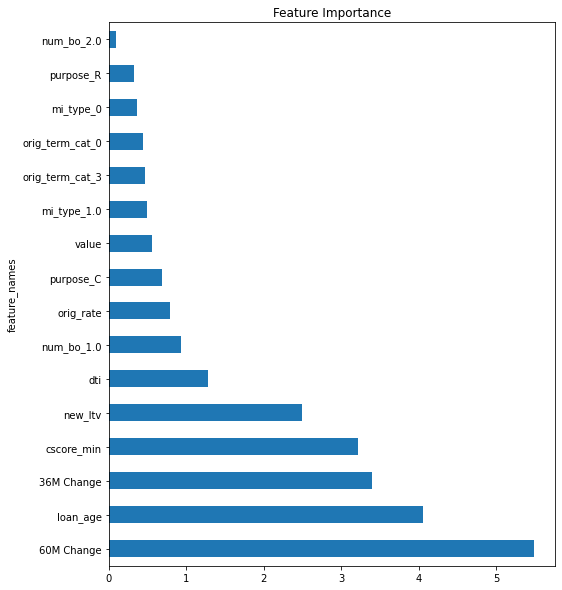

In [ ]:
plt.figure(figsize=(8,10))

result_log['abs_feature_importances'].nlargest(16).plot(x='feature_names', y='feature_importances',  kind='barh',title = 'Feature Importance');

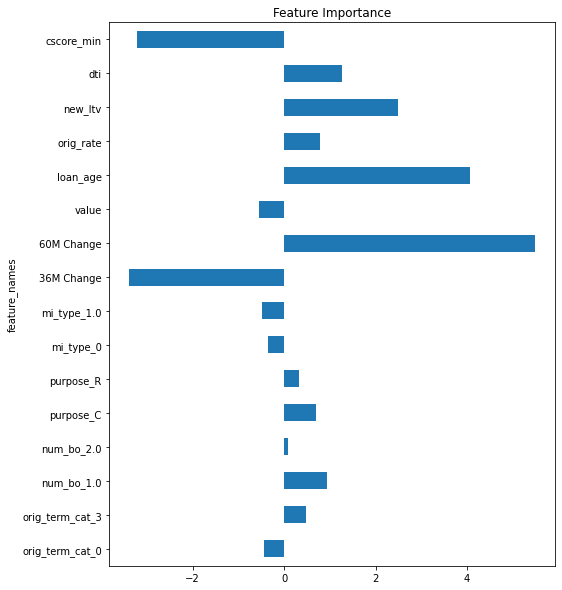

In [ ]:
plt.figure(figsize=(8,10))

result_log["feature_importances"].plot(x=result_log.index, y='feature_importances',  kind='barh',title = 'Feature Importance');

### Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_recall_fscore_support, classification_report

In [ ]:
# print('Training score:', log_reg_dummy.score(df_dummy_train, y_train),'Test Score:', log_reg_dummy.score(df_dummy_test, y_test))

In [ ]:
y_pred= pipeline_log.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[35627,  1964],
       [13057,  5851]])

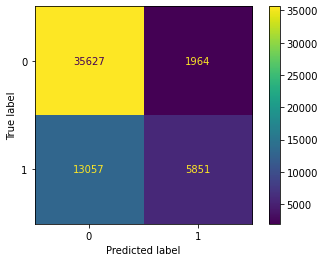

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipeline_log, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83     37591
           1       0.75      0.31      0.44     18908

    accuracy                           0.73     56499
   macro avg       0.74      0.63      0.63     56499
weighted avg       0.74      0.73      0.70     56499



### AUC-ROC Curve

In [ ]:
pred_prob1 = pipeline_log.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1])

In [ ]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.819623061295099


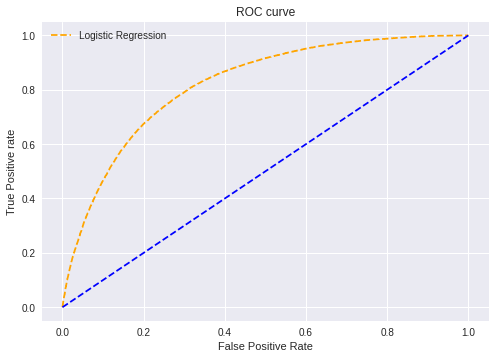

In [ ]:

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

### Default Graphs

In [ ]:
oot_index_names = df5[(df5['Vintage'] >= 2014)].index

In [ ]:
oot_index_names

Int64Index([     0,      6,     12,     18,     38,     40,     44,     52,
                54,     55,
            ...
            317129, 317130, 317131, 317133, 317135, 317137, 317144, 317152,
            317153, 317156],
           dtype='int64', length=70546)

In [ ]:
df_oot=X_test
df_oot.shape

(56499, 53)

In [ ]:
Y_oot=y_test
Y_oot.shape

(56499,)

In [ ]:
df_ins = X_train
df_ins.shape

(197227, 53)

In [ ]:
df_ins.shape

(197227, 53)

In [ ]:
Y_ins=y_train
Y_ins.shape

(197227,)

In [ ]:
final_features=list(df_ins)

In [ ]:
final_features

['orig_term_cat_0',
 'orig_term_cat_1',
 'orig_term_cat_2',
 'orig_term_cat_3',
 'channel_B',
 'channel_C',
 'channel_R',
 'num_bo_1.0',
 'num_bo_2.0',
 'num_bo_3.0',
 'num_bo_4.0',
 'num_bo_5.0',
 'num_bo_6.0',
 'num_bo_7.0',
 'first_flag_N',
 'first_flag_Y',
 'purpose_C',
 'purpose_P',
 'purpose_R',
 'purpose_U',
 'prop_CO',
 'prop_CP',
 'prop_MH',
 'prop_PU',
 'prop_SF',
 'no_units_1.0',
 'no_units_2.0',
 'no_units_3.0',
 'no_units_4.0',
 'occ_stat_I',
 'occ_stat_P',
 'occ_stat_S',
 'mi_type_0',
 'mi_type_1.0',
 'mi_type_2.0',
 'mi_type_3.0',
 'homeready_program_indicator_N',
 'homeready_program_indicator_Y',
 'relocation_mortgage_indicator_N',
 'relocation_mortgage_indicator_Y',
 'high_balance_loan_indicator_N',
 'high_balance_loan_indicator_Y',
 '12M Change',
 '36M Change',
 '60M Change',
 'value',
 'loan_age',
 'mi_pct',
 'orig_rate',
 'orig_upb',
 'new_ltv',
 'dti',
 'cscore_min']

In [ ]:
#orig_value

In [ ]:
model_LR6.predict_proba(df_ins.values)

array([[0.99040173, 0.00959827],
       [0.1801922 , 0.8198078 ],
       [0.08066262, 0.91933738],
       ...,
       [0.30223713, 0.69776287],
       [0.99527778, 0.00472222],
       [0.78301604, 0.21698396]])

In [ ]:
ypred = pd.DataFrame(model_LR6.predict_proba(df_ins.values),columns=['predA','pred'])
df11 = pd.DataFrame(df_ins.values, columns =final_features)
df12 = pd.DataFrame(Y_ins.values, columns =['target'])
df13 = df5.drop(oot_index_names)
df_ins_4plot_loc=pd.concat([df11,df12,df13[['Vintage']],ypred],axis=1)

In [ ]:
ypred_oot = pd.DataFrame(model_LR6.predict_proba(df_oot.values),columns=['predA','pred'])
df11_oot = pd.DataFrame(df_oot.values, columns =final_features)
df12_oot = pd.DataFrame(Y_oot.values, columns =['target'])
df13_oot=df5.loc[oot_index_names] ## df_oot=df_model.loc[oot_index_names]
df_oot_4plot_loc=pd.concat([df11_oot,df12_oot,df13_oot[['Vintage']],ypred_oot],axis=1)

In [ ]:
x_var='Vintage'
x_var_plot='Vintage'


y_var='target'
y_pred='pred'
bin_size=6

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
def marginal_plots(df_ins_4plot,df_oot_4plot,x_var,x_var_plot,y_var,y_pred,bin_size=6):
    fig = plt.figure(figsize=(12,10))
    fig.suptitle('Default: Marginal Plot for {}.'.format(x_var_plot), fontsize=16)
    gs = gridspec.GridSpec(2, 2, hspace=.1,height_ratios=[2, 1])


    # the first subplot for model performance along the feature of interest in-sample
    ax0 = plt.subplot(gs[0])

    s=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).mean() [y_var]
    line0, = ax0.plot(s.index.astype(str), s.values, color='r',label='line1')
    sp=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).mean() [y_pred]
    line1, = ax0.plot(sp.index.astype(str), sp.values, color='g',label='line2')
    plt.title("Build")

    # the second subplot for counts for that feature in-sample
    # shared axis X
    ax1 = plt.subplot(gs[2], sharex = ax0)
    ax0.grid()
    ax1.grid()



    t=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).count() [x_var]
    plt.setp(ax0.get_xticklabels(), visible=False)
    line2= ax1.bar(t.index.astype(str), t.values, color='b')
    plt.xticks(rotation = 90)
    # remove last tick label for the second subplot
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    # put legend on first subplot
    ax0.legend((line0, line1), ('Actuals', 'Predictions'), loc='lower left')


    # the third subplot for model performance along the feature of interest in holdout

    ax2 = plt.subplot(gs[1])
    # log scale for axis Y of the first subplot
    s=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).mean() [y_var]
    line4, = ax2.plot(s.index.astype(str), s.values, color='r',label='line1')
    sp=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).mean() [y_pred]+0.20
    line5, = ax2.plot(sp.index.astype(str), sp.values, color='g',label='line2')
    plt.title("Post-Build")

    # # the fourth subplot for counts for that feature in holdout
    # shared axis X
    ax3 = plt.subplot(gs[3], sharex = ax2)
    ax2.grid()
    ax3.grid()


    t=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).count() [x_var]
    plt.setp(ax2.get_xticklabels(), visible=False)
    line6= ax3.bar(t.index.astype(str), t.values, color='b')


    #plt.xticks(ax2.get_xticklabels(), [fmt(i) for i in x_sum], rotation=90)
    plt.xticks(rotation = 90)
    # remove last tick label for the second subplot
    yticks = ax3.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)

    plt.show()



In [ ]:
x_var_list=['Vintage',
            'orig_rate',
'orig_upb',
 #'orig_val',
 #'orig_term_cat',
 'loan_age',
 'new_ltv',
 'dti',
 'cscore_min',
 'mi_pct',
 '12M Change',
 '36M Change',
 '60M Change',
 'value']

x_var_name=['Vintage',
            'Origination Rate',
            'Origination Balance',
            #'Origination Value',
            #'Origination Term',
            'Loan Age',
            'New LTV',
            'Debt to Income',
            'Minimum FICO',
            'Mortgage Insurance Percent',
            '12M HPA',
            '36M HPA',
            '60M HPA',
            'Unemployment']

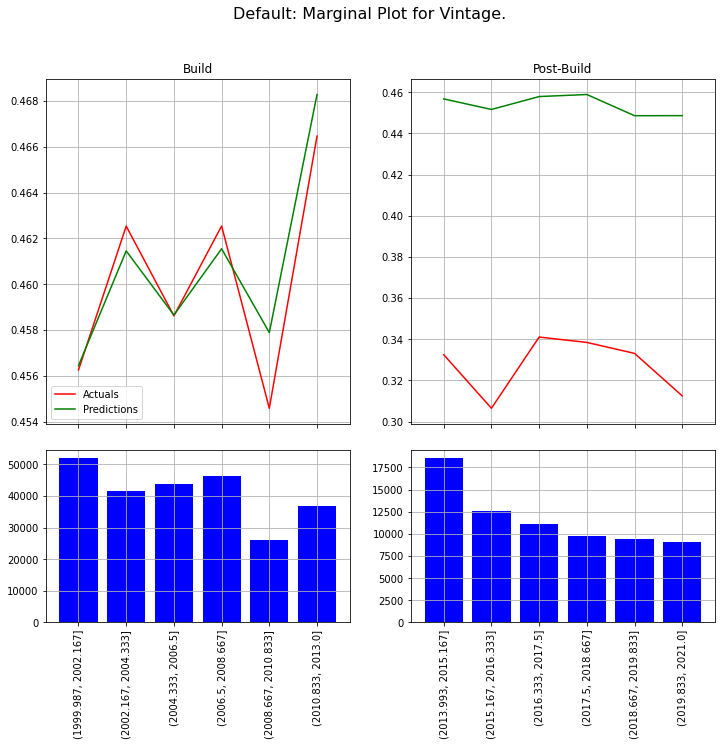

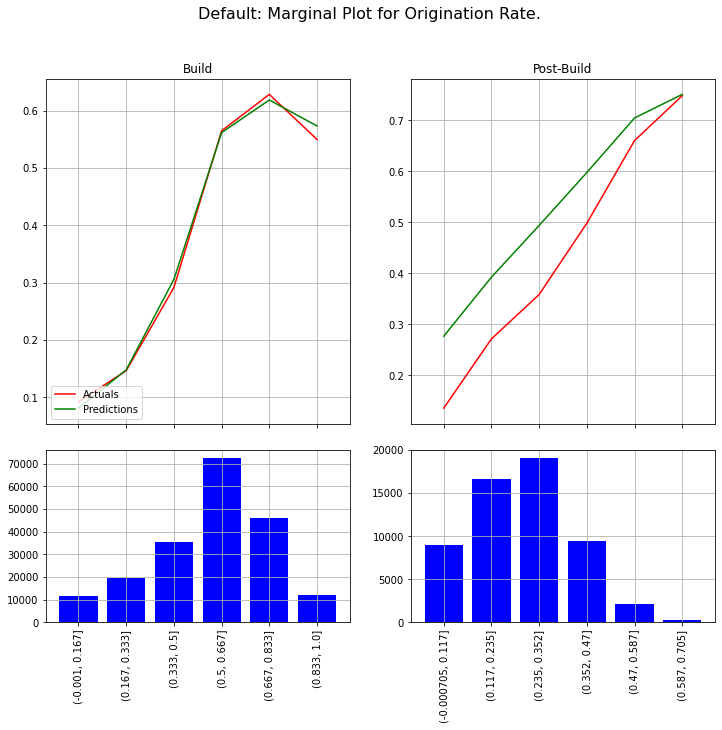

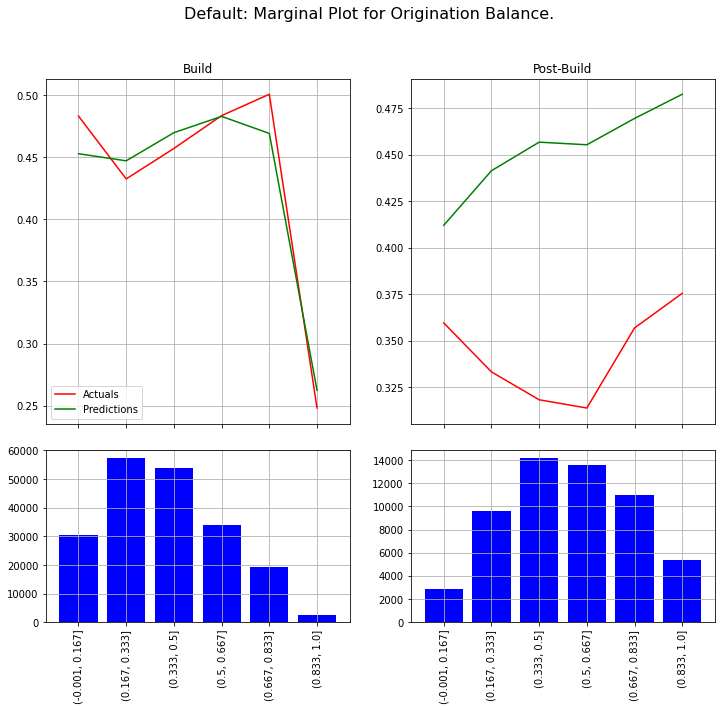

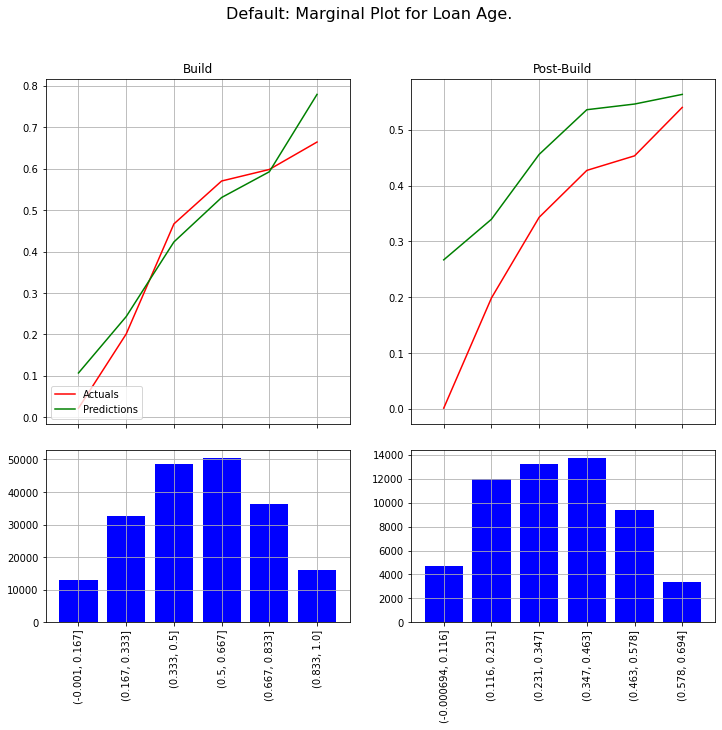

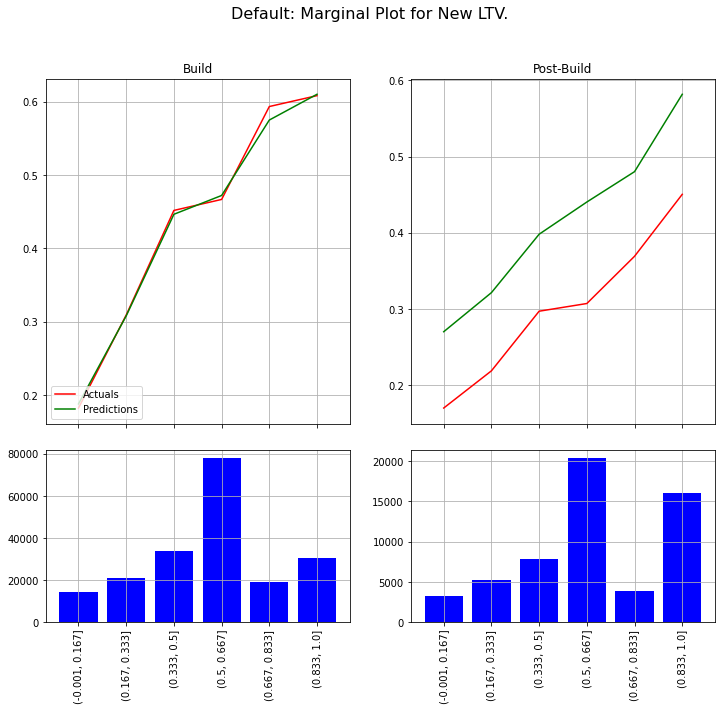

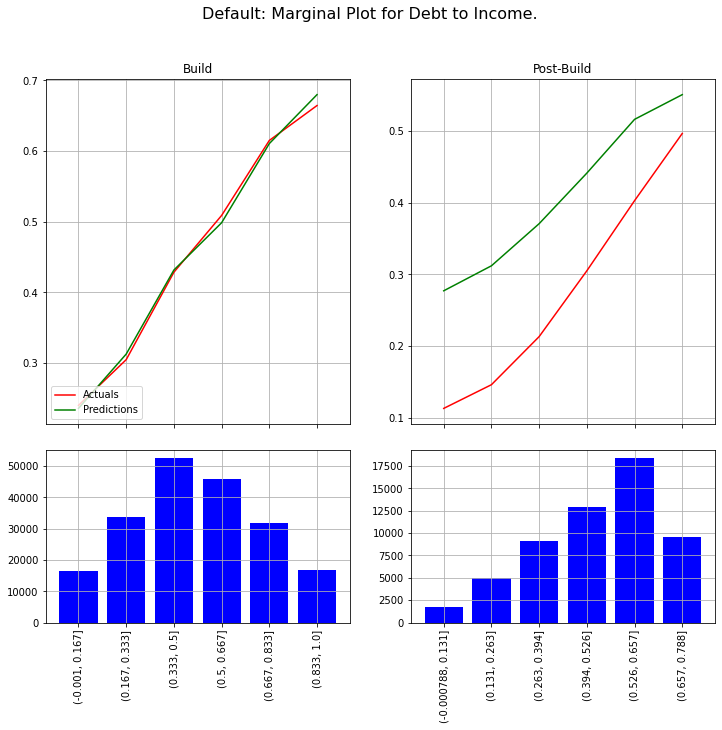

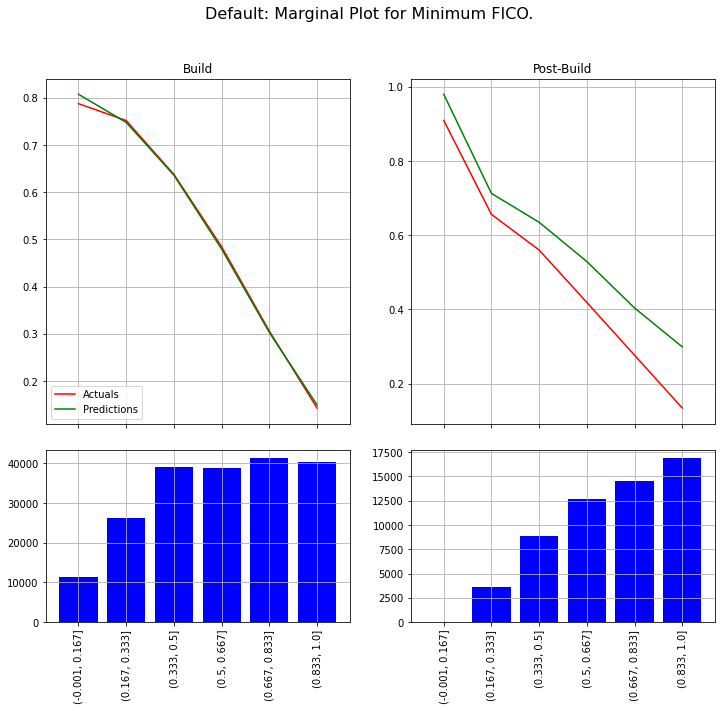

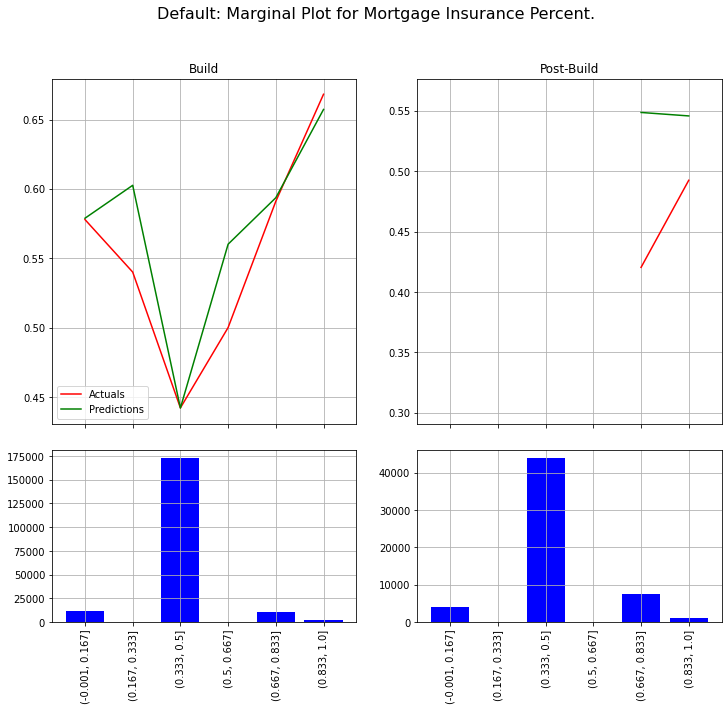

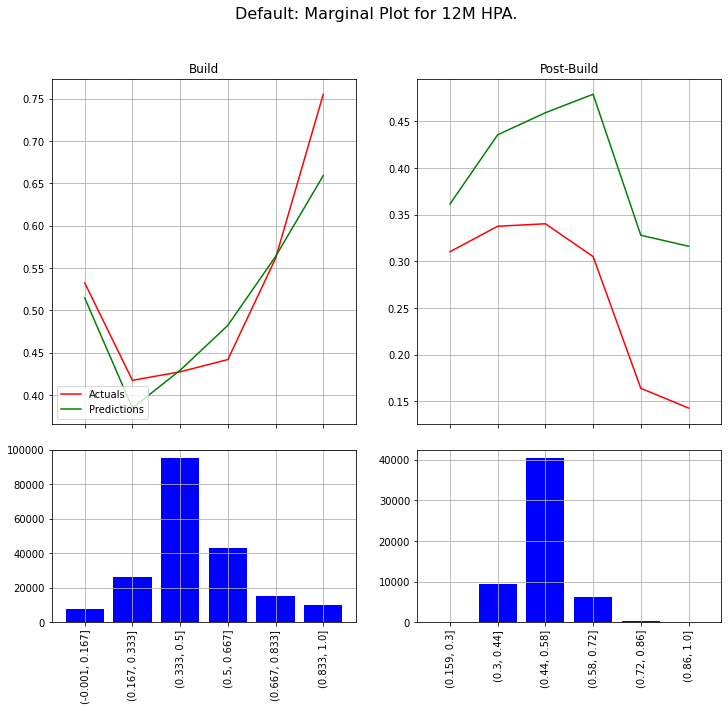

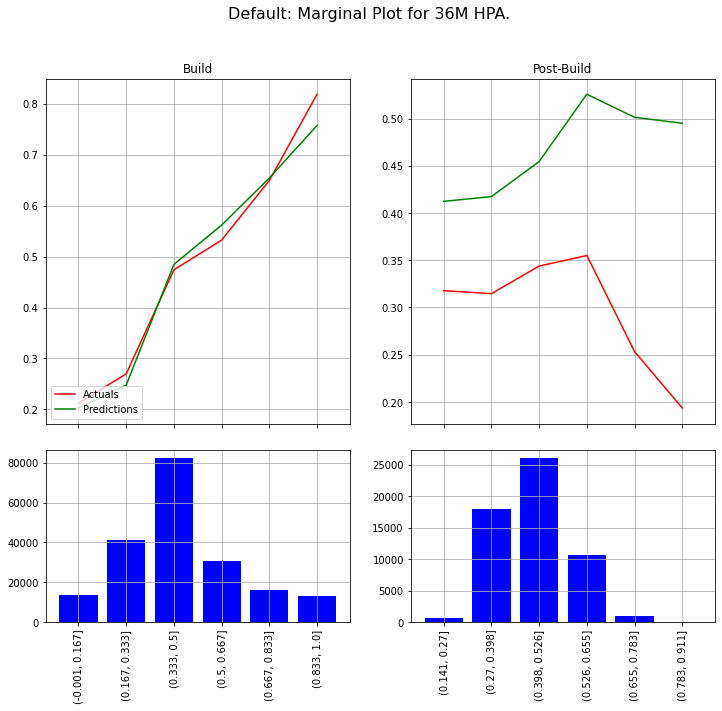

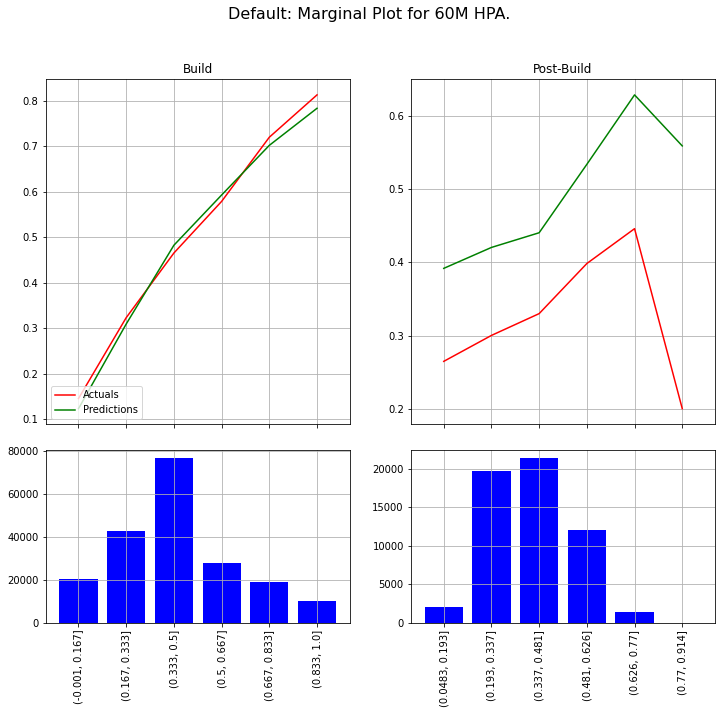

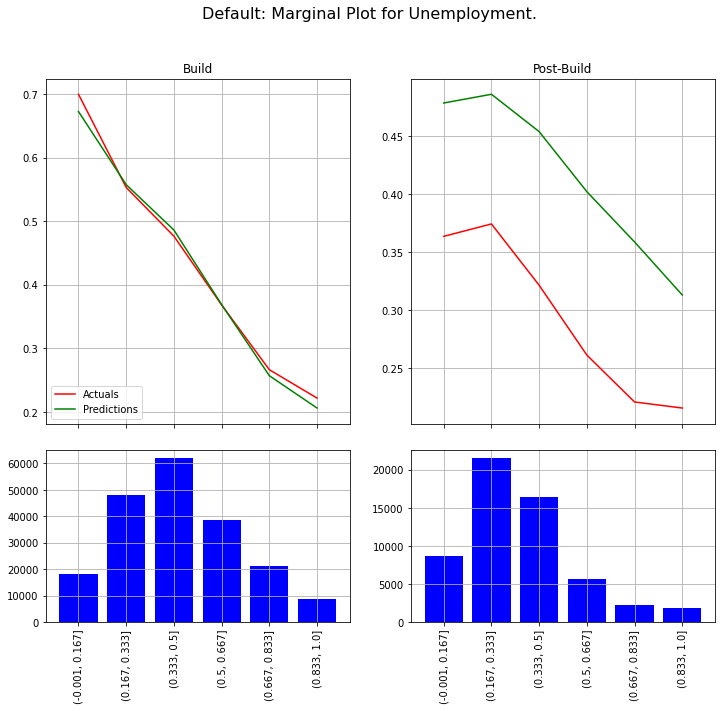

In [ ]:
for i,j in zip(x_var_list, x_var_name):
    marginal_plots(df_ins_4plot_loc,df_oot_4plot_loc,i,j,y_var,y_pred,bin_size)

## **XGBoost Model**

## Using Column Transformer without Scaler(For the graphs and XGB Model)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model4 = XGBClassifier()
pipeline4 = Pipeline(steps=[('selector', SelectKBest(chi2, k=16)), ('classifier', model4)])
param_grid = [
    {'classifier__n_estimators' : [10,20,30],
     'classifier__learning_rate' : [0.05,0.1,0.15],
     'classifier__max_depth' : [8,12,16],
     'classifier__min_child_weight' : [2,20],
     'classifier__gamma' : [0.05,0.5]
}]


In [ ]:
from sklearn.model_selection import KFold
cv_method = KFold(n_splits=4, shuffle=True)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
xgb_grid = GridSearchCV(estimator=pipeline4, param_grid=param_grid, cv=cv_method)

In [ ]:
xgb_grid.fit(X_train, y_train)

#print('Training Score:', xgb_grid.score(X_train, y_train))
#print('Testing Score:', xgb_grid.score(X_test, y_test))



GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('selector',
                                        SelectKBest(k=16,
                                                    score_func=<function chi2 at 0x7efd41dcbd30>)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=F...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid=[{'classifier__gamma': [0.05, 0.5],
                          'classifier__learning_rate': [0.05, 0.1, 0.15],
                          'classifier__max_depth': [8, 12, 16],
                          'classifier__min_child_weight': [2, 20],
                          'classifier__n_estimators': [10, 20, 30]}])

In [ ]:
xgb_grid.best_params_

{'classifier__gamma': 0.5,
 'classifier__learning_rate': 0.15,
 'classifier__max_depth': 12,
 'classifier__min_child_weight': 20,
 'classifier__n_estimators': 30}

In [ ]:
y_pred = xgb_grid.predict(X_test)
print(xgb_grid.best_score_)
print(accuracy_score(y_test, y_pred))

0.8169216176057373
0.7176764190516647


In [ ]:
print('Training Score:', xgb_grid.score(X_train, y_train))
print('Testing Score:', xgb_grid.score(X_test, y_test))

Training Score: 0.8435102698920534
Testing Score: 0.7176764190516647


Running the model with best Parameters:



In [ ]:
from xgboost import XGBClassifier
model2 = XGBClassifier(n_estimators=30, learning_rate=0.15, max_depth=12, gamma=0.5, alpha=0.01, min_child_weight=20, n_jobs=-1)
pipeline_xgb1 = Pipeline(steps=[('selector', SelectKBest(chi2, k=14)), ('classifier', model2)])
pipeline_xgb1.fit(X_train,y_train)
print('Training Score:', pipeline_xgb1.score(X_train, y_train))
print('Testing Score:', pipeline_xgb1.score(X_test, y_test))

Training Score: 0.8405644257632069
Testing Score: 0.7154816899414149


In [ ]:
from xgboost import XGBClassifier
model3 = XGBClassifier(n_estimators=30, learning_rate=0.15, max_depth=12, gamma=0.5, alpha=0.01, min_child_weight=20, n_jobs=-1)
pipeline_xgb3 = Pipeline(steps=[('classifier', model3)])
pipeline_xgb3.fit(X_train,y_train)
print('Training Score:', pipeline_xgb3.score(X_train, y_train))
print('Testing Score:', pipeline_xgb3.score(X_test, y_test))

Training Score: 0.8569972671084588
Testing Score: 0.7140126373918122


*Scores from Project 2 : *
* {'classifier__learning_rate': 0.15,
 'classifier__max_depth': 8,
 'classifier__n_estimators': 30}

 * xgb_grid.best_score_: 0.8131499722493127
 * accuracy_score: 0.7129746060259655

Model with best params;
* Training Score: 0.8265008988934748
* Testing Score: 0.7075458291885747

### Feature Importances for XGBoost

In [ ]:
a3 = pipeline_xgb1[:-1].get_feature_names_out()
df_xgb_results = pd.DataFrame(a3)

In [ ]:
pipeline_xgb1.steps[1][1]

XGBClassifier(alpha=0.01, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=-1, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
a4 = pipeline_xgb1.steps[1][1].feature_importances_
df_xgb_results2 = pd.DataFrame(a4)

In [ ]:
result_xgb = pd.concat([df_xgb_results, df_xgb_results2], axis = 1)

In [ ]:
result_xgb.columns=['feature_names','feature_importances']

In [ ]:
result_xgb.set_index('feature_names', inplace=True)


In [ ]:
result_xgb.sort_values('feature_importances', ascending=False)

feature_importances
feature_names                       
cscore_min                  0.204815
num_bo_1.0                  0.138403
loan_age                    0.130628
orig_term_cat_0             0.116999
orig_rate                   0.106524
orig_term_cat_3             0.078128
mi_type_1.0                 0.036571
num_bo_2.0                  0.036035
60M Change                  0.032401
dti                         0.029198
channel_B                   0.025289
36M Change                  0.023895
purpose_C                   0.021451
purpose_R                   0.019662

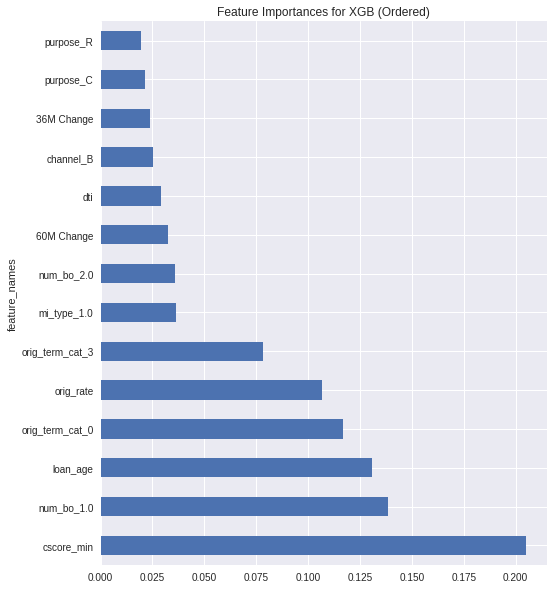

In [ ]:
plt.figure(figsize=(8,10))

result_xgb['feature_importances'].nlargest(16).plot(x='feature_names', y='feature_importances',  kind='barh',title = 'Feature Importances for XGB (Ordered)');

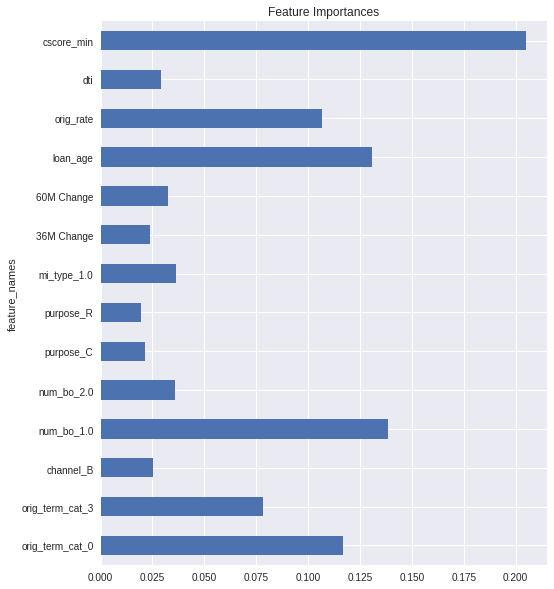

In [ ]:
plt.figure(figsize=(8,10))

result_xgb["feature_importances"].plot(x=result_xgb.index, y='feature_importances',  kind='barh',title = 'Feature Importances');

### Confusion Matrix and Classification Report

In [ ]:
y_pred_xgb1= pipeline_xgb1.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred_xgb1)

array([[36467,  1124],
       [14951,  3957]])

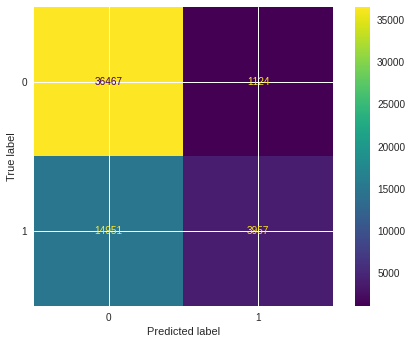

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipeline_xgb1, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_xgb1))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82     37591
           1       0.78      0.21      0.33     18908

    accuracy                           0.72     56499
   macro avg       0.74      0.59      0.57     56499
weighted avg       0.73      0.72      0.66     56499



### AUC-ROC Curve

In [ ]:
pred_prob2 = pipeline_xgb1.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1])

In [ ]:
random_probs = [0 for i in range(len(y_test))]
p2_fpr, p2_tpr, _ = roc_curve(y_test, random_probs)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score2 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score2)

0.819623061295099


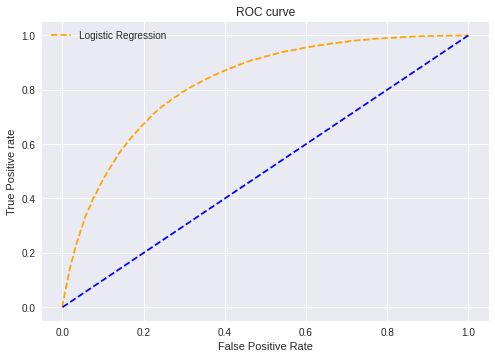

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p2_fpr, p2_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

### Default Graphs

In [ ]:
ypred = pd.DataFrame(model3.predict_proba(df_ins.values),columns=['predA','pred'])
df21 = pd.DataFrame(df_ins.values, columns =final_features)
df22 = pd.DataFrame(Y_ins.values, columns =['target'])
df23 = df5.drop(oot_index_names)
df_ins_4plot_xgb=pd.concat([df21,df22,df23[['Vintage']],ypred],axis=1)

In [ ]:
ypred_oot = pd.DataFrame(model3.predict_proba(df_oot.values),columns=['predA','pred'])
df21_oot = pd.DataFrame(df_oot.values, columns =final_features)
df22_oot = pd.DataFrame(Y_oot.values, columns =['target'])
df23_oot=df5.loc[oot_index_names] ## df_oot=df_model.loc[oot_index_names]
df_oot_4plot_xgb=pd.concat([df21_oot,df22_oot,df23_oot[['Vintage']],ypred_oot],axis=1)

In [ ]:
def marginal_plots(df_ins_4plot,df_oot_4plot,x_var,x_var_plot,y_var,y_pred,bin_size=6):
    fig = plt.figure(figsize=(12,10))
    fig.suptitle('Default: Marginal Plot for {}.'.format(x_var_plot), fontsize=16)
    gs = gridspec.GridSpec(2, 2, hspace=.1,height_ratios=[2, 1])


    # the first subplot for model performance along the feature of interest in-sample
    ax0 = plt.subplot(gs[0])

    s=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).mean() [y_var]
    line0, = ax0.plot(s.index.astype(str), s.values, color='r',label='line1')
    sp=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).mean() [y_pred]
    line1, = ax0.plot(sp.index.astype(str), sp.values, color='g',label='line2')
    plt.title("Build")

    # the second subplot for counts for that feature in-sample
    # shared axis X
    ax1 = plt.subplot(gs[2], sharex = ax0)
    ax0.grid()
    ax1.grid()



    t=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).count() [x_var]
    plt.setp(ax0.get_xticklabels(), visible=False)
    line2= ax1.bar(t.index.astype(str), t.values, color='b')
    plt.xticks(rotation = 90)
    # remove last tick label for the second subplot
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    # put legend on first subplot
    ax0.legend((line0, line1), ('Actuals', 'Predictions'), loc='lower left')


    # the third subplot for model performance along the feature of interest in holdout

    ax2 = plt.subplot(gs[1])
    # log scale for axis Y of the first subplot
    s=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).mean() [y_var]
    line4, = ax2.plot(s.index.astype(str), s.values, color='r',label='line1')
    sp=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).mean() [y_pred]+0.20
    line5, = ax2.plot(sp.index.astype(str), sp.values, color='g',label='line2')
    plt.title("Post-Build")

    # # the fourth subplot for counts for that feature in holdout
    # shared axis X
    ax3 = plt.subplot(gs[3], sharex = ax2)
    ax2.grid()
    ax3.grid()


    t=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).count() [x_var]
    plt.setp(ax2.get_xticklabels(), visible=False)
    line6= ax3.bar(t.index.astype(str), t.values, color='b')


    #plt.xticks(ax2.get_xticklabels(), [fmt(i) for i in x_sum], rotation=90)
    plt.xticks(rotation = 90)
    # remove last tick label for the second subplot
    yticks = ax3.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)

    plt.show()



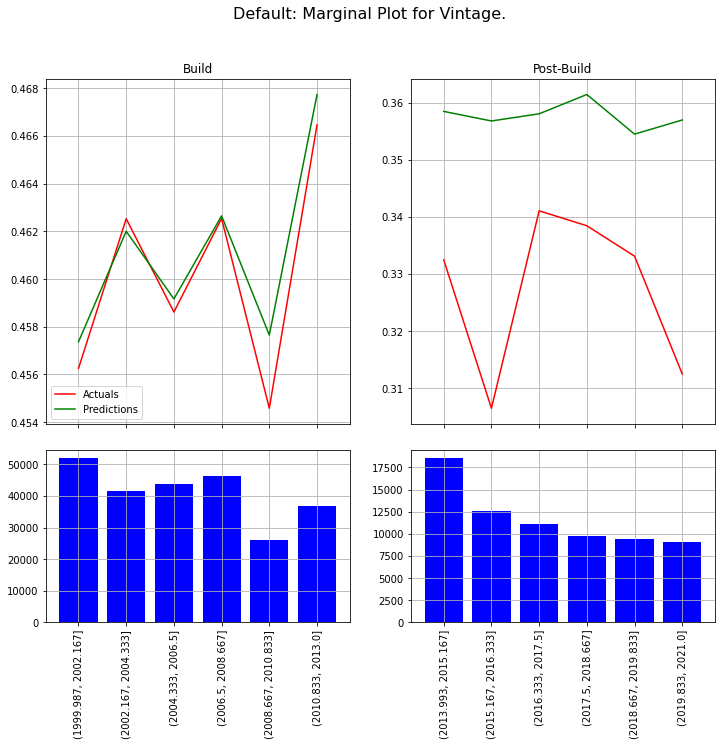

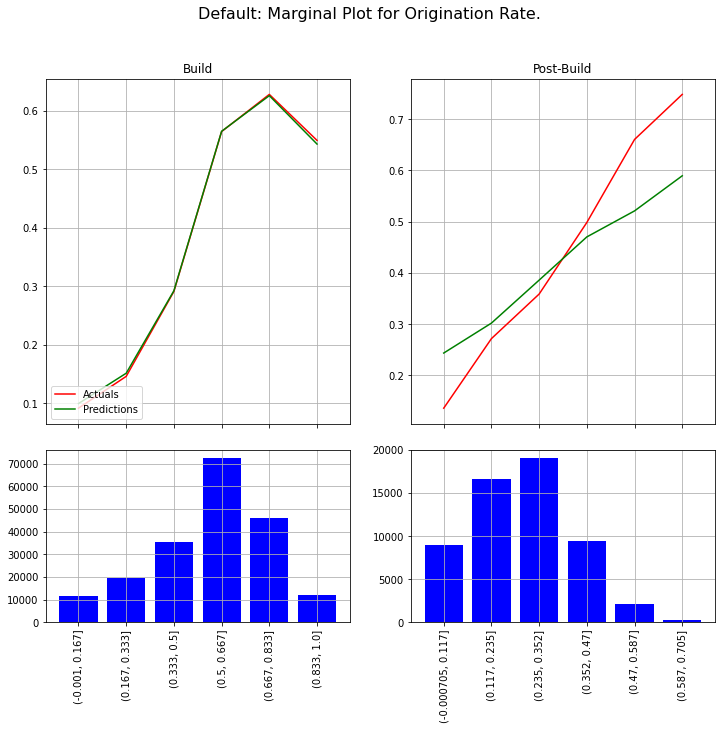

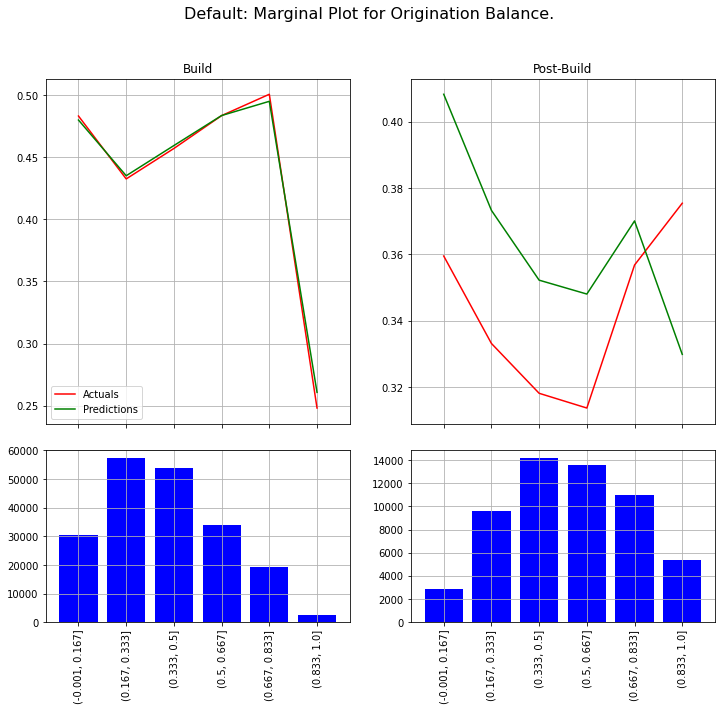

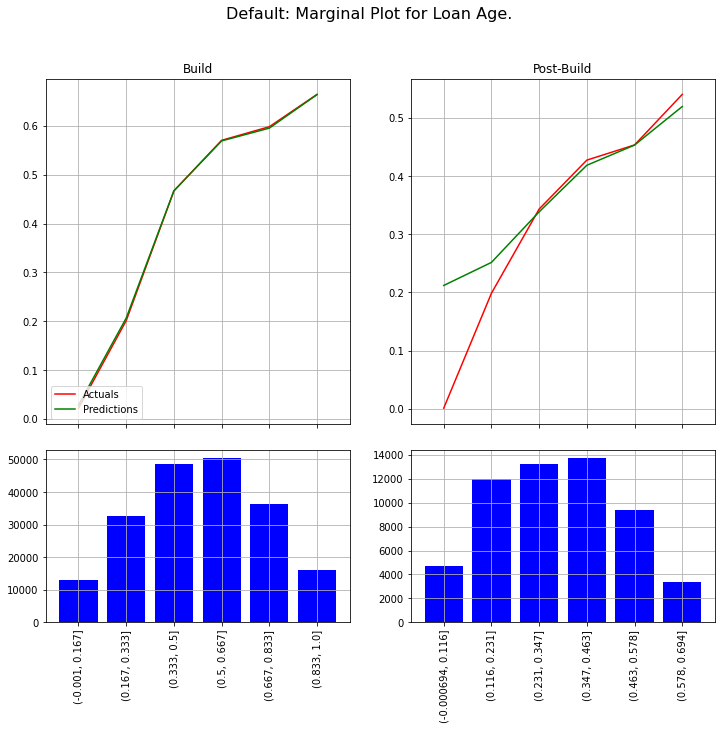

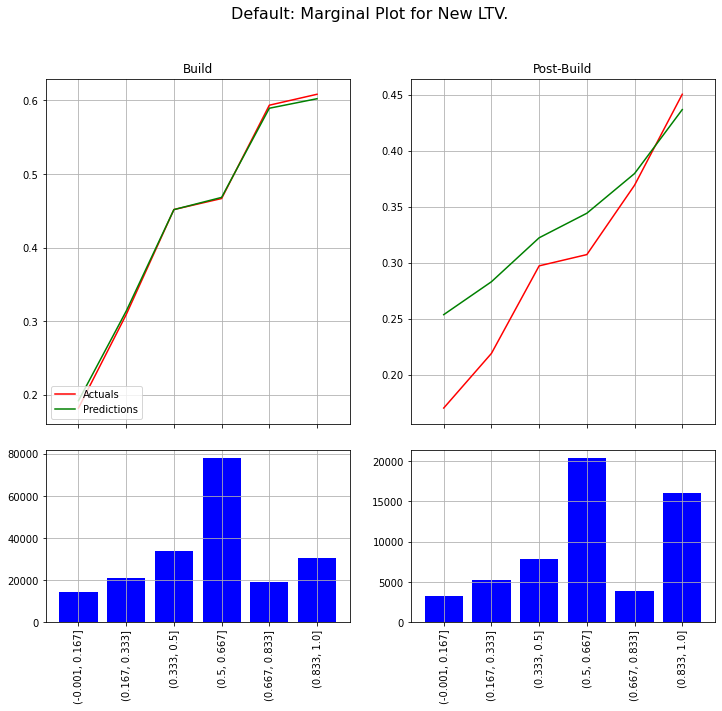

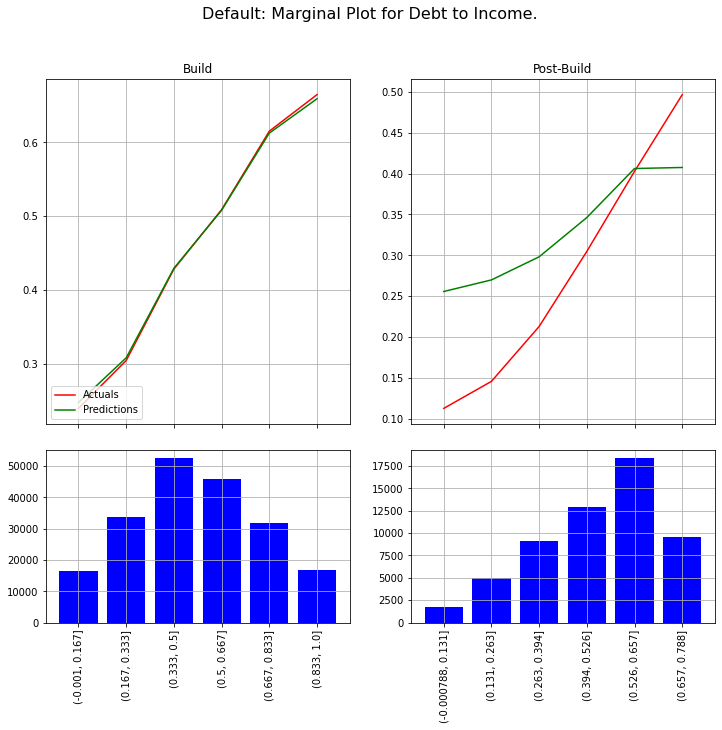

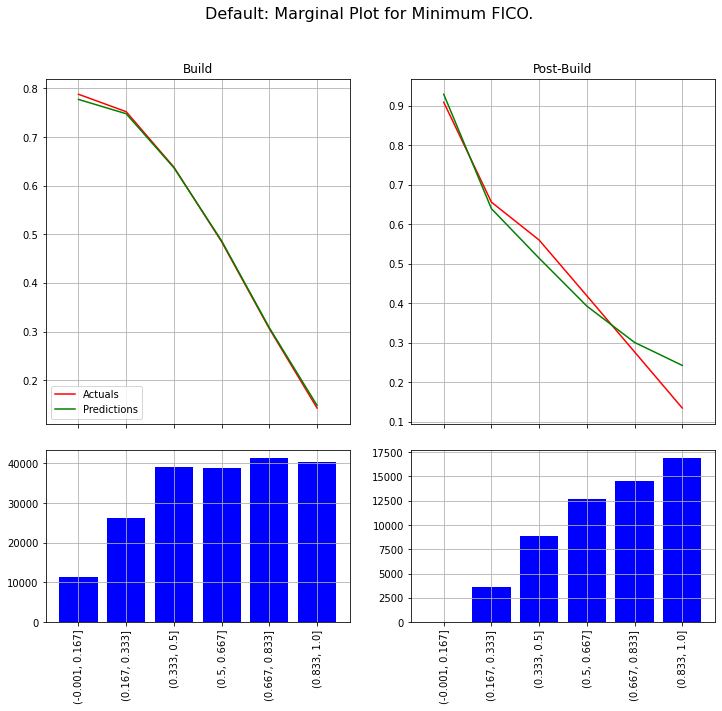

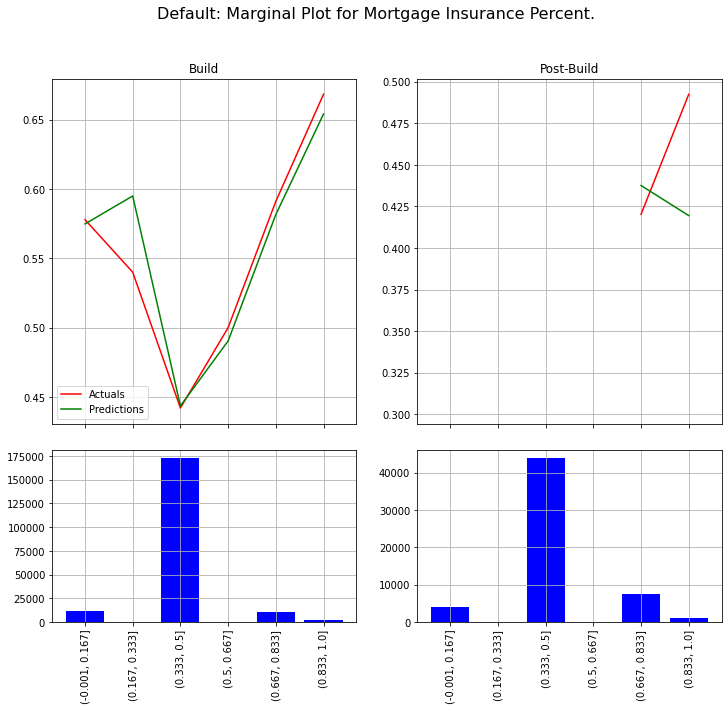

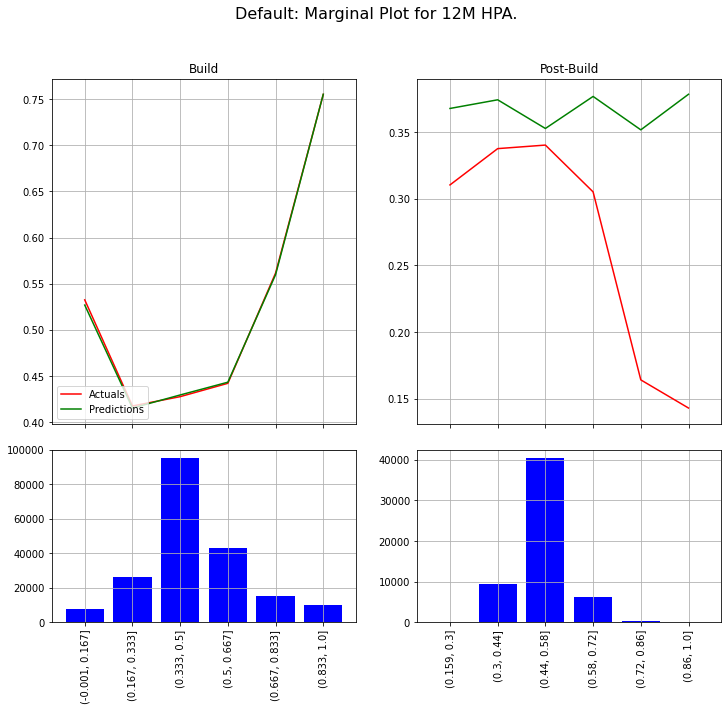

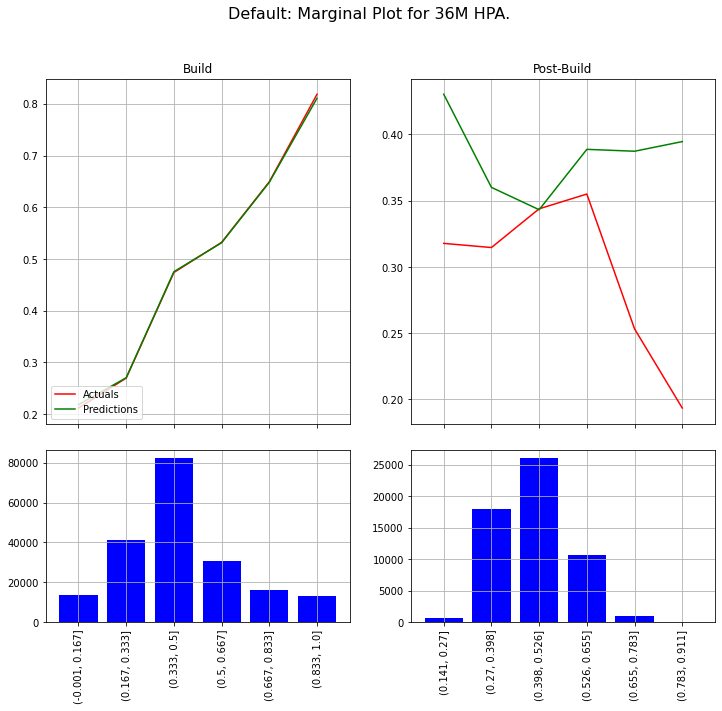

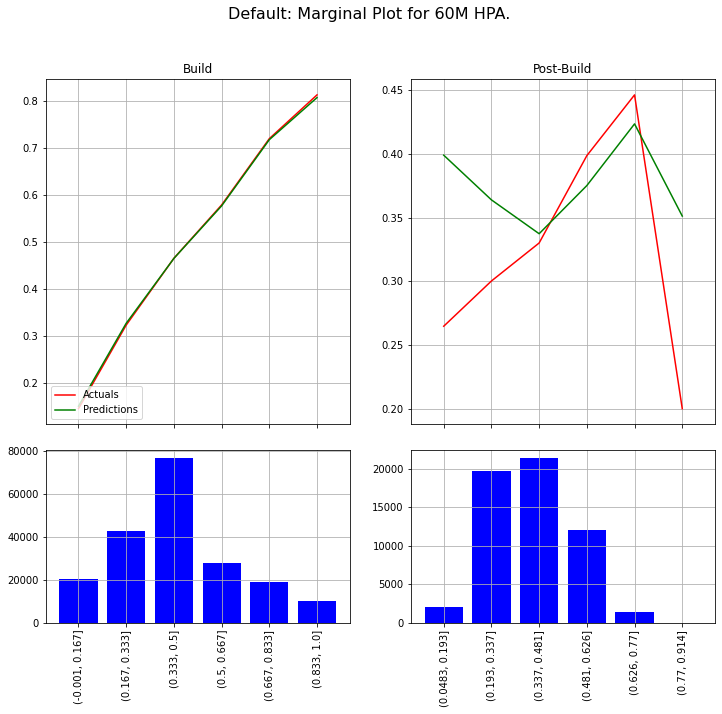

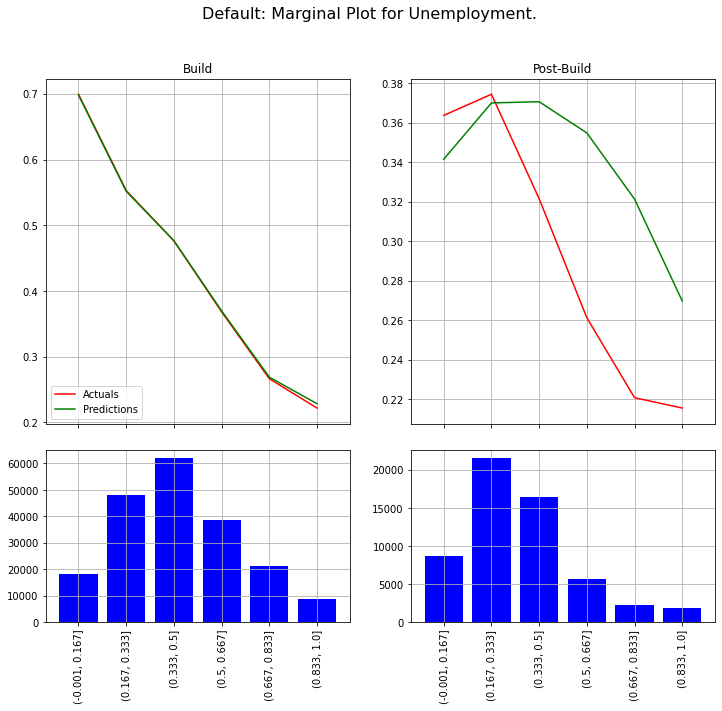

In [ ]:
for i,j in zip(x_var_list, x_var_name):
    marginal_plots(df_ins_4plot_xgb,df_oot_4plot_xgb,i,j,y_var,y_pred,bin_size)

## EXPLAINABILITY



### Installation of the Necessary Libraries

In [ ]:
! pip install pycebox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3641 sha256=9bf0354f80d8c88bfe5389b50cefa60195470a4177d166f8bc57f51a08bc606d
  Stored in directory: /root/.cache/pip/wheels/cf/59/51/a5fb9b5d2384586d5d2184028d412f6f6b7d5ff79c2b4c7838
Successfully built pycebox


In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 13.3 MB/s eta 0:00:00


In [ ]:
! pip install PyALE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install xgboost==1.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.4
    Uninstalling xgboost-1.7.4:
      Successfully uninstalled xgboost-1.7.4


In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=b68bbcfcf3625c00f9ab8be63f69c08c3e5f112a082333f862cc8c9d9081cf90
  Stored in directory: /root/.cache/pip/wheels/f2/5e/63/62e00a642415e064a55f53b5095ceb1420d24685125420d3ac
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp39-cp39-linux_x86_64.whl size=12060122 sha256=ae618dfad5738993c2b36f9224f3f63be70e1c0ed7761ecfbad1786a8ae624d1
  Stored in directory: /root/.cache/pip/wheels/25/d0/ab/05f776f079a53f4c6a12c98220910f4d0d245609b8c673a5ad
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2

In [ ]:
import os
import pickle
from datetime import datetime


#import joblib
import numpy as np
import pandas as pd
import xgboost as xgb
import yaml

from matplotlib import pyplot as plt


from xgboost import XGBClassifier, plot_importance

import shap
from PyALE import ale
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import random
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
driver = "DEFAULT"

### Load Model Object

In [ ]:
model_nv=  xgb.XGBClassifier()


In [ ]:
model_nv.fit(X_train,y_train)
pred = model_nv.predict(X_test)

In [ ]:
features_v =['orig_term_cat_0',
 'orig_term_cat_1',
 'orig_term_cat_2',
 'orig_term_cat_3',
 'channel_B',
 'channel_C',
 'channel_R',
 'num_bo_1.0',
 'num_bo_2.0',
 'num_bo_3.0',
 'num_bo_4.0',
 'num_bo_5.0',
 'num_bo_6.0',
 'num_bo_7.0',
 'first_flag_N',
 'first_flag_Y',
 'purpose_C',
 'purpose_P',
 'purpose_R',
 'purpose_U',
 'prop_CO',
 'prop_CP',
 'prop_MH',
 'prop_PU',
 'prop_SF',
 'no_units_1.0',
 'no_units_2.0',
 'no_units_3.0',
 'no_units_4.0',
 'occ_stat_I',
 'occ_stat_P',
 'occ_stat_S',
 'mi_type_0',
 'mi_type_1.0',
 'mi_type_2.0',
 'mi_type_3.0',
 'homeready_program_indicator_N',
 'homeready_program_indicator_Y',
 'relocation_mortgage_indicator_N',
 'relocation_mortgage_indicator_Y',
 'high_balance_loan_indicator_N',
 'high_balance_loan_indicator_Y',
 '12M Change',
 '36M Change',
 '60M Change',
 'value',
 'loan_age',
 'mi_pct',
 'orig_rate',
 'orig_upb',
 'new_ltv',
 'dti',
 'cscore_min']

In [ ]:
features_nv =['orig_term_cat_0',
 'orig_term_cat_1',
 'orig_term_cat_2',
 'orig_term_cat_3',
 'channel_B',
 'channel_C',
 'channel_R',
 'num_bo_1.0',
 'num_bo_2.0',
 'num_bo_3.0',
 'num_bo_4.0',
 'num_bo_5.0',
 'num_bo_6.0',
 'num_bo_7.0',
 'first_flag_N',
 'first_flag_Y',
 'purpose_C',
 'purpose_P',
 'purpose_R',
 'purpose_U',
 'prop_CO',
 'prop_CP',
 'prop_MH',
 'prop_PU',
 'prop_SF',
 'no_units_1.0',
 'no_units_2.0',
 'no_units_3.0',
 'no_units_4.0',
 'occ_stat_I',
 'occ_stat_P',
 'occ_stat_S',
 'mi_type_0',
 'mi_type_1.0',
 'mi_type_2.0',
 'mi_type_3.0',
 'homeready_program_indicator_N',
 'homeready_program_indicator_Y',
 'relocation_mortgage_indicator_N',
 'relocation_mortgage_indicator_Y',
 'high_balance_loan_indicator_N',
 'high_balance_loan_indicator_Y',
 '12M Change',
 '36M Change',
 '60M Change',
 'value',
 'loan_age',
 'mi_pct',
 'orig_rate',
 'orig_upb',
 'new_ltv',
 'dti',
 'cscore_min']

In [ ]:
ds_ins=X_train
ds_oot=X_test

In [ ]:
ds_ins.head(3)

orig_term_cat_0  orig_term_cat_1  orig_term_cat_2  orig_term_cat_3  \
234240                1                0                0                0   
110696                0                0                0                1   
55639                 0                0                0                1   

        channel_B  channel_C  channel_R  num_bo_1.0  num_bo_2.0  num_bo_3.0  \
234240          1          0          0           0           1           0   
110696          0          0          1           1           0           0   
55639           0          0          1           1           0           0   

        ...  36M Change_shap  60M Change_shap  value_shap  loan_age_shap  \
234240  ...        -0.058062        -0.032647    0.003995      -1.933219   
110696  ...        -0.052509         0.169439   -0.206446       0.759098   
55639   ...        -0.095132        -0.192462    0.000277       0.614900   

        mi_pct_shap  orig_rate_shap  orig_upb_shap  new_ltv_shap  dti_shap  \
234240    -0.004160        0.652515       0.621573     -1.059938 -0.319368   
110696    -0.012302       -0.236570      -0.156920      0.115028  0.275997   
55639     -0.013605        0.302759      -0.182569     -0.056807  0.164423   

        cscore_min_shap  
234240        -0.880485  
110696         0.850634  
55639          0.118633  

[3 rows x 106 columns]

In [ ]:
shap.initjs()

In [ ]:
X_sampled = X_train.sample(1000, random_state=10)

In [ ]:
explainer = shap.TreeExplainer(model_nv)
shap_values = explainer.shap_values(X_sampled)

In [ ]:
'''
shap.force_plot(explainer_nv.expected_value, ds_ins[shap_cols].values[100,:],feature_names=features_v)
'''

'\nshap.force_plot(explainer_nv.expected_value, ds_ins[shap_cols].values[100,:],feature_names=features_v)\n'

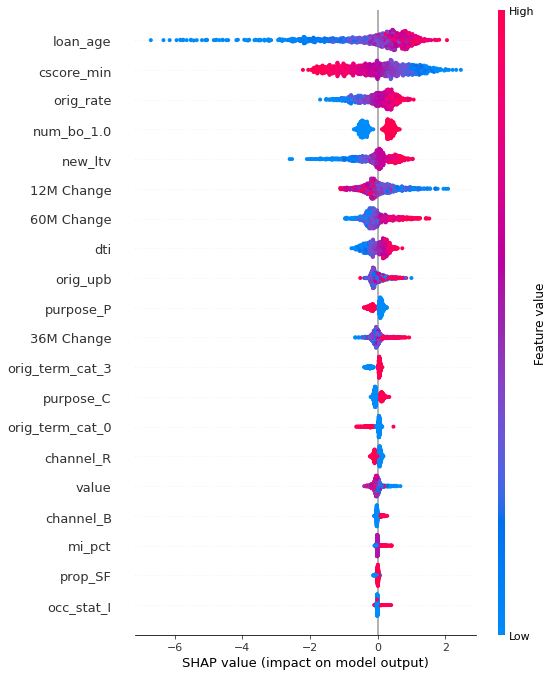

In [ ]:
shap.summary_plot(shap_values, X_sampled)

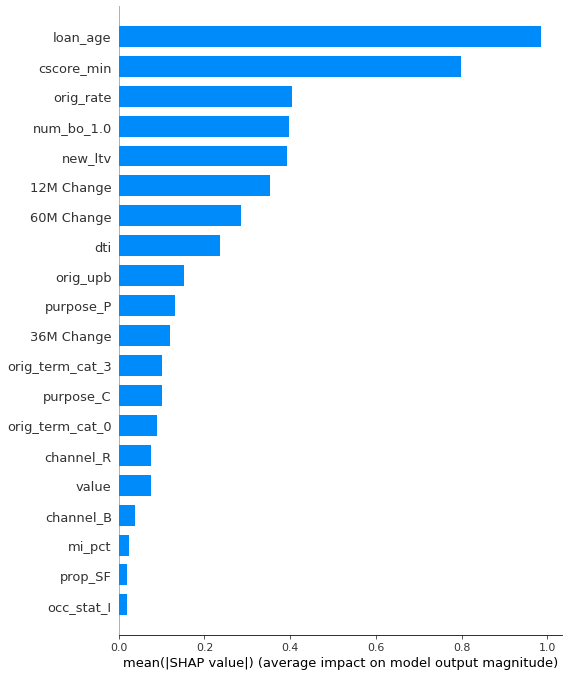

In [ ]:
shap.summary_plot(shap_values, X_sampled, plot_type="bar")

In [ ]:

print(f"base value for the target driver (average prediction): {explainer.expected_value}")


base value for the target driver (average prediction): -0.2133762389421463


In [ ]:
shap_values_ins_nv =  explainer.shap_values(ds_ins[features_nv], check_additivity = False  )
shap_values_oot_nv =  explainer.shap_values(ds_oot[features_nv], check_additivity = False  )

In [ ]:
## Merge shap values with the original dataframe and save the dataframe

for i, col in enumerate(features_nv):
  ds_ins[col+'_shap'] = shap_values_ins_nv[:,i]


for i, col in enumerate(features_nv):
  ds_oot[col+'_shap'] = shap_values_oot_nv[:,i]


In [ ]:
ds_ins.head(3)

orig_term_cat_0  orig_term_cat_1  orig_term_cat_2  orig_term_cat_3  \
234240                1                0                0                0   
110696                0                0                0                1   
55639                 0                0                0                1   

        channel_B  channel_C  channel_R  num_bo_1.0  num_bo_2.0  num_bo_3.0  \
234240          1          0          0           0           1           0   
110696          0          0          1           1           0           0   
55639           0          0          1           1           0           0   

        ...  36M Change_shap  60M Change_shap  value_shap  loan_age_shap  \
234240  ...        -0.058062        -0.032647    0.003995      -1.933219   
110696  ...        -0.052509         0.169439   -0.206446       0.759098   
55639   ...        -0.095132        -0.192462    0.000277       0.614900   

        mi_pct_shap  orig_rate_shap  orig_upb_shap  new_ltv_shap  dti_shap  \
234240    -0.004160        0.652515       0.621573     -1.059938 -0.319368   
110696    -0.012302       -0.236570      -0.156920      0.115028  0.275997   
55639     -0.013605        0.302759      -0.182569     -0.056807  0.164423   

        cscore_min_shap  
234240        -0.880485  
110696         0.850634  
55639          0.118633  

[3 rows x 106 columns]

In [ ]:
sv_ins=pd.DataFrame()
for i, col in enumerate(features_nv):
  sv_ins[col] = ds_ins[col+'_shap']

sv_oot=pd.DataFrame()
for i, col in enumerate(features_nv):
  sv_oot[col] =ds_oot[col+'_shap']

In [ ]:
shap_cols = [col for col in ds_ins.columns if '_shap' in col]

In [ ]:
shap_cols

['orig_term_cat_0_shap',
 'orig_term_cat_1_shap',
 'orig_term_cat_2_shap',
 'orig_term_cat_3_shap',
 'channel_B_shap',
 'channel_C_shap',
 'channel_R_shap',
 'num_bo_1.0_shap',
 'num_bo_2.0_shap',
 'num_bo_3.0_shap',
 'num_bo_4.0_shap',
 'num_bo_5.0_shap',
 'num_bo_6.0_shap',
 'num_bo_7.0_shap',
 'first_flag_N_shap',
 'first_flag_Y_shap',
 'purpose_C_shap',
 'purpose_P_shap',
 'purpose_R_shap',
 'purpose_U_shap',
 'prop_CO_shap',
 'prop_CP_shap',
 'prop_MH_shap',
 'prop_PU_shap',
 'prop_SF_shap',
 'no_units_1.0_shap',
 'no_units_2.0_shap',
 'no_units_3.0_shap',
 'no_units_4.0_shap',
 'occ_stat_I_shap',
 'occ_stat_P_shap',
 'occ_stat_S_shap',
 'mi_type_0_shap',
 'mi_type_1.0_shap',
 'mi_type_2.0_shap',
 'mi_type_3.0_shap',
 'homeready_program_indicator_N_shap',
 'homeready_program_indicator_Y_shap',
 'relocation_mortgage_indicator_N_shap',
 'relocation_mortgage_indicator_Y_shap',
 'high_balance_loan_indicator_N_shap',
 'high_balance_loan_indicator_Y_shap',
 '12M Change_shap',
 '36M Chan

### Shap Values for 3 Observations

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, ds_ins[shap_cols].values[102,:],feature_names=features_v)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, ds_ins[shap_cols].values[103,:],feature_names=features_v)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, ds_ins[shap_cols].values[105,:],feature_names=features_v)

### Setting the Important Features in terms of Shap Values

In [ ]:
def get_imp_features(df, features, shap_values, n=12):
  vals = np.abs(shap_values).mean (0)
  feature_importance = pd.DataFrame(
    list(zip(df[features].columns, vals)),
    columns=["col_name", "feature_importance_vals"],
  )
  feature_importance.sort_values(
  by=[ "feature_importance_vals"], ascending=False, inplace=True
  )
  return list (feature_importance.head(n) ["col_name"])

In [ ]:
ins_imp_features = get_imp_features(ds_ins[features_nv],
                                                features_nv,
                                                 sv_ins,
                                                  n=12)
oot_imp_features = get_imp_features(ds_oot[features_nv],
                                               features_nv,
                                               sv_oot,
                                               n=12)

In [ ]:
ins_imp_features #The first 12 important features for In sample Data

['loan_age',
 'cscore_min',
 'orig_rate',
 'num_bo_1.0',
 'new_ltv',
 '12M Change',
 '60M Change',
 'dti',
 'orig_upb',
 '36M Change',
 'purpose_P',
 'orig_term_cat_3']

In [ ]:
oot_imp_features #The first 12 important features for Out of Time Data

['loan_age',
 'cscore_min',
 'orig_rate',
 'num_bo_1.0',
 'new_ltv',
 '12M Change',
 'dti',
 '60M Change',
 'orig_upb',
 'purpose_P',
 '36M Change',
 'orig_term_cat_3']

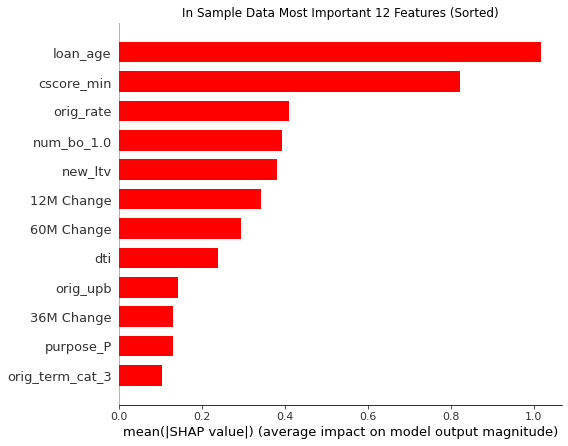

In [ ]:
# Important features of in-sample
shap.summary_plot(ds_ins[ shap_cols].values,
                  ds_ins[ features_nv],
                  plot_type="bar",
                  max_display=12,color='red',
                  feature_names=features_nv,
                 show=False)
plt.title("In Sample Data Most Important 12 Features (Sorted)")
plt.tight_layout()


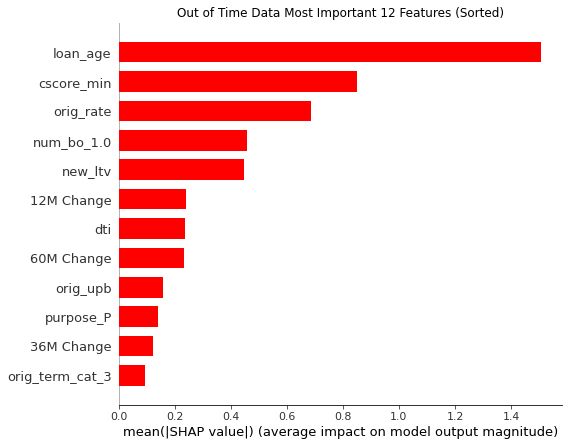

In [ ]:
shap.summary_plot(ds_oot[shap_cols].values,
                  ds_oot[features_nv],
                  plot_type="bar",
                  max_display=12,color='red',
                  feature_names=features_nv,
                  show=False)
plt.title( 'Out of Time Data Most Important 12 Features (Sorted)')
plt.tight_layout()

In [ ]:
def write_sorted_output (df, column_name, output):
  df.columns = [column_name]
  df.sort_values (by=column_name, ascending=False, inplace=True)
  df[ "% of sum"] =df[column_name] / df[column_name].sum ()
  df.to_csv(output)

In [ ]:
write_sorted_output (pd.DataFrame(sv_oot[oot_imp_features].abs().mean()),
                                   column_name= 'avg_abs_shap',
                                   output='mean_SHAP_oot.csv')

### Ordering the Features in terms of Total Gain and Average Gain

In [ ]:
def feat_importance(
model, feature_names,importance_type,  output, column_name=None, ax=None,  **kwargs
):

  if not column_name:
    column_name = importance_type

  mod= model if isinstance(model, xgb.Booster) else model.get_booster()


  gain =mod.get_score(importance_type = importance_type)

  write_sorted_output(
    pd.DataFrame.from_dict(gain, orient="index"),
    column_name=column_name,
    output=output,
  )
  if not ax:
    fig, ax = plt.subplots (figsize=kwargs.get ("figsize", (10,10)))
    ax.spines["top"].set_visible (False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["left"].set_visible(True)

    xgb.plot_importance(
      gain,
      ax=ax,
      importance_type=importance_type,
      max_num_features=15,
      title=column_name,
      grid=False,
      ylabel=None,
      color=kwargs.get("color", "Gray"),
    )
    return ax

<Axes: title={'center': 'Total Gain for XGB (Sorted)'}, xlabel='F score'>

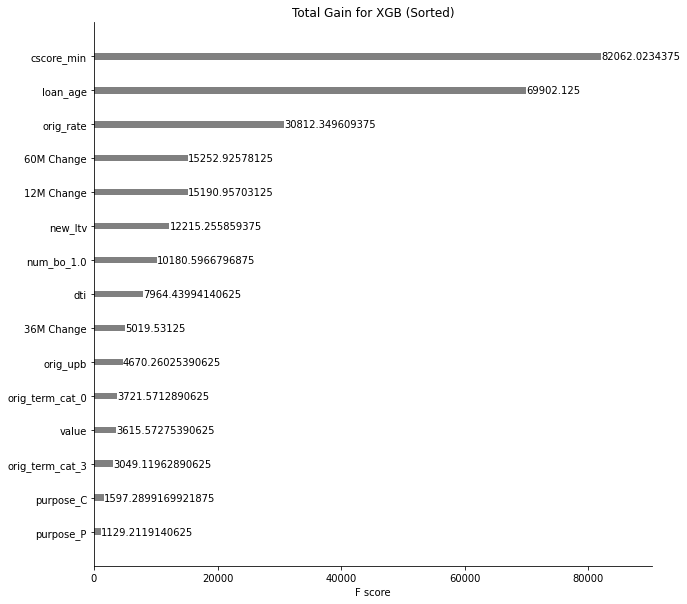

In [ ]:
feat_importance(model_nv,features_nv,
                           importance_type='total_gain',
                           output=os.path.join('total_gain.csv'),
                          column_name='Total Gain for XGB (Sorted)',
                           title='Total Gain for XGB (Sorted)',
                           color='Gray',
                           )

<Axes: title={'center': 'Average Gain for XGB (Sorted)'}, xlabel='F score'>

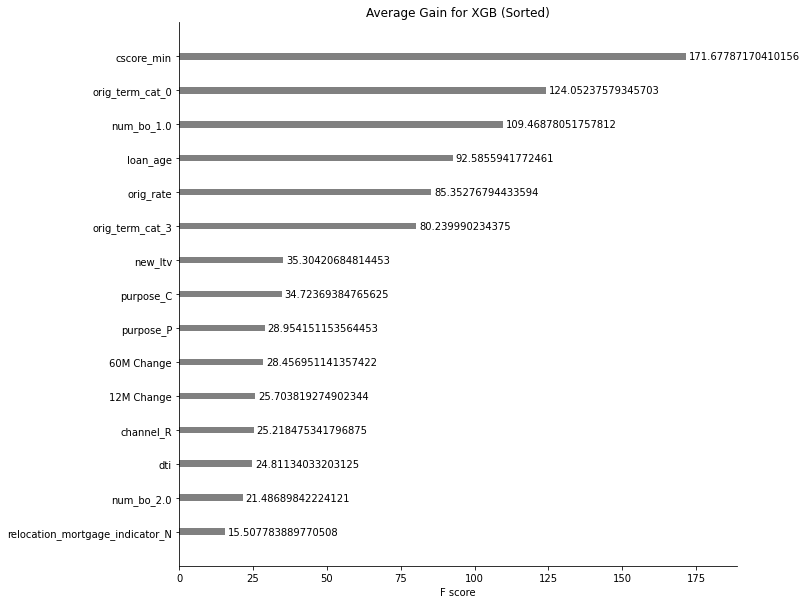

In [ ]:
feat_importance(model_nv,features_nv,
                            importance_type='gain',
                            output=os.path.join( 'avg gain.csv'),
                            column_name='Average Gain for XGB (Sorted)',
                            title='Avg Gain',
                            color='Gray')

### Shap Summary Plot

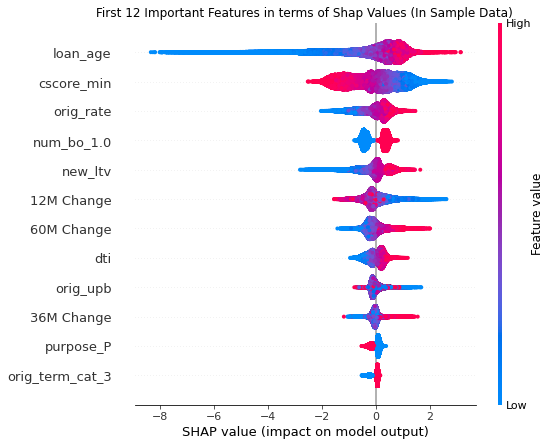

In [ ]:
# Important features of In Sample Data
plt.figure(figsize=(12,12))
shap.summary_plot(ds_ins[shap_cols].values,
                  ds_ins[features_nv],
                  max_display=12,
                  feature_names=features_nv,

                  show=False)
plt.title("First 12 Important Features in terms of Shap Values (In Sample Data) ")
plt.tight_layout()


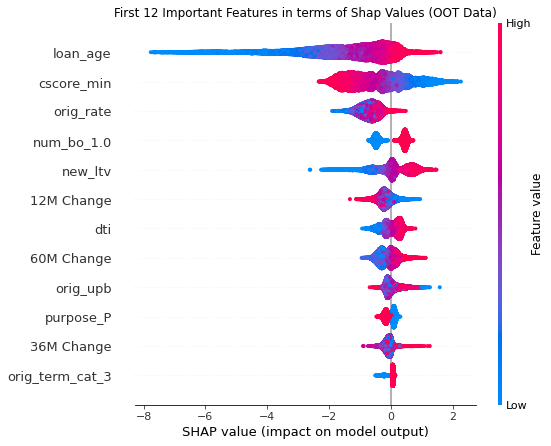

In [ ]:
# Important Features of Out of Time
shap.summary_plot(ds_oot[shap_cols].values,
                  ds_oot[features_nv],
                  max_display=12,
                  feature_names=features_nv,
                  show=False)
plt.title("First 12 Important Features in terms of Shap Values (OOT Data)")
plt.tight_layout()

### Impact of Some Features on Default Rates

In [ ]:
def get_mean_per_bin(df, grp_var, ret_var, nbins):
  ds_new=df.copy()
  ds_new[grp_var+"_group"], bins=pd.cut (ds_new[grp_var], nbins, labels=False, retbins=True,right=False)
  ds_new[grp_var +"_group"] += 1.0

  bin_midpoints = pd.DataFrame (pd.Series(bins).rolling(2).mean().iloc[1:])
  bin_midpoints.columns = [grp_var +"_midpt"]
  bin_midpoints[grp_var + "_group"]=list (range (1, nbins + 1))

  _df=ds_new.merge (bin_midpoints, left_on=grp_var + "_group", right_on=grp_var +"_group")

  return(
      _df[[grp_var +"_midpt", ret_var]].groupby (grp_var + "_midpt").mean()[ret_var])


In [ ]:
def plot_shap(f, df, driver, explainer, kind="bar", ax=None,
**kwargs):


  if not ax:
    fig, ax =plt.subplots (figsize=(10,10) )

  _=ax.axhline(
    y=0,
    color="black",
    linestyle="-",
    label=kwargs.get(
    "hline_label", "Avg. Prediction={:.1f}".format (explainer.expected_value)
    ) ,
    )
  ax.scatter(
    df[f],
    df [f +"_shap"],
    label="SHAP values",
    s=6,
    color='turquoise',
    alpha=0.01,
  )
  if kind== "bar":
    grp_plt = df[[f,f + "_shap"]].groupby(f) .mean () [f + "_shap"]
    ax.bar(
       grp_plt.index,
       grp_plt,
       label="Avg. SHAP values",
       width=1,
       color="gray",
    )


  elif kind == "line":
    grp_plt = get_mean_per_bin(df, f, f + "_shap",
  nbins=kwargs.get ("nbins", 10))
    ax.plot(grp_plt, label="Avg. SHAP values",

color=kwargs.get("color", "brown"))
  else:
    raise Exception(f"{kind} not recognized. Should be one of['bar', line ]")

  ax.set_xlabel(f)
  ax.set_ylabel("Impact on "+ driver + "\n(deviation from | avg. pred)")

# set full alpha for scatter plot marker in legend.

  leg = ax.legend ()
  for lh in leg.legendHandles:
      lh.set_alpha (1)

  return ax

In [ ]:
def plot_shap_test_train(ins_df, oot_df, explainer, nbins=10, kind='line', **kwargs,):
    fig, axes = plt.subplots(2, sharex=True, figsize=(8, 10))

    plot_shap(f,
                      ins_df,
                      driver,
                      nbins=nbins,
                      explainer=explainer,
                      ax=axes[0],
                      alpha=0.05,
                      kind=kind,
                      **kwargs)
    plot_shap(f,
                      oot_df,
                      driver,
                      nbins=nbins,
                      explainer=explainer,
                      ax=axes[1],
                      alpha=0.05,
                      kind=kind,
                      **kwargs)
    _ = axes[0].set_title('In Sample')
    _ = axes[1].set_title('Out of Sample')
    plt.tight_layout()
    if kwargs.get('output'):
       plt.savefig(kwargs.get( 'output' ))

CPU times: user 2.32 s, sys: 292 ms, total: 2.61 s
Wall time: 2.33 s


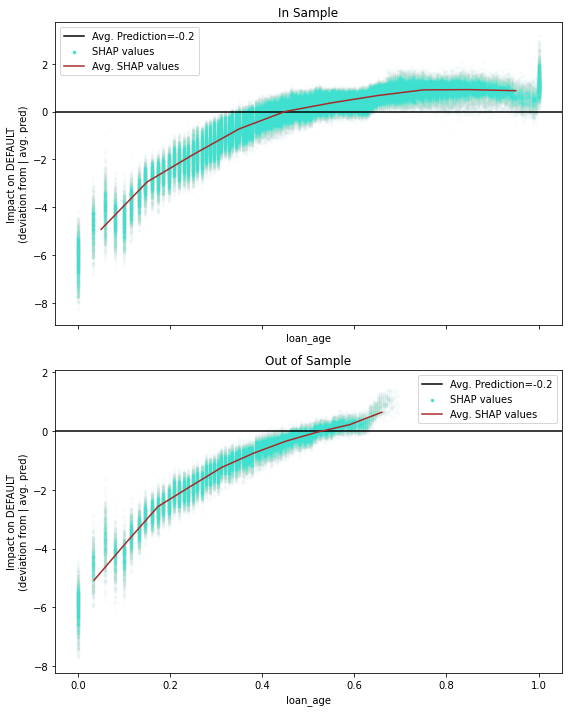

In [ ]:
%%time
f='loan_age'


plot_shap_test_train(ds_ins,
                      ds_oot,
                      explainer,
                      nbins=10,
                      kind='line',

                      output=os.path.join('shap_v_{}.png'.format(f)),
                      )

CPU times: user 1.98 s, sys: 302 ms, total: 2.28 s
Wall time: 2 s


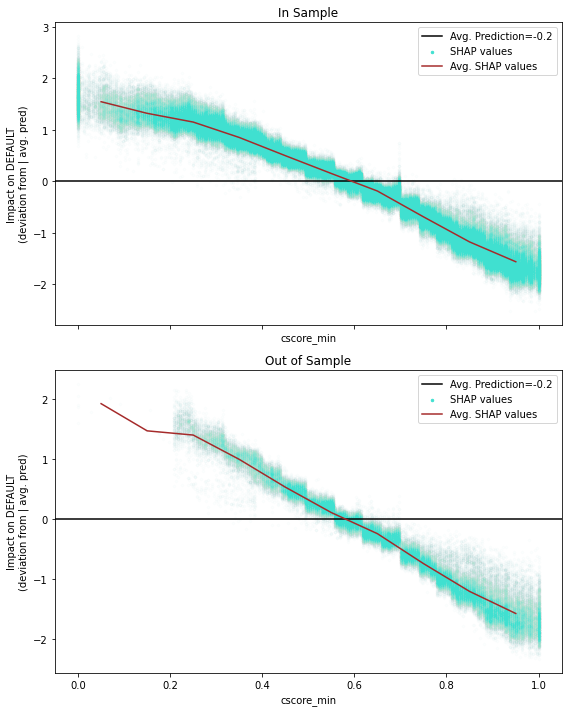

In [ ]:
%%time
f='cscore_min'


plot_shap_test_train(ds_ins,
                    ds_oot,
                    explainer,
                    nbins=10,
                    kind='line',
                    output=os.path.join( 'shap_{}.png'.format(f)))

CPU times: user 2.72 s, sys: 326 ms, total: 3.05 s
Wall time: 2.74 s


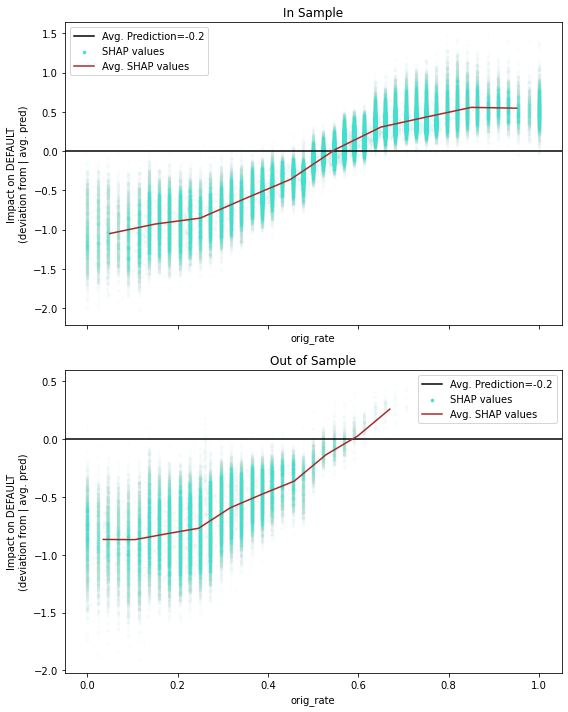

In [ ]:
%%time
f='orig_rate'


plot_shap_test_train(ds_ins,
                    ds_oot,
                    explainer,
                    nbins=10,
                    kind='line',
                    output=os.path.join( 'shap_{}.png'.format(f)))

CPU times: user 3.65 s, sys: 165 ms, total: 3.81 s
Wall time: 3.81 s


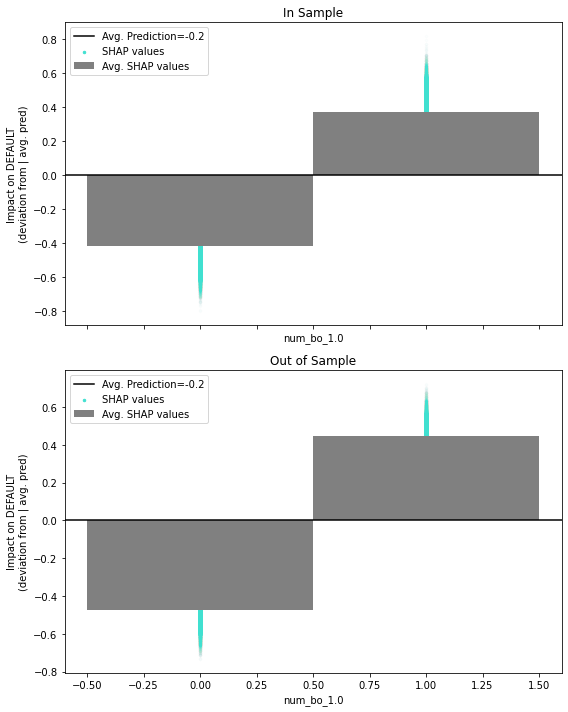

In [ ]:
%%time
f='num_bo_1.0'


plot_shap_test_train(ds_ins,
                    ds_oot,
                    explainer,
                    nbins=10,
                    kind='bar',
                    output=os.path.join( 'shap_{}.png'.format(f)))

CPU times: user 2.49 s, sys: 296 ms, total: 2.78 s
Wall time: 2.49 s


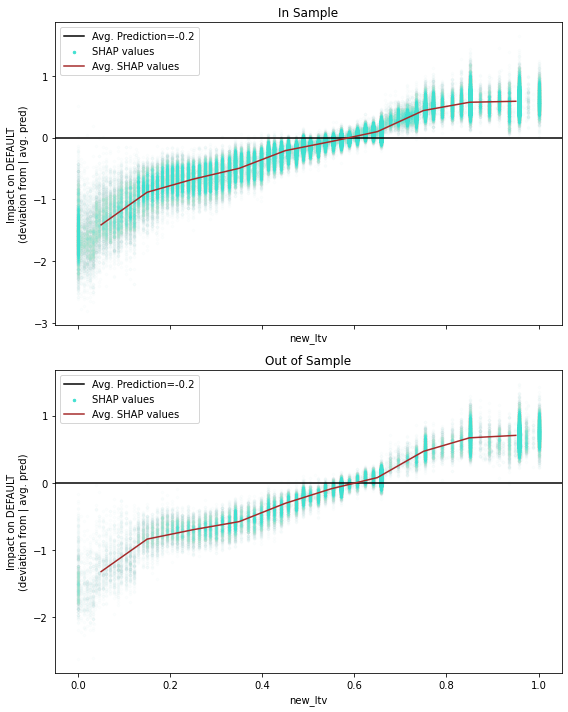

In [ ]:
%%time
f='new_ltv'


plot_shap_test_train(ds_ins,
                    ds_oot,
                    explainer,
                    nbins=10,
                    kind='line',
                    output=os.path.join( 'shap_{}.png'.format(f)))

CPU times: user 1.91 s, sys: 294 ms, total: 2.21 s
Wall time: 1.92 s


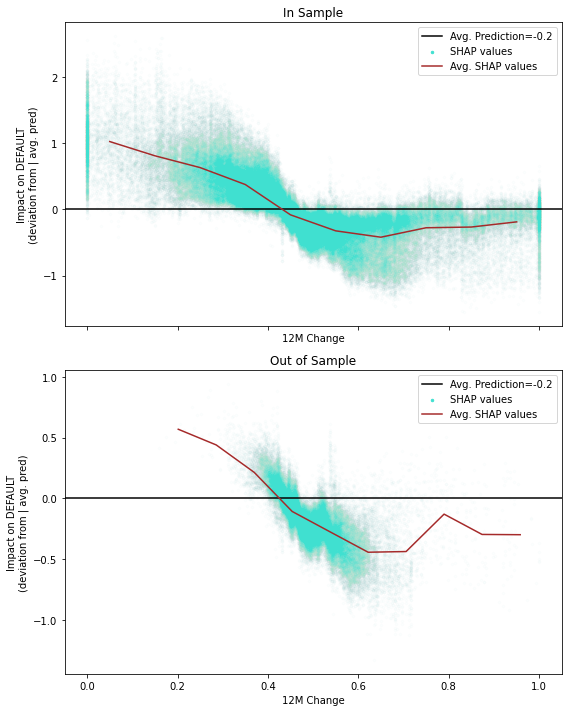

In [ ]:
%%time
f= '12M Change'
plot_shap_test_train(ds_ins,
                    ds_oot,
                    explainer,
                    nbins=10,
                    kind='line',
                    output=os.path.join( 'shap_nv_{}.png'.format(f)),
)

CPU times: user 3.78 s, sys: 170 ms, total: 3.95 s
Wall time: 3.99 s


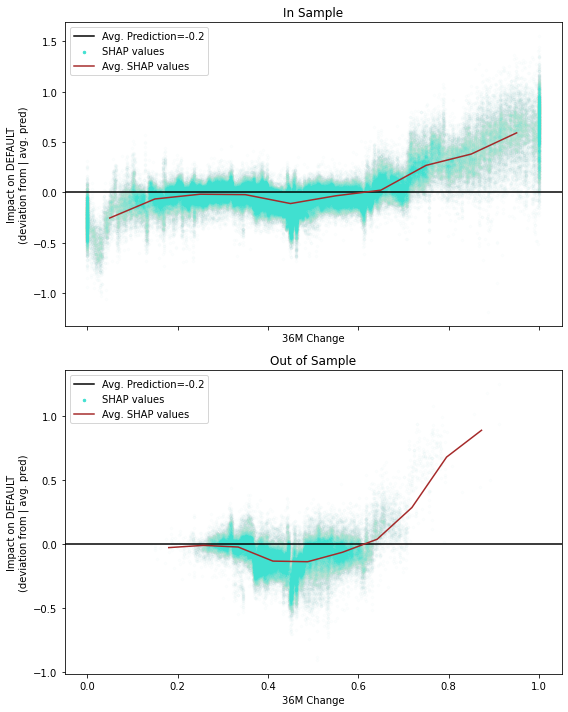

In [ ]:
%%time
f='36M Change'


plot_shap_test_train(ds_ins,
                    ds_oot,
                    explainer,
                    nbins=10,
                    kind='line',
                    output=os.path.join( 'shap_{}.png'.format(f)))

CPU times: user 2.44 s, sys: 280 ms, total: 2.72 s
Wall time: 2.48 s


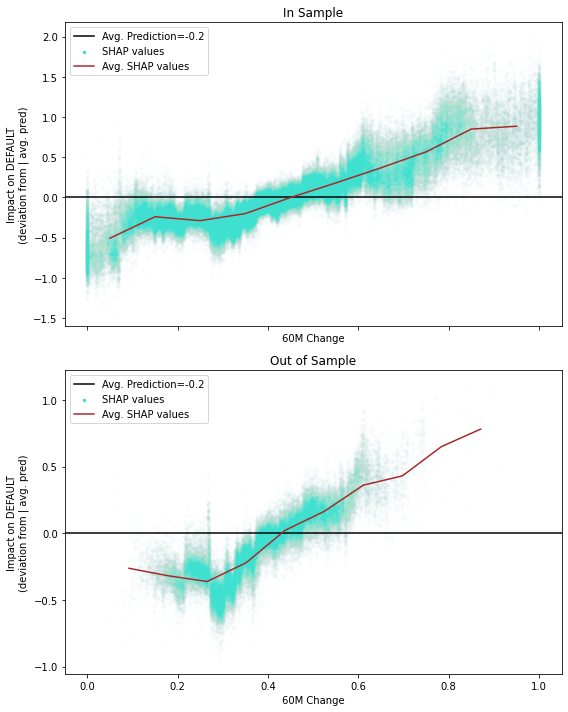

In [ ]:
%%time
f='60M Change'


plot_shap_test_train(ds_ins,
                    ds_oot,
                    explainer,
                    nbins=10,
                    kind='line',
                    output=os.path.join( 'shap_{}.png'.format(f)))

CPU times: user 2.4 s, sys: 284 ms, total: 2.68 s
Wall time: 2.38 s


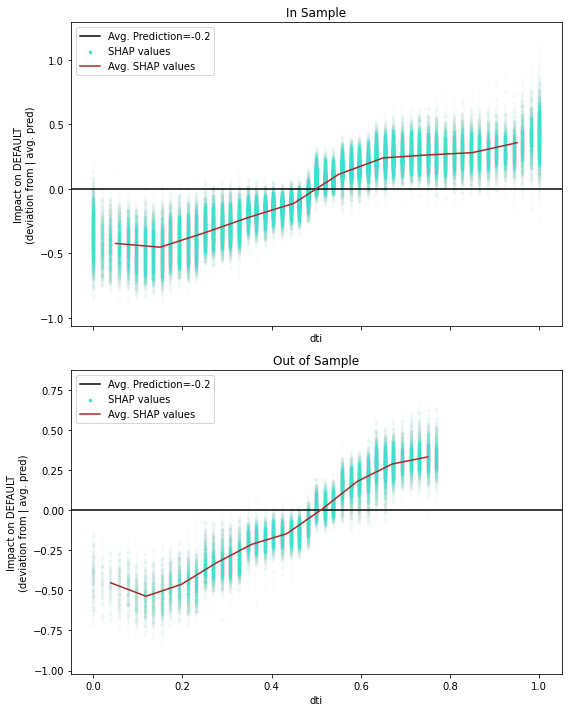

In [ ]:
%%time
f='dti'


plot_shap_test_train(ds_ins,
                    ds_oot,
                    explainer,
                    nbins=10,
                    kind='line',
                    output=os.path.join( 'shap_{}.png'.format(f)))

## Feature Interactions

### Rank feature interactions: H-stats

H = 2 * (precision * recall) / (precision + recall)

In [ ]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PDPbox-0.2.1.tar.gz (34.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758223 sha256=d69a0473e436a942d53a3d351387f1969f9309e1061f75d042fef6ca16341369
  Stored in directory: /root/.cache/pip/wheels/f2/5e/63/62e00a642415e064a55f53b5095ceb1420d24685125420d3ac
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp39-cp39-linux_x86_64.whl size=12060227 sha256=706a2c28396c63f91890ce89ff3f8b5cbf05db183940a1726f1bee24a7f4f59d
  Stored in directory: /root/.cache/pip/wheels/25/d0/ab/05f776f079a53f4c6a12c98220910f4d0d245609b8c673a5ad
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=afb4fa1

In [ ]:
from pdpbox.pdp_calc_utils import _calc_ice_lines_inter
#from pdpbox.pdp import pdp_isolate, PDPInteract
from pdpbox.utils import (_check_model, _check_dataset, _check_percentile_range, _check_feature,
                    _check_grid_type, _check_memory_limit, _make_list,
                    _calc_memory_usage, _get_grids, _get_grid_combos, _check_classes)
from joblib import Parallel, delayed

In [ ]:
def pdp_multi_interact(model, dataset, model_features, features,
                    num_grid_points=None, grid_types=None, percentile_ranges=None, grid_ranges=None, cust_grid_points=None,
                    cust_grid_combos=None, use_custom_grid_combos=False,
                    memory_limit=0.5, n_jobs=1, predict_kwds=None, data_transformer=None):

    def _expand_default(x, default, length):
        if x is None:
            return [default] * length
        return x

    def _get_grid_combos(feature_grids, feature_types):
        grids = [list(feature_grid) for feature_grid in feature_grids]
        for i in range(len(feature_types)):
            if feature_types[i] == 'onehot':
                grids[i] = np.eye(len(grids[i])).astype(int).tolist()
        return np.stack(np.meshgrid(*grids), -1).reshape(-1, len(grids))

    if predict_kwds is None:
        predict_kwds = dict()

    nr_feats = len(features)

    # check function inputs
    n_classes, predict = _check_model(model=model)
    _check_dataset(df=dataset)
    _dataset = dataset.copy()

    # prepare the grid
    pdp_isolate_outs = []
    if use_custom_grid_combos:
        grid_combos = cust_grid_combos
        feature_grids = []
        feature_types = []
    else:
        num_grid_points = _expand_default(x=num_grid_points, default=10, length=nr_feats)
        grid_types = _expand_default(x=grid_types, default='percentile', length=nr_feats)
        for i in range(nr_feats):
            _check_grid_type(grid_type=grid_types[i])

        percentile_ranges = _expand_default(x=percentile_ranges, default=None, length=nr_feats)
        for i in range(nr_feats):
            _check_percentile_range(percentile_range=percentile_ranges[i])

        grid_ranges = _expand_default(x=grid_ranges, default=None, length=nr_feats)
        cust_grid_points = _expand_default(x=cust_grid_points, default=None, length=nr_feats)

        _check_memory_limit(memory_limit=memory_limit)

        pdp_isolate_outs = []
        for idx in range(nr_feats):
            pdp_isolate_out = pdp_isolate(
                model=model, dataset=_dataset, model_features=model_features, feature=features[idx],
                num_grid_points=num_grid_points[idx], grid_type=grid_types[idx], percentile_range=percentile_ranges[idx],
                grid_range=grid_ranges[idx], cust_grid_points=cust_grid_points[idx], memory_limit=memory_limit,
                n_jobs=n_jobs, predict_kwds=predict_kwds, data_transformer=data_transformer)
            pdp_isolate_outs.append(pdp_isolate_out)

        if n_classes > 2:
            feature_grids = [pdp_isolate_outs[i][0].feature_grids for i in range(nr_feats)]
            feature_types = [pdp_isolate_outs[i][0].feature_type  for i in range(nr_feats)]
        else:
            feature_grids = [pdp_isolate_outs[i].feature_grids for i in range(nr_feats)]
            feature_types = [pdp_isolate_outs[i].feature_type  for i in range(nr_feats)]

        grid_combos = _get_grid_combos(feature_grids, feature_types)

    feature_list = []
    for i in range(nr_feats):
        feature_list.extend(_make_list(features[i]))

    # Parallel calculate ICE lines
    true_n_jobs = _calc_memory_usage(
        df=_dataset, total_units=len(grid_combos), n_jobs=n_jobs, memory_limit=memory_limit)

    grid_results = Parallel(n_jobs=true_n_jobs)(delayed(_calc_ice_lines_inter)(
        grid_combo, data=_dataset, model=model, model_features=model_features, n_classes=n_classes,
        feature_list=feature_list, predict_kwds=predict_kwds, data_transformer=data_transformer)
                                                for grid_combo in grid_combos)

    ice_lines = pd.concat(grid_results, axis=0).reset_index(drop=True)
    pdp = ice_lines.groupby(feature_list, as_index=False).mean()

    # combine the final results
    pdp_interact_params = {'n_classes': n_classes,
                        'features': features,
                        'feature_types': feature_types,
                        'feature_grids': feature_grids}
    if n_classes > 2:
        pdp_interact_out = []
        for n_class in range(n_classes):
            _pdp = pdp[feature_list + ['class_%d_preds' % n_class]].rename(
                columns={'class_%d_preds' % n_class: 'preds'})
            pdp_interact_out.append(
                PDPInteract(which_class=n_class,
                            pdp_isolate_outs=[pdp_isolate_outs[i][n_class] for i in range(nr_feats)],
                            pdp=_pdp, **pdp_interact_params))
    else:
        pdp_interact_out = PDPInteract(
            which_class=None, pdp_isolate_outs=pdp_isolate_outs, pdp=pdp, **pdp_interact_params)

    return pdp_interact_out

In [ ]:
def center(arr): return arr - np.mean(arr)

def compute_f_vals_pdpbox(mdl, X, features, selectedfeatures, num_grid_points=10, use_data_grid=False):
    f_vals = {}
    data_grid = None
    if use_data_grid:
        data_grid = X[selectedfeatures].values
    # Calculate partial dependencies for full feature set
    p_full = pdp_multi_interact(mdl, X, features, selectedfeatures,
                                num_grid_points=[num_grid_points] * len(selectedfeatures),
                                cust_grid_combos=data_grid,
                                use_custom_grid_combos=use_data_grid)
    f_vals[tuple(selectedfeatures)] = center(p_full.pdp.preds.values)
    grid = p_full.pdp.drop('preds', axis=1)
    # Calculate partial dependencies for [1..SFL-1]
    for n in range(1, len(selectedfeatures)):
       for subsetfeatures in itertools.combinations(selectedfeatures, n):
            if use_data_grid:
                data_grid = X[list(subsetfeatures)].values
            p_partial = pdp_multi_interact(mdl, X, features, subsetfeatures,
                                        num_grid_points=[num_grid_points] * len(selectedfeatures),
                                        cust_grid_combos=data_grid,
                                        use_custom_grid_combos=use_data_grid)
            p_joined = pd.merge(grid, p_partial.pdp, how='left')
            f_vals[tuple(subsetfeatures)] = center(p_joined.preds.values)
    return f_vals

In [ ]:
def compute_h_val(f_vals, selectedfeatures):
    denom_els = f_vals[tuple(selectedfeatures)].copy()
    numer_els = f_vals[tuple(selectedfeatures)].copy()
    sign = -1.0
    for n in range(len(selectedfeatures)-1, 0, -1):
        for subfeatures in itertools.combinations(selectedfeatures, n):
            numer_els += sign * f_vals[tuple(subfeatures)]
        sign *= -1.0
    numer = np.sum(numer_els**2)
    denom = np.sum(denom_els**2)
    return math.sqrt(numer/denom) if numer < denom else np.nan

In [ ]:
def compute_h_val_any(f_vals, allfeatures, selectedfeature):
    otherfeatures = list(allfeatures)
    otherfeatures.remove(selectedfeature)
    denom_els = f_vals[tuple(allfeatures)].copy()
    numer_els = denom_els.copy()
    numer_els -= f_vals[(selectedfeature,)]
    numer_els -= f_vals[tuple(otherfeatures)]
    numer = np.sum(numer_els**2)
    denom = np.sum(denom_els**2)
    return math.sqrt(numer/denom) if numer < denom else np.nan

In [ ]:
ds=X_train

In [ ]:
ds[features_v].shape

(197227, 53)

In [ ]:
ds_sample=ds.sample(frac=0.001, replace=True, random_state=1)

In [ ]:
ds_sample_oot=ds.sample(frac=0.05, replace=True, random_state=1)

In [ ]:
ins_imp_features[:7]

['loan_age',
 'cscore_min',
 'orig_rate',
 'num_bo_1.0',
 'new_ltv',
 '12M Change',
 '60M Change']

In [ ]:
feats=ins_imp_features[5:]
feats

['12M Change', '60M Change', 'dti', 'orig_upb', '36M Change']

In [ ]:
feats=['loan_age', 'cscore_min','orig_rate','num_bo_1.0','new_ltv','12M Change','60M Change']

In [ ]:
pip install --upgrade numpy pandas scikit-learn matplotlib pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.7/299.7 KB 31.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.1 which is incompatible.
nu

In [ ]:
#downgrading 'matplotlib' for a specific reason

!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp39-cp39-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.1 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.1 which is incompatible.


In [ ]:
!pip install pdpbox>=0.2.1
!pip install matplotlib>=3.1.1

In [ ]:
f_vals = compute_f_vals_pdpbox(model_nv, ds_sample, features_nv, feats)

NameError: ignored

In [ ]:
def compute_f_vals(model_nv, ds_sample, features_nv, feats):
  X_temp = ds_sample.copy()
  X_temp[:, features_nv] = feats

In [ ]:
X_temp = ds_sample.copy()
X_temp[:, features_nv] = feats

ValueError: ignored

In [ ]:
'''y_pred = model_nv.predict(X_temp)'''

ValueError: ignored

In [ ]:
from itertools import permutations

In [ ]:
import itertools

In [ ]:
subsets = []
h_vals = []

for n in range(2, len(feats)+1):
    for subset in itertools.combinations(feats, 2):
        h_val = compute_h_val(f_vals, subset)
        subsets.append(' * '.join(subset))
        h_vals.append(h_val)




plt.figure(figsize=(10,8))
plt.title("Top Two-way Interactions by H-statistic - RESPONSE Model", fontsize=16)

plt.barh(range(len(h_vals[:10])), sorted(h_vals[:10]), tick_label=subsets[:10])


NameError: ignored

In [ ]:
h_vals

[]

In [ ]:
subsets

[]

### Two-way SHAP dependence plot for top 10 features

---



In [ ]:
def plot_dependence(ds_ins, ds_oot, feat, interaction_feat, features,
                    alpha=0.6, **kwargs):


  fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(6,10))
  axes[1].set_title("Out of Time")
  axes[0].set_title("In Time")

  shap.dependence_plot(feat,
                      shap_values=ds_ins[shap_cols].values,
                      features=ds_ins[features].values,
                      feature_names=features,
                      interaction_index=interaction_feat,
                      alpha=alpha,
                      ax=axes[0],
                      show=False,
                          **kwargs)
  shap.dependence_plot(feat,
                      shap_values=ds_oot[shap_cols].values,
                      features=ds_oot[features].values ,
                      feature_names=features,
                      interaction_index=interaction_feat,
                      alpha=alpha,
                      ax=axes[1],
                      **kwargs)



In [ ]:
#this finds biggest interaction
def plot_dependence_best_int(ds_ins, ds_oot, feat, features,
                    alpha=0.6, **kwargs):


  fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(6,10))
  axes[1].set_title("Out of Time")
  axes[0].set_title("In Time")

  shap.dependence_plot(feat,
                      shap_values=ds_ins[shap_cols].values,
                      features=ds_ins[features].values,
                      feature_names=features,
                      alpha=alpha,
                      ax=axes[0],
                      show=False,
                          **kwargs)
  shap.dependence_plot(feat,
                      shap_values=ds_oot[shap_cols].values,
                      features=ds_oot[features].values ,
                      feature_names=features,
                      alpha=alpha,
                      ax=axes[1],
                      **kwargs)


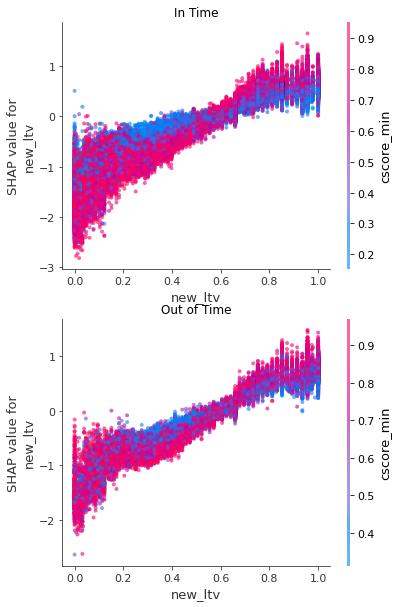

In [ ]:
f = 'new_ltv'
plot_dependence(ds_ins,
                ds_oot,
                feat=f,
                interaction_feat='cscore_min',
                features=features_v)

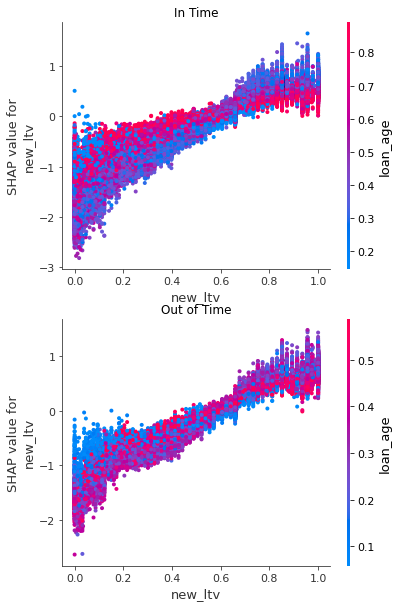

In [ ]:
f = 'new_ltv'
plot_dependence_best_int(ds_ins,
                ds_oot,
                feat=f,
                features=features_v,
                alpha=1)

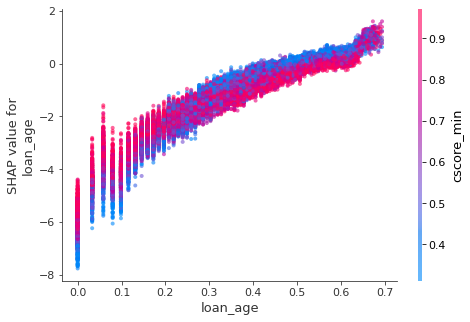

In [ ]:
shap.dependence_plot("rank(0)",
                      shap_values=ds_oot[shap_cols].values,
                      features=ds_oot[features_v].values,
                      feature_names=features_v,
                      alpha=0.6,
                      show=False)

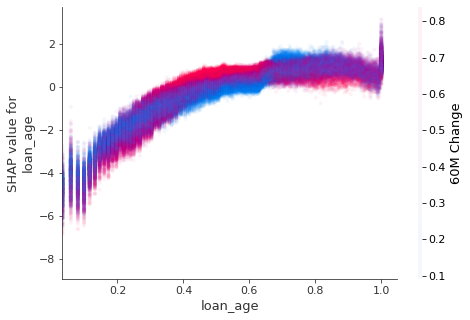

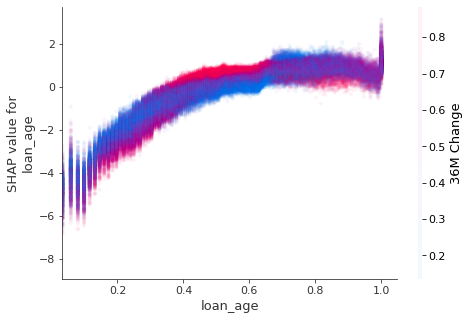

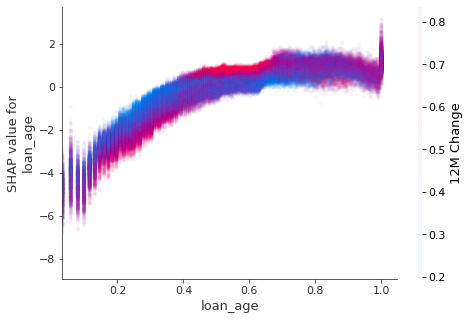

In [ ]:
inds = shap.approximate_interactions("loan_age", shap_values=ds_ins[shap_cols].values,
                      X=ds_ins[features_v].values,
                      feature_names=features_v

                      )
# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot("loan_age",
                         shap_values=ds_ins[shap_cols].values,
                      features=ds_ins[features_v].values,
                      feature_names=features_v,
                      alpha=0.05,
                      show=False, interaction_index=inds[i],xmin="percentile(1)", xmax="percentile(99)")

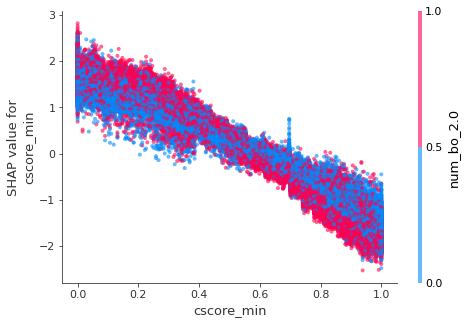

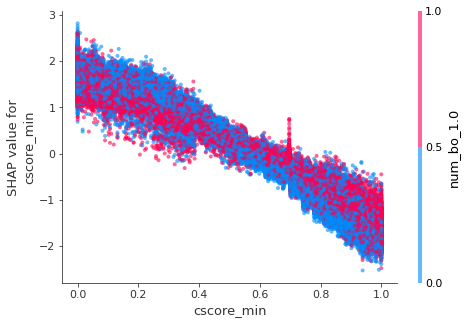

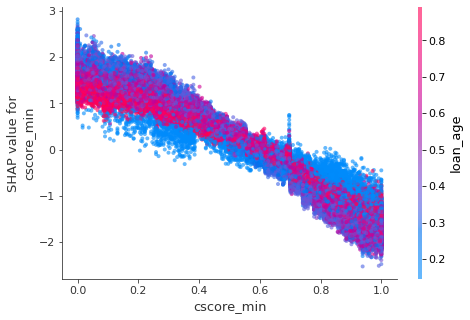

In [ ]:
inds = shap.approximate_interactions("rank(1)", shap_values=ds_ins[shap_cols].values,
                      X=ds_ins[features_v].values,
                      feature_names=features_v

                      )
# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot("rank(1)",
                         shap_values=ds_ins[shap_cols].values,
                      features=ds_ins[features_v].values,
                      feature_names=features_v,
                      alpha=0.6,
                      show=False, interaction_index=inds[i],xmin="percentile(1)", xmax="percentile(99)")

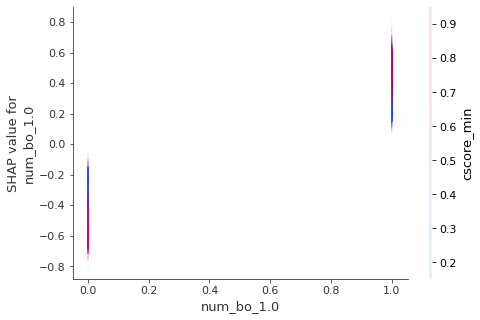

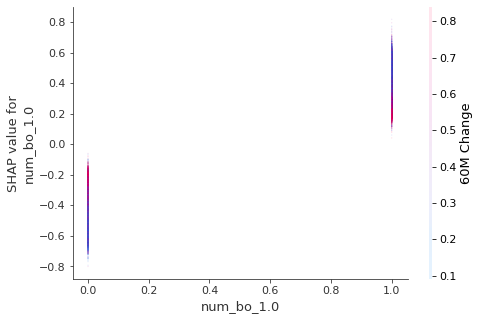

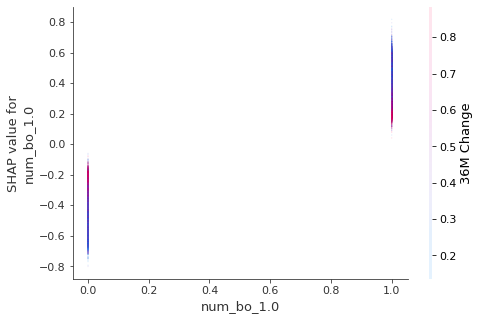

In [ ]:
inds = shap.approximate_interactions("num_bo_1.0", shap_values=ds_ins[shap_cols].values,
                      X=ds_ins[features_v].values,
                      feature_names=features_v

                      )
# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot("num_bo_1.0",
                         shap_values=ds_ins[shap_cols].values,
                      features=ds_ins[features_v].values,
                      feature_names=features_v,
                      alpha=0.1,dot_size=2,
                      show=False, interaction_index=inds[i],xmin="percentile(1)", xmax="percentile(99)")

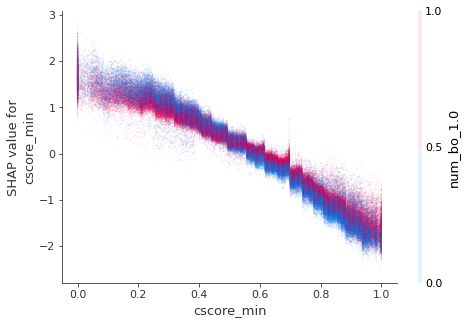

In [ ]:
feat='cscore_min'
shap.dependence_plot(feat,
                      shap_values=ds_ins[shap_cols].values,
                      features=ds_ins[features_v].values,
                      feature_names=features_v,
                      alpha=0.1,dot_size=2,
                      show=False,
                      interaction_index="num_bo_1.0",
                       xmin="percentile(1)", xmax="percentile(99)")

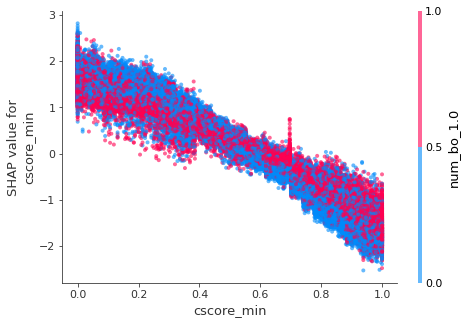

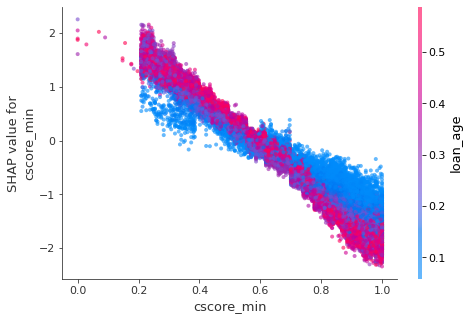

In [ ]:
feat='cscore_min'
shap.dependence_plot(feat,
                      shap_values=ds_ins[shap_cols].values,
                      features=ds_ins[features_v].values,
                      feature_names=features_v,
                      alpha=0.6,
                      show=False)

shap.dependence_plot(feat,
                      shap_values=ds_oot[shap_cols].values,
                      features=ds_oot[features_v].values,
                      feature_names=features_v,
                      alpha=0.6,
                      show=False)

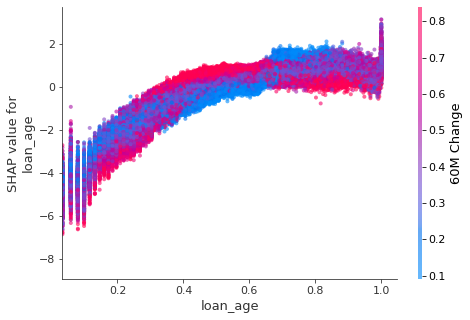

In [ ]:
shap.dependence_plot("rank(0)",shap_values=ds_ins[shap_cols].values,
                      features=ds_ins[features_v].values,
                      feature_names=features_v,
                      alpha=0.6,
                      show=False,xmin="percentile(1)", xmax="percentile(99)")


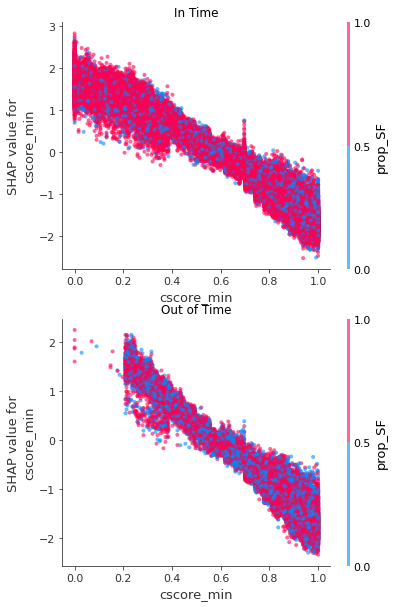

"\nf='prop_SF'\nplot_dependence(ds_ins,\n                ds_oot,\n                feat=f,\n                interaction_feat='cscore_min',\n                features=features_nv,\n                output=os.path.join(fig_dir, 'shap_dependence_{}.png'.format(f)))"

In [ ]:
f='cscore_min'
plot_dependence(ds_ins,
                ds_oot,
                feat=f,
                interaction_feat='prop_SF',
                features=features_nv)
"""
f='prop_SF'
plot_dependence(ds_ins,
                ds_oot,
                feat=f,
                interaction_feat='cscore_min',
                features=features_nv,
                output=os.path.join(fig_dir, 'shap_dependence_{}.png'.format(f)))"""

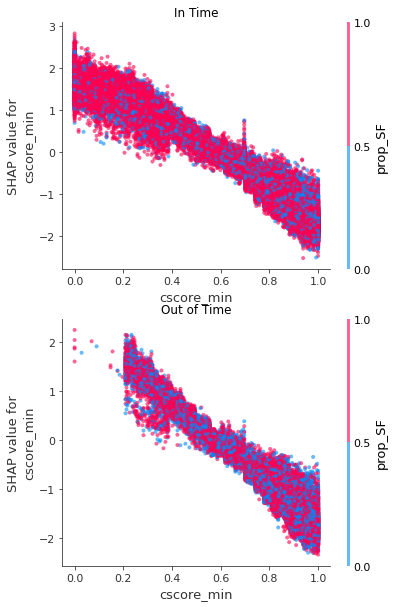

In [ ]:
f='cscore_min'
plot_dependence(ds_ins,
                ds_oot,
                feat=f,
                interaction_feat='prop_SF',
                features=features_nv)

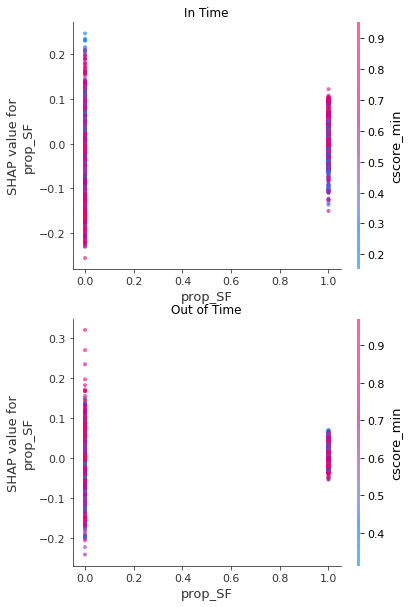

In [ ]:
f='prop_SF'
plot_dependence(ds_ins,
                ds_oot,
                feat=f,
                interaction_feat='cscore_min',
                features=features_nv)

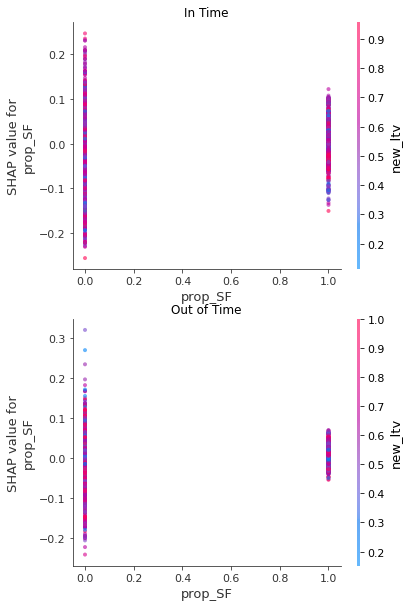

In [ ]:
f='prop_SF'
plot_dependence(ds_ins,
                ds_oot,
                feat=f,
                interaction_feat='new_ltv',
                features=features_nv)

###Top Interactions in sample

In [ ]:
h_ins = {subsets[i]: h_vals[i] for i in range(len(subsets))}

NameError: ignored

In [ ]:
pip install scikit-survival


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.3 MB/s eta 0:00:00


In [ ]:
# Import the necessary modules
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv

# Assuming you have your survival model fitted and your sample data with the actual event times and censoring indicators
# Convert the survival data to the format expected by "scikit-survival"
y_surv = Surv(feats, features_nv)

# Obtain the predicted survival probabilities from your model
y_pred = model.predict_proba(X)

# Calculate the h-statistic score using the "concordance_index_censored" function
h_statistic = concordance_index_censored(y_surv, y_pred, event_indicators)


TypeError: ignored

In [ ]:
h_ins={'loan_age * oltv': 0.033653858588535375,
 'loan_age * cscore_min': 0.018646677264946718,
 'loan_age * channel_R': 0.02595114297794155,
 'loan_age * purpose_P': 0.028204315530595322,
 'loan_age * prop_SF': 0.0003601517232697944,
 'oltv * cscore_min': 0.037130668140308395,
 'oltv * channel_R': 0.06306163080422672,
 'oltv * purpose_P': 0.026681881958520903,
 'oltv * prop_SF': 0.004124288709256453,
 'cscore_min * channel_R': 0.0401002645851969,
 'cscore_min * purpose_P': 0.03387755818457597,
 'cscore_min * prop_SF': 0.004923805441455632,
 'channel_R * purpose_P': 0.031795594845127936,
 'channel_R * prop_SF': 0.00016604043439282385,
 'purpose_P * prop_SF': 0.00047911749907927583}

In [ ]:
h_ins

{'loan_age * oltv': 0.033653858588535375,
 'loan_age * cscore_min': 0.018646677264946718,
 'loan_age * channel_R': 0.02595114297794155,
 'loan_age * purpose_P': 0.028204315530595322,
 'loan_age * prop_SF': 0.0003601517232697944,
 'oltv * cscore_min': 0.037130668140308395,
 'oltv * channel_R': 0.06306163080422672,
 'oltv * purpose_P': 0.026681881958520903,
 'oltv * prop_SF': 0.004124288709256453,
 'cscore_min * channel_R': 0.0401002645851969,
 'cscore_min * purpose_P': 0.03387755818457597,
 'cscore_min * prop_SF': 0.004923805441455632,
 'channel_R * purpose_P': 0.031795594845127936,
 'channel_R * prop_SF': 0.00016604043439282385,
 'purpose_P * prop_SF': 0.00047911749907927583}

In [ ]:
# sort out the top 10 interactions
top_h_ins=[i[0] for i in sorted(h_ins.items(), key=lambda x: x[1], reverse=True)[:10]]

In [ ]:
top_h_ins

['loan_age * 4Q Change',
 '4Q Change * orig_rate',
 'cscore_min * num_bo_1.0',
 'loan_age * orig_rate',
 'loan_age * ocltv',
 'num_bo_1.0 * orig_rate',
 'loan_age * num_bo_1.0',
 '4Q Change * ocltv',
 'ocltv * orig_rate',
 'cscore_min * ocltv']

loan_age 4Q Change


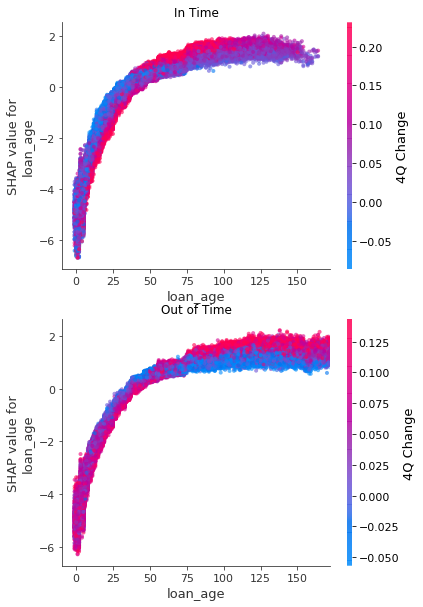

<Figure size 432x288 with 0 Axes>

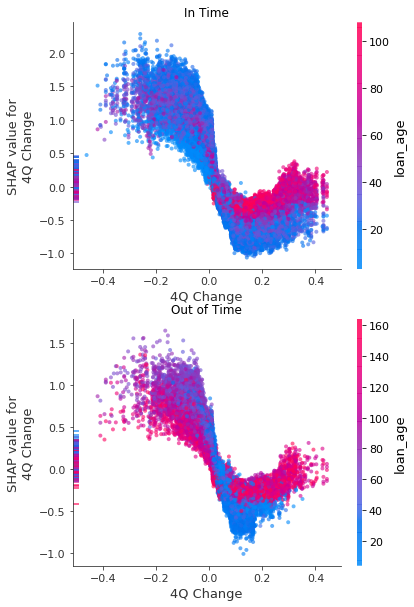

4Q Change orig_rate


<Figure size 432x288 with 0 Axes>

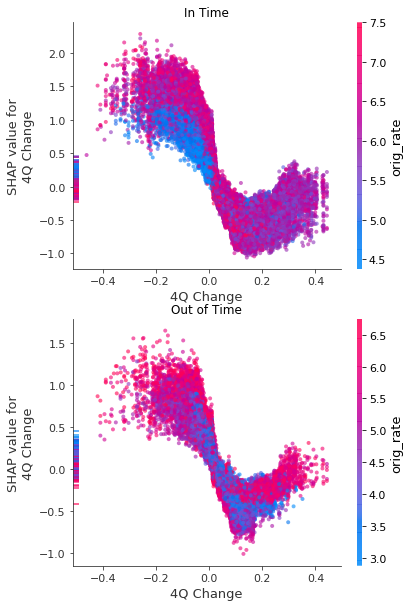

<Figure size 432x288 with 0 Axes>

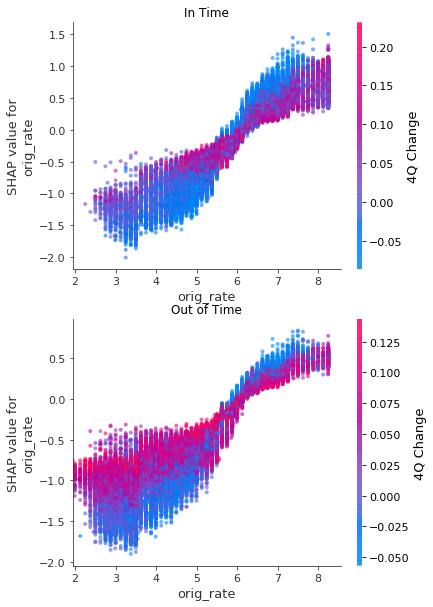

cscore_min num_bo_1.0


<Figure size 432x288 with 0 Axes>

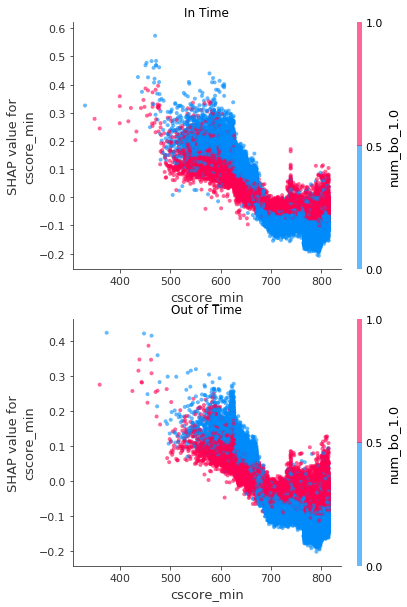

<Figure size 432x288 with 0 Axes>

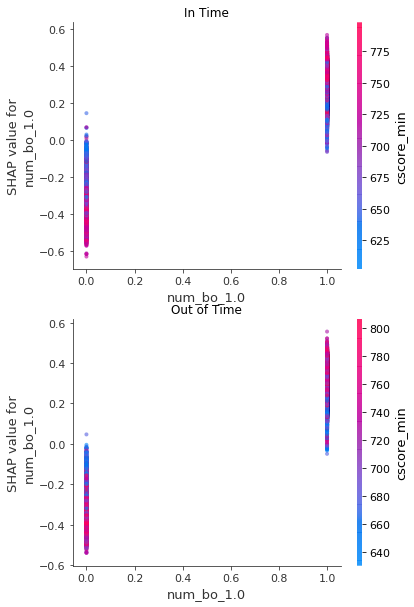

loan_age orig_rate


<Figure size 432x288 with 0 Axes>

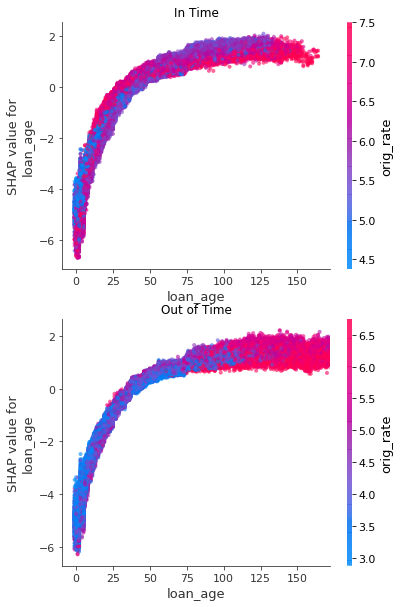

<Figure size 432x288 with 0 Axes>

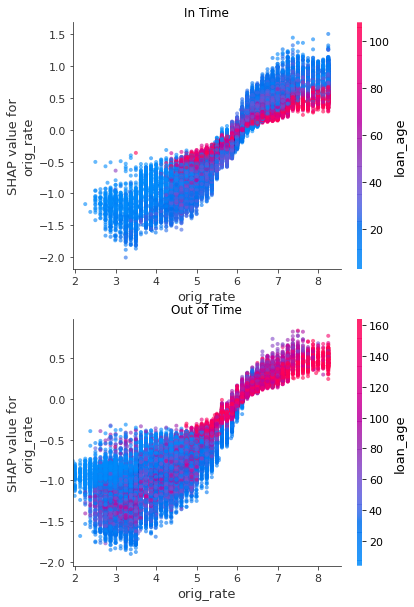

loan_age ocltv


<Figure size 432x288 with 0 Axes>

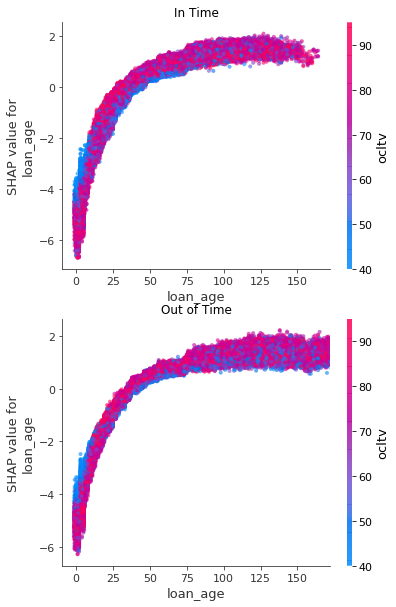

<Figure size 432x288 with 0 Axes>

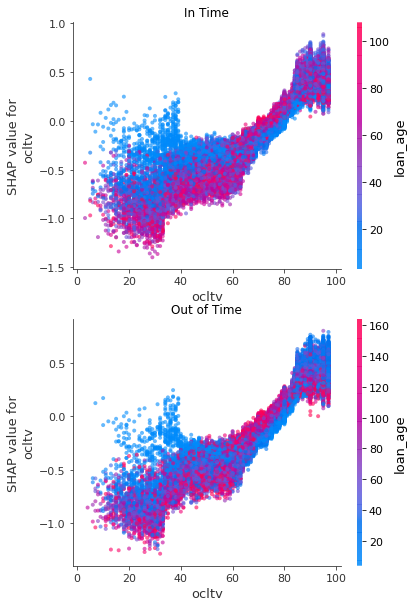

num_bo_1.0 orig_rate


<Figure size 432x288 with 0 Axes>

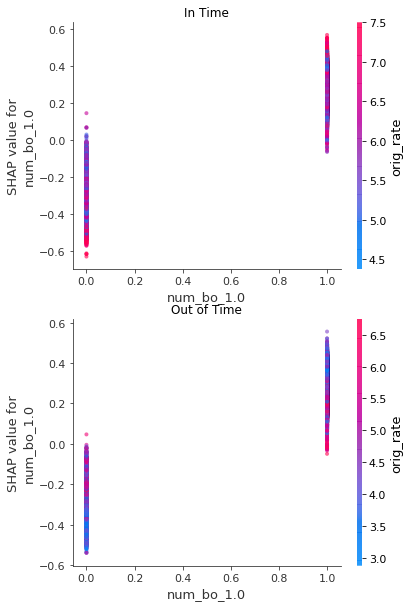

<Figure size 432x288 with 0 Axes>

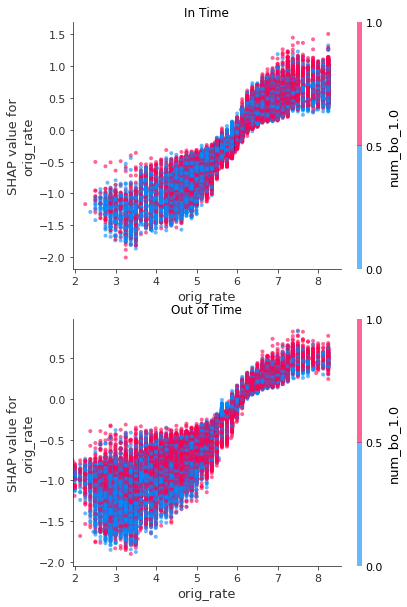

loan_age num_bo_1.0


<Figure size 432x288 with 0 Axes>

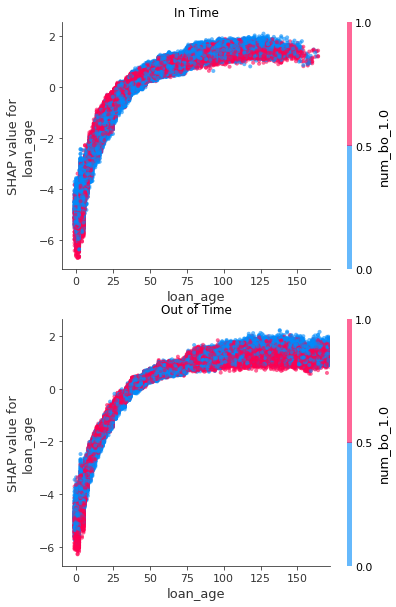

<Figure size 432x288 with 0 Axes>

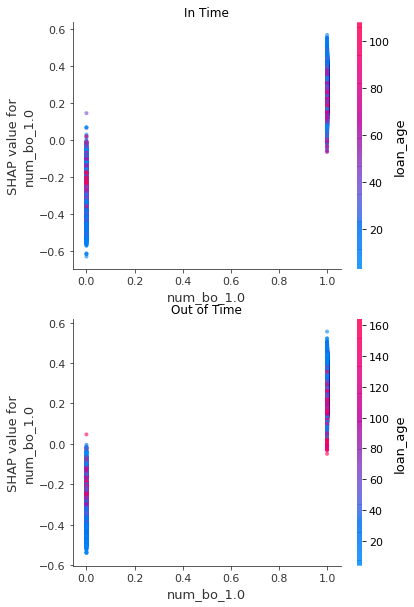

4Q Change ocltv


<Figure size 432x288 with 0 Axes>

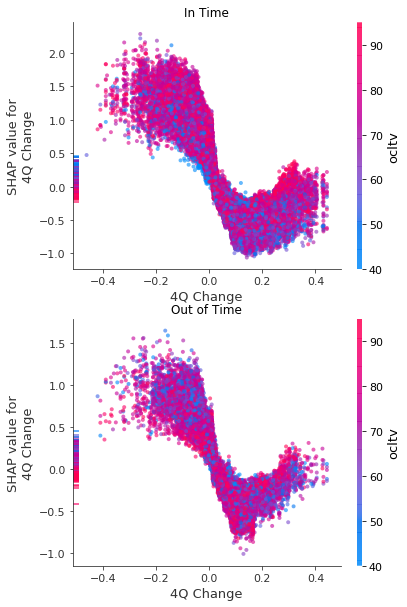

<Figure size 432x288 with 0 Axes>

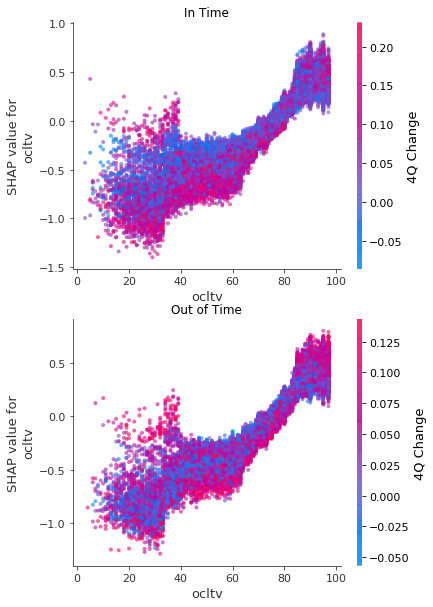

ocltv orig_rate


<Figure size 432x288 with 0 Axes>

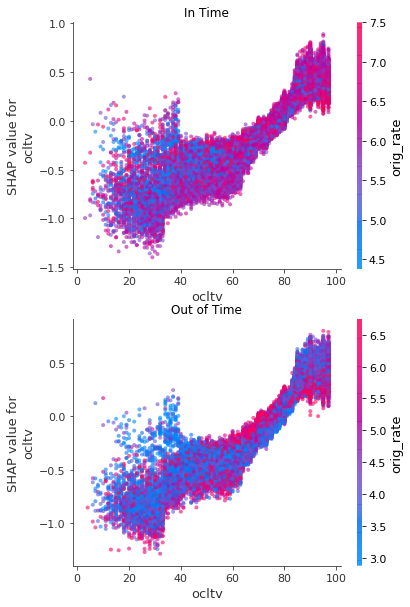

<Figure size 432x288 with 0 Axes>

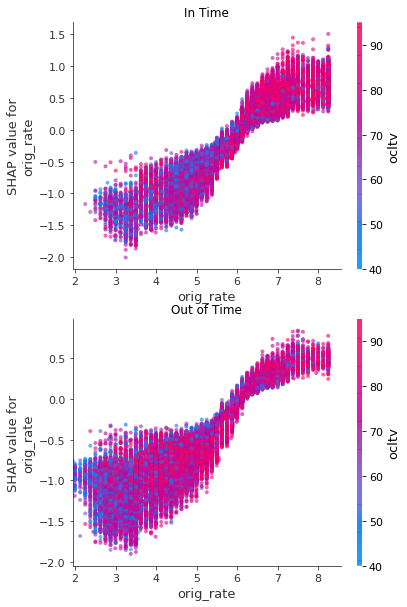

cscore_min ocltv


<Figure size 432x288 with 0 Axes>

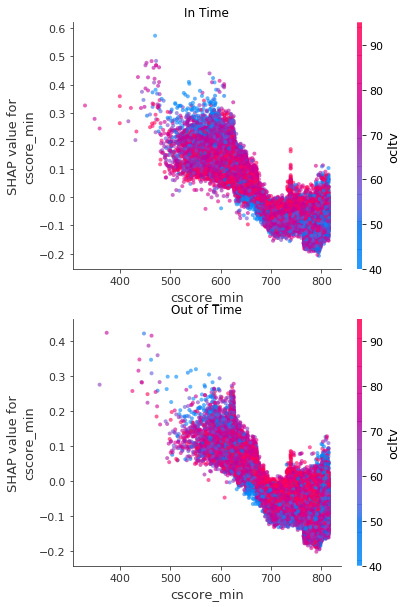

<Figure size 432x288 with 0 Axes>

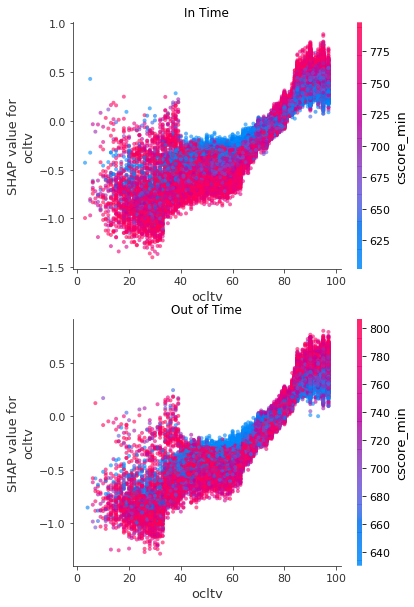

<Figure size 432x288 with 0 Axes>

In [ ]:
## recoding the intercation splits to make it more flexible

for i in range(len(top_h_ins)):
    vars=top_h_ins[i].rsplit(sep=' * ', maxsplit=- 1)
    if len(vars)>2:
      continue
    var1, var2 = vars[0], vars[1]
    print(var1,var2)

    plot_dependence(ds_ins,
                    ds_oot,
                    feat=var1,
                    interaction_feat=var2,
                    features=features_nv,
                    output=os.path.join(fig_dir, 'shap_dependence_{}_{}.png'.format(var1,var2))
                    )
    plot_dependence(ds_ins,
                    ds_oot,
                    feat=var2,
                    interaction_feat=var1,
                    features=features_nv,
                    output=os.path.join(fig_dir, 'shap_dependence_{}_{}.png'.format(var1,var2))
    )


